In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1700,1702,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,...,2.71,13.79,1.04,7.36,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1701,1703,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,...,0.93,13.81,1.29,19.02,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1702,1704,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,...,1.14,13.79,1.27,25.99,0.302195,0.175457,0.345572,0.996307,-0.332512,Chickpea
1703,1705,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,...,1.02,12.29,1.03,8.57,0.069411,0.020382,0.214410,0.205302,-0.093095,Pigeonpea
1704,1706,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,...,1.16,10.87,1.12,18.94,0.228808,0.143780,0.219145,0.661369,-0.248507,Jowar


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDVI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,8.080000,0.503658,0.341473,13.335202,147.907363,4124.760095,610.743468,37.752613,0.590119,1.224513,8.605273,1.036271,10.871853,-0.228084
std,0.813024,1.162643,0.135343,12.325002,129.306644,3183.363217,534.631347,162.019220,0.591689,1.357217,5.691184,0.536504,5.732182,0.099870
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.400000,-0.433467
25%,7.640000,0.180000,0.260000,4.670000,92.000000,997.000000,202.000000,5.160000,0.320000,0.490000,4.870000,0.680000,6.560000,-0.316804
50%,8.300000,0.280000,0.330000,9.300000,133.000000,3555.000000,484.000000,8.520000,0.400000,0.860000,7.430000,0.950000,9.740000,-0.238360
75%,8.680000,0.400000,0.410000,19.220000,183.000000,7280.000000,943.000000,18.220000,0.610000,1.400000,10.860000,1.210000,13.670000,-0.133305
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.170000,-0.036139


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [10]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Red Soil': 158, 'Black Soil': 152}

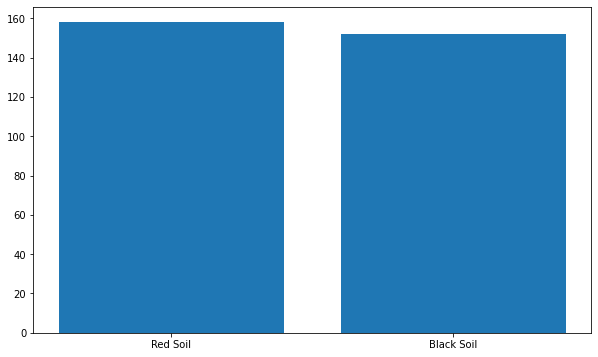

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Cotton                  83
Groundnut               44
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Paddy                    9
Ground Nut               9
Jonna                    8
Coriandam                8
GroundNut                7
Vari                     7
Mahendra Jonna           6
Sunflower                6
Ground Nat               5
Dhanyalu                 5
Cottan,Ground Nat        5
Blackgram                4
cotton                   4
ground nut/groundnut     4
Redgram                  4
Chickpea                 3
Pacha Jonna              2
Paddy,jowar              2
Ground nut,castor        2
Groundnut,Cottan         2
Cotton,Ground Nut        2
Ground Nut,jowar         2
Clastor                  2
Cotton,Vegitable         1
Ground Nut, Cotton       1
Cottan ,Groundnat        1
Ground nut               1
GroundNut,Cotton         1
Menumu                   1
ground nut               1
groundnut                1
G

GroundNut + Cotton    202
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

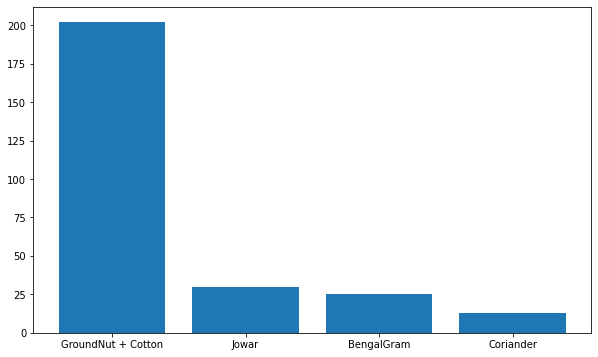

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
pH,1.000000,0.154581,0.147291,-0.398731,0.350931,0.626788,0.643470,0.075312,-0.127017,0.372085,-0.273208,0.108424,-0.416163,0.312181
EC,0.154581,1.000000,0.047219,-0.090406,0.135849,0.171570,0.157315,0.898074,-0.009813,0.760557,-0.010272,0.054859,-0.048448,0.110032
OC,0.147291,0.047219,1.000000,0.342842,0.606173,0.200203,0.247514,0.026382,0.316863,0.156429,0.104527,0.468411,0.272497,0.082260
P,-0.398731,-0.090406,0.342842,1.000000,0.070703,-0.513249,-0.387599,-0.064982,0.469348,-0.228942,-0.053793,-0.013029,0.173210,-0.178855
K,0.350931,0.135849,0.606173,0.070703,1.000000,0.529954,0.529136,0.076988,0.148299,0.332151,0.263453,0.413098,0.199230,0.182468
Ca,0.626788,0.171570,0.200203,-0.513249,0.529954,1.000000,0.910068,0.137835,-0.179656,0.484463,0.309439,0.389341,0.018532,0.248261
Mg,0.643470,0.157315,0.247514,-0.387599,0.529136,0.910068,1.000000,0.129683,-0.059716,0.529157,0.238333,0.465359,0.034844,0.252823
S,0.075312,0.898074,0.026382,-0.064982,0.076988,0.137835,0.129683,1.000000,0.002336,0.762918,0.001949,0.049728,-0.012802,0.102552
Zn,-0.127017,-0.009813,0.316863,0.469348,0.148299,-0.179656,-0.059716,0.002336,1.000000,0.033656,-0.070543,0.268873,0.211985,-0.121424
B,0.372085,0.760557,0.156429,-0.228942,0.332151,0.484463,0.529157,0.762918,0.033656,1.000000,0.077278,0.263906,-0.022490,0.189281


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'NDWI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu      NDWI
1704  8.56  0.34  0.22  4.27  0.38  10.87  1.12 -0.248507
1704    Jowar
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7941176470588235


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.19 %
Standard Deviation: 4.91 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7794117647058824


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.29 %
Standard Deviation: 7.46 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7941176470588235


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 78.19 %
Standard Deviation: 6.81 %


In [36]:
# pickle.dump(clf3, open('Kurnool_model.pkl', 'wb'))
# pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7647058823529411


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.24 %
Standard Deviation: 6.22 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8217821782178217
Testing Accuracy:  0.7941176470588235


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 78.21 %
Standard Deviation: 5.99 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.7909349	total: 161ms	remaining: 15.9s
1:	learn: 0.5951499	total: 162ms	remaining: 7.93s
2:	learn: 0.5502222	total: 163ms	remaining: 5.26s
3:	learn: 0.4779598	total: 163ms	remaining: 3.92s
4:	learn: 0.4528026	total: 164ms	remaining: 3.11s
5:	learn: 0.4447379	total: 164ms	remaining: 2.57s
6:	learn: 0.4282527	total: 165ms	remaining: 2.19s
7:	learn: 0.4192811	total: 165ms	remaining: 1.9s
8:	learn: 0.3980421	total: 166ms	remaining: 1.68s
9:	learn: 0.3755615	total: 166ms	remaining: 1.5s
10:	learn: 0.3716634	total: 167ms	remaining: 1.35s
11:	learn: 0.3631099	total: 167ms	remaining: 1.23s
12:	learn: 0.3453678	total: 168ms	remaining: 1.12s
13:	learn: 0.3403767	total: 169ms	remaining: 1.03s
14:	learn: 0.3362476	total: 169ms	remaining: 958ms
15:	learn: 0.3325823	total: 169ms	remaining: 890ms
16:	learn: 0.3294259	total: 170ms	remaining: 829ms
17:	learn: 0.3160029	total: 170ms	remaining: 776ms
18:	learn: 0.3073316	total: 171ms	remaining: 728ms
19:	learn: 0.3041909	total: 171ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5564085452
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6188225214
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5589951212
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5653619763
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5983076226
bestIteration = 97



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3515726	test: 1.3516907	best: 1.3516907 (0)	total: 1.24ms	remaining: 1.24s
1:	learn: 1.3257465	test: 1.3273720	best: 1.3273720 (1)	total: 2.33ms	remaining: 1.16s
2:	learn: 1.2954135	test: 1.2990046	best: 1.2990046 (2)	total: 3.33ms	remaining: 1.1s
3:	learn: 1.2600249	test: 1.2722959	best: 1.2722959 (3)	total: 4.25ms	remaining: 1.06s
4:	learn: 1.2320857	test: 1.2473091	best: 1.2473091 (4)	total: 5.21ms	remaining: 1.04s
5:	learn: 1.2076622	test: 1.2211541	best: 1.2211541 (5)	total: 6.15ms	remaining: 1.02s
6:	learn: 1.1733664	test: 1.1901231	best: 1.1901231 (6)	total: 7.11ms	remaining: 1.01s
7:	learn: 1.1456798	test: 1.1649162	best: 1.1649162 (7)	total: 8.06ms	remaining: 1s
8:	learn: 1.1193321	test: 1.1385895	best: 1.1385895 (8)	total: 9.08ms	remaining: 1000ms
9:	learn: 1.0973206	test: 1.1195159	best: 1.1195159 (9)	total: 10.1ms	remaining: 998ms
10:	learn: 1.0735737	test: 1.0986366	best: 1.0986366 (10)	total: 11.1ms	remaining: 998ms
11:	learn: 1.0539583	test: 1.0818967	best: 1

165:	learn: 0.3597805	test: 0.5699236	best: 0.5699236 (165)	total: 171ms	remaining: 858ms
166:	learn: 0.3589612	test: 0.5698024	best: 0.5698024 (166)	total: 172ms	remaining: 858ms
167:	learn: 0.3576051	test: 0.5698297	best: 0.5698024 (166)	total: 173ms	remaining: 858ms
168:	learn: 0.3563339	test: 0.5695664	best: 0.5695664 (168)	total: 174ms	remaining: 857ms
169:	learn: 0.3558087	test: 0.5695364	best: 0.5695364 (169)	total: 175ms	remaining: 855ms
170:	learn: 0.3546489	test: 0.5697588	best: 0.5695364 (169)	total: 176ms	remaining: 854ms
171:	learn: 0.3536757	test: 0.5700038	best: 0.5695364 (169)	total: 177ms	remaining: 854ms
172:	learn: 0.3528948	test: 0.5706702	best: 0.5695364 (169)	total: 178ms	remaining: 853ms
173:	learn: 0.3523812	test: 0.5706722	best: 0.5695364 (169)	total: 179ms	remaining: 852ms
174:	learn: 0.3509568	test: 0.5702598	best: 0.5695364 (169)	total: 180ms	remaining: 850ms
175:	learn: 0.3500212	test: 0.5692756	best: 0.5692756 (175)	total: 181ms	remaining: 849ms
176:	learn

333:	learn: 0.2279773	test: 0.5838489	best: 0.5675982 (242)	total: 343ms	remaining: 684ms
334:	learn: 0.2274194	test: 0.5847026	best: 0.5675982 (242)	total: 344ms	remaining: 683ms
335:	learn: 0.2270235	test: 0.5851156	best: 0.5675982 (242)	total: 345ms	remaining: 683ms
336:	learn: 0.2265637	test: 0.5855923	best: 0.5675982 (242)	total: 346ms	remaining: 681ms
337:	learn: 0.2258573	test: 0.5860639	best: 0.5675982 (242)	total: 347ms	remaining: 681ms
338:	learn: 0.2250991	test: 0.5861031	best: 0.5675982 (242)	total: 348ms	remaining: 680ms
339:	learn: 0.2246317	test: 0.5863215	best: 0.5675982 (242)	total: 350ms	remaining: 679ms
340:	learn: 0.2241163	test: 0.5864926	best: 0.5675982 (242)	total: 351ms	remaining: 677ms
341:	learn: 0.2238740	test: 0.5864850	best: 0.5675982 (242)	total: 352ms	remaining: 676ms
342:	learn: 0.2232915	test: 0.5868294	best: 0.5675982 (242)	total: 352ms	remaining: 675ms
343:	learn: 0.2226838	test: 0.5870759	best: 0.5675982 (242)	total: 354ms	remaining: 674ms
344:	learn

495:	learn: 0.1600264	test: 0.6036493	best: 0.5675982 (242)	total: 514ms	remaining: 522ms
496:	learn: 0.1599177	test: 0.6035192	best: 0.5675982 (242)	total: 515ms	remaining: 521ms
497:	learn: 0.1595766	test: 0.6035741	best: 0.5675982 (242)	total: 516ms	remaining: 520ms
498:	learn: 0.1591189	test: 0.6043197	best: 0.5675982 (242)	total: 517ms	remaining: 519ms
499:	learn: 0.1587055	test: 0.6048110	best: 0.5675982 (242)	total: 518ms	remaining: 518ms
500:	learn: 0.1583890	test: 0.6047021	best: 0.5675982 (242)	total: 519ms	remaining: 517ms
501:	learn: 0.1579909	test: 0.6045276	best: 0.5675982 (242)	total: 520ms	remaining: 516ms
502:	learn: 0.1578798	test: 0.6044856	best: 0.5675982 (242)	total: 521ms	remaining: 514ms
503:	learn: 0.1575760	test: 0.6050897	best: 0.5675982 (242)	total: 522ms	remaining: 513ms
504:	learn: 0.1573485	test: 0.6052250	best: 0.5675982 (242)	total: 523ms	remaining: 512ms
505:	learn: 0.1569066	test: 0.6053991	best: 0.5675982 (242)	total: 524ms	remaining: 511ms
506:	learn

665:	learn: 0.1176542	test: 0.6225349	best: 0.5675982 (242)	total: 685ms	remaining: 344ms
666:	learn: 0.1174454	test: 0.6223679	best: 0.5675982 (242)	total: 687ms	remaining: 343ms
667:	learn: 0.1173185	test: 0.6224135	best: 0.5675982 (242)	total: 688ms	remaining: 342ms
668:	learn: 0.1170463	test: 0.6226768	best: 0.5675982 (242)	total: 689ms	remaining: 341ms
669:	learn: 0.1168753	test: 0.6228247	best: 0.5675982 (242)	total: 690ms	remaining: 340ms
670:	learn: 0.1166402	test: 0.6223579	best: 0.5675982 (242)	total: 691ms	remaining: 339ms
671:	learn: 0.1163797	test: 0.6226458	best: 0.5675982 (242)	total: 692ms	remaining: 338ms
672:	learn: 0.1163105	test: 0.6227322	best: 0.5675982 (242)	total: 693ms	remaining: 337ms
673:	learn: 0.1161221	test: 0.6232153	best: 0.5675982 (242)	total: 694ms	remaining: 336ms
674:	learn: 0.1159447	test: 0.6233453	best: 0.5675982 (242)	total: 695ms	remaining: 334ms
675:	learn: 0.1158914	test: 0.6233616	best: 0.5675982 (242)	total: 696ms	remaining: 333ms
676:	learn

836:	learn: 0.0911764	test: 0.6383593	best: 0.5675982 (242)	total: 857ms	remaining: 167ms
837:	learn: 0.0910630	test: 0.6385341	best: 0.5675982 (242)	total: 858ms	remaining: 166ms
838:	learn: 0.0908975	test: 0.6389917	best: 0.5675982 (242)	total: 859ms	remaining: 165ms
839:	learn: 0.0907381	test: 0.6394537	best: 0.5675982 (242)	total: 860ms	remaining: 164ms
840:	learn: 0.0906175	test: 0.6397910	best: 0.5675982 (242)	total: 861ms	remaining: 163ms
841:	learn: 0.0904806	test: 0.6405383	best: 0.5675982 (242)	total: 862ms	remaining: 162ms
842:	learn: 0.0902960	test: 0.6404953	best: 0.5675982 (242)	total: 863ms	remaining: 161ms
843:	learn: 0.0901588	test: 0.6408007	best: 0.5675982 (242)	total: 864ms	remaining: 160ms
844:	learn: 0.0900024	test: 0.6406810	best: 0.5675982 (242)	total: 865ms	remaining: 159ms
845:	learn: 0.0898985	test: 0.6408227	best: 0.5675982 (242)	total: 866ms	remaining: 158ms
846:	learn: 0.0898046	test: 0.6407324	best: 0.5675982 (242)	total: 867ms	remaining: 157ms
847:	learn

2:	learn: 1.1210644	test: 1.1308572	best: 1.1308572 (2)	total: 4.57ms	remaining: 1.52s
3:	learn: 1.0368615	test: 1.0697181	best: 1.0697181 (3)	total: 5.82ms	remaining: 1.45s
4:	learn: 0.9700355	test: 1.0129305	best: 1.0129305 (4)	total: 7.02ms	remaining: 1.4s
5:	learn: 0.9269425	test: 0.9672336	best: 0.9672336 (5)	total: 8.12ms	remaining: 1.34s
6:	learn: 0.8698526	test: 0.9173410	best: 0.9173410 (6)	total: 9.15ms	remaining: 1.3s
7:	learn: 0.8287413	test: 0.8802093	best: 0.8802093 (7)	total: 10.2ms	remaining: 1.27s
8:	learn: 0.7892247	test: 0.8449622	best: 0.8449622 (8)	total: 11.4ms	remaining: 1.25s
9:	learn: 0.7572693	test: 0.8197714	best: 0.8197714 (9)	total: 12.5ms	remaining: 1.24s
10:	learn: 0.7273149	test: 0.7950695	best: 0.7950695 (10)	total: 13.7ms	remaining: 1.23s
11:	learn: 0.7012918	test: 0.7699934	best: 0.7699934 (11)	total: 14.8ms	remaining: 1.21s
12:	learn: 0.6793546	test: 0.7502076	best: 0.7502076 (12)	total: 15.7ms	remaining: 1.19s
13:	learn: 0.6597689	test: 0.7322831	be

163:	learn: 0.1410952	test: 0.5769353	best: 0.5477699 (61)	total: 176ms	remaining: 897ms
164:	learn: 0.1402381	test: 0.5771704	best: 0.5477699 (61)	total: 177ms	remaining: 897ms
165:	learn: 0.1391036	test: 0.5790496	best: 0.5477699 (61)	total: 178ms	remaining: 896ms
166:	learn: 0.1376755	test: 0.5822730	best: 0.5477699 (61)	total: 180ms	remaining: 895ms
167:	learn: 0.1371111	test: 0.5824032	best: 0.5477699 (61)	total: 181ms	remaining: 895ms
168:	learn: 0.1360427	test: 0.5800996	best: 0.5477699 (61)	total: 182ms	remaining: 893ms
169:	learn: 0.1351997	test: 0.5797700	best: 0.5477699 (61)	total: 183ms	remaining: 892ms
170:	learn: 0.1349174	test: 0.5805747	best: 0.5477699 (61)	total: 184ms	remaining: 891ms
171:	learn: 0.1340343	test: 0.5815814	best: 0.5477699 (61)	total: 185ms	remaining: 890ms
172:	learn: 0.1336188	test: 0.5813762	best: 0.5477699 (61)	total: 186ms	remaining: 890ms
173:	learn: 0.1332172	test: 0.5824806	best: 0.5477699 (61)	total: 187ms	remaining: 888ms
174:	learn: 0.1325011

336:	learn: 0.0653289	test: 0.6410089	best: 0.5477699 (61)	total: 347ms	remaining: 684ms
337:	learn: 0.0650519	test: 0.6414647	best: 0.5477699 (61)	total: 349ms	remaining: 683ms
338:	learn: 0.0647085	test: 0.6419369	best: 0.5477699 (61)	total: 350ms	remaining: 682ms
339:	learn: 0.0645429	test: 0.6418053	best: 0.5477699 (61)	total: 351ms	remaining: 681ms
340:	learn: 0.0642097	test: 0.6420535	best: 0.5477699 (61)	total: 352ms	remaining: 680ms
341:	learn: 0.0640500	test: 0.6431157	best: 0.5477699 (61)	total: 353ms	remaining: 679ms
342:	learn: 0.0638072	test: 0.6438573	best: 0.5477699 (61)	total: 354ms	remaining: 678ms
343:	learn: 0.0635656	test: 0.6448661	best: 0.5477699 (61)	total: 355ms	remaining: 676ms
344:	learn: 0.0633797	test: 0.6455791	best: 0.5477699 (61)	total: 356ms	remaining: 675ms
345:	learn: 0.0632139	test: 0.6453558	best: 0.5477699 (61)	total: 356ms	remaining: 674ms
346:	learn: 0.0629517	test: 0.6452716	best: 0.5477699 (61)	total: 358ms	remaining: 673ms
347:	learn: 0.0627729

508:	learn: 0.0397558	test: 0.6836027	best: 0.5477699 (61)	total: 519ms	remaining: 501ms
509:	learn: 0.0395807	test: 0.6827093	best: 0.5477699 (61)	total: 520ms	remaining: 500ms
510:	learn: 0.0395461	test: 0.6824819	best: 0.5477699 (61)	total: 521ms	remaining: 499ms
511:	learn: 0.0394088	test: 0.6832685	best: 0.5477699 (61)	total: 523ms	remaining: 498ms
512:	learn: 0.0392684	test: 0.6840434	best: 0.5477699 (61)	total: 524ms	remaining: 497ms
513:	learn: 0.0391328	test: 0.6838291	best: 0.5477699 (61)	total: 525ms	remaining: 496ms
514:	learn: 0.0390032	test: 0.6839597	best: 0.5477699 (61)	total: 525ms	remaining: 495ms
515:	learn: 0.0388933	test: 0.6849617	best: 0.5477699 (61)	total: 526ms	remaining: 494ms
516:	learn: 0.0388109	test: 0.6849187	best: 0.5477699 (61)	total: 527ms	remaining: 493ms
517:	learn: 0.0387223	test: 0.6854890	best: 0.5477699 (61)	total: 528ms	remaining: 492ms
518:	learn: 0.0386599	test: 0.6856137	best: 0.5477699 (61)	total: 529ms	remaining: 490ms
519:	learn: 0.0386016

688:	learn: 0.0269624	test: 0.7175460	best: 0.5477699 (61)	total: 690ms	remaining: 312ms
689:	learn: 0.0268864	test: 0.7176904	best: 0.5477699 (61)	total: 691ms	remaining: 311ms
690:	learn: 0.0268406	test: 0.7173997	best: 0.5477699 (61)	total: 693ms	remaining: 310ms
691:	learn: 0.0267784	test: 0.7167763	best: 0.5477699 (61)	total: 694ms	remaining: 309ms
692:	learn: 0.0267163	test: 0.7168862	best: 0.5477699 (61)	total: 695ms	remaining: 308ms
693:	learn: 0.0266962	test: 0.7169224	best: 0.5477699 (61)	total: 696ms	remaining: 307ms
694:	learn: 0.0266610	test: 0.7169917	best: 0.5477699 (61)	total: 697ms	remaining: 306ms
695:	learn: 0.0266429	test: 0.7168697	best: 0.5477699 (61)	total: 698ms	remaining: 305ms
696:	learn: 0.0265798	test: 0.7173608	best: 0.5477699 (61)	total: 699ms	remaining: 304ms
697:	learn: 0.0265557	test: 0.7174087	best: 0.5477699 (61)	total: 700ms	remaining: 303ms
698:	learn: 0.0265059	test: 0.7181458	best: 0.5477699 (61)	total: 701ms	remaining: 302ms
699:	learn: 0.0264706

841:	learn: 0.0210642	test: 0.7419385	best: 0.5477699 (61)	total: 862ms	remaining: 162ms
842:	learn: 0.0210158	test: 0.7418992	best: 0.5477699 (61)	total: 863ms	remaining: 161ms
843:	learn: 0.0209734	test: 0.7420031	best: 0.5477699 (61)	total: 864ms	remaining: 160ms
844:	learn: 0.0209416	test: 0.7419017	best: 0.5477699 (61)	total: 865ms	remaining: 159ms
845:	learn: 0.0209054	test: 0.7421915	best: 0.5477699 (61)	total: 866ms	remaining: 158ms
846:	learn: 0.0208602	test: 0.7420019	best: 0.5477699 (61)	total: 867ms	remaining: 157ms
847:	learn: 0.0208201	test: 0.7428070	best: 0.5477699 (61)	total: 868ms	remaining: 156ms
848:	learn: 0.0207858	test: 0.7429348	best: 0.5477699 (61)	total: 869ms	remaining: 155ms
849:	learn: 0.0207576	test: 0.7429602	best: 0.5477699 (61)	total: 870ms	remaining: 154ms
850:	learn: 0.0207422	test: 0.7429377	best: 0.5477699 (61)	total: 871ms	remaining: 153ms
851:	learn: 0.0206976	test: 0.7419030	best: 0.5477699 (61)	total: 872ms	remaining: 151ms
852:	learn: 0.0206732

6:	learn: 1.1978835	test: 1.2265064	best: 1.2265064 (6)	total: 19.5ms	remaining: 2.76s
7:	learn: 1.1789513	test: 1.2106103	best: 1.2106103 (7)	total: 22.3ms	remaining: 2.77s
8:	learn: 1.1585531	test: 1.1893956	best: 1.1893956 (8)	total: 24.9ms	remaining: 2.75s
9:	learn: 1.1404494	test: 1.1729344	best: 1.1729344 (9)	total: 27.5ms	remaining: 2.72s
10:	learn: 1.1200670	test: 1.1580045	best: 1.1580045 (10)	total: 29.9ms	remaining: 2.69s
11:	learn: 1.0991302	test: 1.1431669	best: 1.1431669 (11)	total: 32.5ms	remaining: 2.68s
12:	learn: 1.0798365	test: 1.1250011	best: 1.1250011 (12)	total: 35.2ms	remaining: 2.67s
13:	learn: 1.0660743	test: 1.1113833	best: 1.1113833 (13)	total: 37.7ms	remaining: 2.66s
14:	learn: 1.0512748	test: 1.0986683	best: 1.0986683 (14)	total: 40.4ms	remaining: 2.65s
15:	learn: 1.0362102	test: 1.0845823	best: 1.0845823 (15)	total: 43ms	remaining: 2.65s
16:	learn: 1.0191533	test: 1.0723735	best: 1.0723735 (16)	total: 45.6ms	remaining: 2.64s
17:	learn: 1.0020515	test: 1.05

140:	learn: 0.3743196	test: 0.6029777	best: 0.6029777 (140)	total: 375ms	remaining: 2.29s
141:	learn: 0.3724907	test: 0.6025511	best: 0.6025511 (141)	total: 378ms	remaining: 2.28s
142:	learn: 0.3704615	test: 0.6018580	best: 0.6018580 (142)	total: 381ms	remaining: 2.28s
143:	learn: 0.3685580	test: 0.6013621	best: 0.6013621 (143)	total: 383ms	remaining: 2.28s
144:	learn: 0.3667250	test: 0.5995089	best: 0.5995089 (144)	total: 386ms	remaining: 2.27s
145:	learn: 0.3652483	test: 0.5986605	best: 0.5986605 (145)	total: 388ms	remaining: 2.27s
146:	learn: 0.3632709	test: 0.5985062	best: 0.5985062 (146)	total: 391ms	remaining: 2.27s
147:	learn: 0.3619404	test: 0.5978570	best: 0.5978570 (147)	total: 393ms	remaining: 2.26s
148:	learn: 0.3602470	test: 0.5970806	best: 0.5970806 (148)	total: 396ms	remaining: 2.26s
149:	learn: 0.3580076	test: 0.5957757	best: 0.5957757 (149)	total: 399ms	remaining: 2.26s
150:	learn: 0.3565662	test: 0.5951052	best: 0.5951052 (150)	total: 401ms	remaining: 2.25s
151:	learn

276:	learn: 0.2085737	test: 0.5651797	best: 0.5640087 (258)	total: 732ms	remaining: 1.91s
277:	learn: 0.2077083	test: 0.5644312	best: 0.5640087 (258)	total: 735ms	remaining: 1.91s
278:	learn: 0.2069184	test: 0.5643312	best: 0.5640087 (258)	total: 738ms	remaining: 1.91s
279:	learn: 0.2061777	test: 0.5646554	best: 0.5640087 (258)	total: 740ms	remaining: 1.9s
280:	learn: 0.2054566	test: 0.5648730	best: 0.5640087 (258)	total: 743ms	remaining: 1.9s
281:	learn: 0.2047807	test: 0.5651565	best: 0.5640087 (258)	total: 745ms	remaining: 1.9s
282:	learn: 0.2037779	test: 0.5643968	best: 0.5640087 (258)	total: 748ms	remaining: 1.89s
283:	learn: 0.2029960	test: 0.5644319	best: 0.5640087 (258)	total: 750ms	remaining: 1.89s
284:	learn: 0.2020950	test: 0.5658433	best: 0.5640087 (258)	total: 753ms	remaining: 1.89s
285:	learn: 0.2012708	test: 0.5658813	best: 0.5640087 (258)	total: 756ms	remaining: 1.89s
286:	learn: 0.2007104	test: 0.5662828	best: 0.5640087 (258)	total: 759ms	remaining: 1.88s
287:	learn: 0

430:	learn: 0.1284221	test: 0.5758380	best: 0.5640087 (258)	total: 1.11s	remaining: 1.47s
431:	learn: 0.1280229	test: 0.5753241	best: 0.5640087 (258)	total: 1.12s	remaining: 1.47s
432:	learn: 0.1276586	test: 0.5757502	best: 0.5640087 (258)	total: 1.12s	remaining: 1.46s
433:	learn: 0.1273056	test: 0.5759461	best: 0.5640087 (258)	total: 1.12s	remaining: 1.46s
434:	learn: 0.1269666	test: 0.5754916	best: 0.5640087 (258)	total: 1.12s	remaining: 1.46s
435:	learn: 0.1265677	test: 0.5756507	best: 0.5640087 (258)	total: 1.13s	remaining: 1.46s
436:	learn: 0.1261915	test: 0.5763911	best: 0.5640087 (258)	total: 1.13s	remaining: 1.45s
437:	learn: 0.1258857	test: 0.5764756	best: 0.5640087 (258)	total: 1.13s	remaining: 1.45s
438:	learn: 0.1256039	test: 0.5763581	best: 0.5640087 (258)	total: 1.13s	remaining: 1.45s
439:	learn: 0.1253367	test: 0.5762560	best: 0.5640087 (258)	total: 1.14s	remaining: 1.45s
440:	learn: 0.1250585	test: 0.5764101	best: 0.5640087 (258)	total: 1.14s	remaining: 1.44s
441:	learn

570:	learn: 0.0916744	test: 0.5874985	best: 0.5640087 (258)	total: 1.46s	remaining: 1.1s
571:	learn: 0.0914321	test: 0.5873259	best: 0.5640087 (258)	total: 1.46s	remaining: 1.09s
572:	learn: 0.0911938	test: 0.5872457	best: 0.5640087 (258)	total: 1.47s	remaining: 1.09s
573:	learn: 0.0909969	test: 0.5874412	best: 0.5640087 (258)	total: 1.47s	remaining: 1.09s
574:	learn: 0.0908201	test: 0.5868096	best: 0.5640087 (258)	total: 1.47s	remaining: 1.09s
575:	learn: 0.0906484	test: 0.5872574	best: 0.5640087 (258)	total: 1.47s	remaining: 1.08s
576:	learn: 0.0904623	test: 0.5873755	best: 0.5640087 (258)	total: 1.48s	remaining: 1.08s
577:	learn: 0.0902382	test: 0.5874070	best: 0.5640087 (258)	total: 1.48s	remaining: 1.08s
578:	learn: 0.0899969	test: 0.5874153	best: 0.5640087 (258)	total: 1.48s	remaining: 1.08s
579:	learn: 0.0898004	test: 0.5875153	best: 0.5640087 (258)	total: 1.48s	remaining: 1.07s
580:	learn: 0.0896555	test: 0.5873601	best: 0.5640087 (258)	total: 1.49s	remaining: 1.07s
581:	learn:

717:	learn: 0.0693363	test: 0.6017216	best: 0.5640087 (258)	total: 1.84s	remaining: 722ms
718:	learn: 0.0691786	test: 0.6016839	best: 0.5640087 (258)	total: 1.84s	remaining: 720ms
719:	learn: 0.0690625	test: 0.6017605	best: 0.5640087 (258)	total: 1.84s	remaining: 717ms
720:	learn: 0.0689212	test: 0.6015894	best: 0.5640087 (258)	total: 1.85s	remaining: 714ms
721:	learn: 0.0688128	test: 0.6015398	best: 0.5640087 (258)	total: 1.85s	remaining: 712ms
722:	learn: 0.0686736	test: 0.6016934	best: 0.5640087 (258)	total: 1.85s	remaining: 709ms
723:	learn: 0.0685671	test: 0.6017758	best: 0.5640087 (258)	total: 1.85s	remaining: 707ms
724:	learn: 0.0684313	test: 0.6022821	best: 0.5640087 (258)	total: 1.86s	remaining: 704ms
725:	learn: 0.0682772	test: 0.6025527	best: 0.5640087 (258)	total: 1.86s	remaining: 702ms
726:	learn: 0.0681707	test: 0.6026573	best: 0.5640087 (258)	total: 1.86s	remaining: 699ms
727:	learn: 0.0680827	test: 0.6028847	best: 0.5640087 (258)	total: 1.86s	remaining: 696ms
728:	learn

860:	learn: 0.0548951	test: 0.6146220	best: 0.5640087 (258)	total: 2.2s	remaining: 356ms
861:	learn: 0.0547976	test: 0.6143894	best: 0.5640087 (258)	total: 2.21s	remaining: 353ms
862:	learn: 0.0546989	test: 0.6144118	best: 0.5640087 (258)	total: 2.21s	remaining: 350ms
863:	learn: 0.0546009	test: 0.6145885	best: 0.5640087 (258)	total: 2.21s	remaining: 348ms
864:	learn: 0.0545125	test: 0.6148114	best: 0.5640087 (258)	total: 2.21s	remaining: 345ms
865:	learn: 0.0544329	test: 0.6149380	best: 0.5640087 (258)	total: 2.21s	remaining: 343ms
866:	learn: 0.0543384	test: 0.6148813	best: 0.5640087 (258)	total: 2.22s	remaining: 340ms
867:	learn: 0.0542705	test: 0.6149945	best: 0.5640087 (258)	total: 2.22s	remaining: 338ms
868:	learn: 0.0541907	test: 0.6152343	best: 0.5640087 (258)	total: 2.22s	remaining: 335ms
869:	learn: 0.0540977	test: 0.6154778	best: 0.5640087 (258)	total: 2.23s	remaining: 333ms
870:	learn: 0.0540262	test: 0.6157946	best: 0.5640087 (258)	total: 2.23s	remaining: 330ms
871:	learn:

13:	learn: 0.6973068	test: 0.8144073	best: 0.8144073 (13)	total: 35.4ms	remaining: 2.49s
14:	learn: 0.6748350	test: 0.7963266	best: 0.7963266 (14)	total: 38ms	remaining: 2.5s
15:	learn: 0.6547541	test: 0.7778322	best: 0.7778322 (15)	total: 40.8ms	remaining: 2.51s
16:	learn: 0.6331797	test: 0.7634998	best: 0.7634998 (16)	total: 43.2ms	remaining: 2.5s
17:	learn: 0.6160576	test: 0.7451102	best: 0.7451102 (17)	total: 45.8ms	remaining: 2.5s
18:	learn: 0.6003114	test: 0.7351481	best: 0.7351481 (18)	total: 48.4ms	remaining: 2.5s
19:	learn: 0.5814185	test: 0.7256321	best: 0.7256321 (19)	total: 50.9ms	remaining: 2.5s
20:	learn: 0.5637980	test: 0.7131549	best: 0.7131549 (20)	total: 53.6ms	remaining: 2.5s
21:	learn: 0.5509905	test: 0.7062793	best: 0.7062793 (21)	total: 57.1ms	remaining: 2.54s
22:	learn: 0.5364780	test: 0.6984285	best: 0.6984285 (22)	total: 59.7ms	remaining: 2.53s
23:	learn: 0.5245332	test: 0.6915833	best: 0.6915833 (23)	total: 62.2ms	remaining: 2.53s
24:	learn: 0.5133463	test: 0.

159:	learn: 0.0997277	test: 0.5975737	best: 0.5729126 (88)	total: 401ms	remaining: 2.11s
160:	learn: 0.0987507	test: 0.5971928	best: 0.5729126 (88)	total: 404ms	remaining: 2.1s
161:	learn: 0.0979030	test: 0.5982007	best: 0.5729126 (88)	total: 407ms	remaining: 2.1s
162:	learn: 0.0970653	test: 0.5988207	best: 0.5729126 (88)	total: 410ms	remaining: 2.1s
163:	learn: 0.0963405	test: 0.6003868	best: 0.5729126 (88)	total: 412ms	remaining: 2.1s
164:	learn: 0.0957076	test: 0.6012931	best: 0.5729126 (88)	total: 415ms	remaining: 2.1s
165:	learn: 0.0949694	test: 0.6011066	best: 0.5729126 (88)	total: 417ms	remaining: 2.1s
166:	learn: 0.0940895	test: 0.6022491	best: 0.5729126 (88)	total: 420ms	remaining: 2.09s
167:	learn: 0.0934965	test: 0.6027354	best: 0.5729126 (88)	total: 423ms	remaining: 2.09s
168:	learn: 0.0929110	test: 0.6030637	best: 0.5729126 (88)	total: 425ms	remaining: 2.09s
169:	learn: 0.0922104	test: 0.6037074	best: 0.5729126 (88)	total: 428ms	remaining: 2.09s
170:	learn: 0.0915131	test:

303:	learn: 0.0450403	test: 0.6361612	best: 0.5729126 (88)	total: 764ms	remaining: 1.75s
304:	learn: 0.0448330	test: 0.6356932	best: 0.5729126 (88)	total: 766ms	remaining: 1.75s
305:	learn: 0.0446282	test: 0.6361727	best: 0.5729126 (88)	total: 769ms	remaining: 1.74s
306:	learn: 0.0444788	test: 0.6359808	best: 0.5729126 (88)	total: 771ms	remaining: 1.74s
307:	learn: 0.0442745	test: 0.6360311	best: 0.5729126 (88)	total: 774ms	remaining: 1.74s
308:	learn: 0.0441440	test: 0.6362210	best: 0.5729126 (88)	total: 776ms	remaining: 1.74s
309:	learn: 0.0439866	test: 0.6360519	best: 0.5729126 (88)	total: 779ms	remaining: 1.73s
310:	learn: 0.0438503	test: 0.6364643	best: 0.5729126 (88)	total: 781ms	remaining: 1.73s
311:	learn: 0.0436875	test: 0.6370478	best: 0.5729126 (88)	total: 785ms	remaining: 1.73s
312:	learn: 0.0435003	test: 0.6373725	best: 0.5729126 (88)	total: 787ms	remaining: 1.73s
313:	learn: 0.0434037	test: 0.6372300	best: 0.5729126 (88)	total: 789ms	remaining: 1.72s
314:	learn: 0.0432325

451:	learn: 0.0273699	test: 0.6703688	best: 0.5729126 (88)	total: 1.13s	remaining: 1.37s
452:	learn: 0.0272526	test: 0.6711156	best: 0.5729126 (88)	total: 1.13s	remaining: 1.36s
453:	learn: 0.0271701	test: 0.6715158	best: 0.5729126 (88)	total: 1.13s	remaining: 1.36s
454:	learn: 0.0271217	test: 0.6719767	best: 0.5729126 (88)	total: 1.14s	remaining: 1.36s
455:	learn: 0.0270662	test: 0.6714917	best: 0.5729126 (88)	total: 1.14s	remaining: 1.36s
456:	learn: 0.0269727	test: 0.6718394	best: 0.5729126 (88)	total: 1.14s	remaining: 1.35s
457:	learn: 0.0269125	test: 0.6715611	best: 0.5729126 (88)	total: 1.14s	remaining: 1.35s
458:	learn: 0.0268079	test: 0.6722075	best: 0.5729126 (88)	total: 1.15s	remaining: 1.35s
459:	learn: 0.0267605	test: 0.6724054	best: 0.5729126 (88)	total: 1.15s	remaining: 1.35s
460:	learn: 0.0266589	test: 0.6731026	best: 0.5729126 (88)	total: 1.15s	remaining: 1.35s
461:	learn: 0.0265758	test: 0.6733824	best: 0.5729126 (88)	total: 1.15s	remaining: 1.34s
462:	learn: 0.0265156

599:	learn: 0.0193499	test: 0.7022437	best: 0.5729126 (88)	total: 1.49s	remaining: 993ms
600:	learn: 0.0193105	test: 0.7024508	best: 0.5729126 (88)	total: 1.49s	remaining: 991ms
601:	learn: 0.0192772	test: 0.7025324	best: 0.5729126 (88)	total: 1.49s	remaining: 988ms
602:	learn: 0.0192322	test: 0.7030062	best: 0.5729126 (88)	total: 1.5s	remaining: 986ms
603:	learn: 0.0191962	test: 0.7033585	best: 0.5729126 (88)	total: 1.5s	remaining: 983ms
604:	learn: 0.0191526	test: 0.7037006	best: 0.5729126 (88)	total: 1.5s	remaining: 981ms
605:	learn: 0.0191203	test: 0.7039098	best: 0.5729126 (88)	total: 1.5s	remaining: 978ms
606:	learn: 0.0190925	test: 0.7040393	best: 0.5729126 (88)	total: 1.51s	remaining: 976ms
607:	learn: 0.0190559	test: 0.7042634	best: 0.5729126 (88)	total: 1.51s	remaining: 974ms
608:	learn: 0.0190054	test: 0.7044556	best: 0.5729126 (88)	total: 1.51s	remaining: 971ms
609:	learn: 0.0189768	test: 0.7045689	best: 0.5729126 (88)	total: 1.51s	remaining: 969ms
610:	learn: 0.0189419	tes

755:	learn: 0.0147514	test: 0.7209947	best: 0.5729126 (88)	total: 1.87s	remaining: 603ms
756:	learn: 0.0147176	test: 0.7215640	best: 0.5729126 (88)	total: 1.87s	remaining: 601ms
757:	learn: 0.0146882	test: 0.7216159	best: 0.5729126 (88)	total: 1.88s	remaining: 599ms
758:	learn: 0.0146676	test: 0.7219443	best: 0.5729126 (88)	total: 1.88s	remaining: 596ms
759:	learn: 0.0146524	test: 0.7221863	best: 0.5729126 (88)	total: 1.88s	remaining: 594ms
760:	learn: 0.0146326	test: 0.7223148	best: 0.5729126 (88)	total: 1.88s	remaining: 591ms
761:	learn: 0.0145982	test: 0.7225130	best: 0.5729126 (88)	total: 1.89s	remaining: 589ms
762:	learn: 0.0145804	test: 0.7226097	best: 0.5729126 (88)	total: 1.89s	remaining: 587ms
763:	learn: 0.0145578	test: 0.7226633	best: 0.5729126 (88)	total: 1.89s	remaining: 585ms
764:	learn: 0.0145353	test: 0.7228539	best: 0.5729126 (88)	total: 1.89s	remaining: 582ms
765:	learn: 0.0145143	test: 0.7230266	best: 0.5729126 (88)	total: 1.9s	remaining: 580ms
766:	learn: 0.0144929	

897:	learn: 0.0120417	test: 0.7383245	best: 0.5729126 (88)	total: 2.22s	remaining: 252ms
898:	learn: 0.0120232	test: 0.7384654	best: 0.5729126 (88)	total: 2.22s	remaining: 250ms
899:	learn: 0.0120056	test: 0.7385644	best: 0.5729126 (88)	total: 2.22s	remaining: 247ms
900:	learn: 0.0119979	test: 0.7387211	best: 0.5729126 (88)	total: 2.23s	remaining: 245ms
901:	learn: 0.0119788	test: 0.7388485	best: 0.5729126 (88)	total: 2.23s	remaining: 242ms
902:	learn: 0.0119659	test: 0.7388332	best: 0.5729126 (88)	total: 2.23s	remaining: 240ms
903:	learn: 0.0119532	test: 0.7388226	best: 0.5729126 (88)	total: 2.23s	remaining: 237ms
904:	learn: 0.0119278	test: 0.7389903	best: 0.5729126 (88)	total: 2.24s	remaining: 235ms
905:	learn: 0.0119090	test: 0.7390088	best: 0.5729126 (88)	total: 2.24s	remaining: 233ms
906:	learn: 0.0118956	test: 0.7390925	best: 0.5729126 (88)	total: 2.24s	remaining: 230ms
907:	learn: 0.0118838	test: 0.7394258	best: 0.5729126 (88)	total: 2.25s	remaining: 228ms
908:	learn: 0.0118684

2:	learn: 1.3200172	test: 1.3355338	best: 1.3355338 (2)	total: 136ms	remaining: 45.2s
3:	learn: 1.3046884	test: 1.3240624	best: 1.3240624 (3)	total: 192ms	remaining: 47.9s
4:	learn: 1.2837182	test: 1.3053952	best: 1.3053952 (4)	total: 246ms	remaining: 49s
5:	learn: 1.2589759	test: 1.2840759	best: 1.2840759 (5)	total: 301ms	remaining: 49.8s
6:	learn: 1.2404505	test: 1.2677209	best: 1.2677209 (6)	total: 358ms	remaining: 50.8s
7:	learn: 1.2247980	test: 1.2562200	best: 1.2562200 (7)	total: 414ms	remaining: 51.3s
8:	learn: 1.2130694	test: 1.2506887	best: 1.2506887 (8)	total: 469ms	remaining: 51.7s
9:	learn: 1.1977829	test: 1.2372238	best: 1.2372238 (9)	total: 526ms	remaining: 52.1s
10:	learn: 1.1810028	test: 1.2267789	best: 1.2267789 (10)	total: 587ms	remaining: 52.8s
11:	learn: 1.1638481	test: 1.2126700	best: 1.2126700 (11)	total: 601ms	remaining: 49.5s
12:	learn: 1.1461319	test: 1.1988174	best: 1.1988174 (12)	total: 656ms	remaining: 49.8s
13:	learn: 1.1340281	test: 1.1908404	best: 1.19084

98:	learn: 0.5167751	test: 0.7547774	best: 0.7547774 (98)	total: 5.01s	remaining: 45.6s
99:	learn: 0.5133422	test: 0.7527770	best: 0.7527770 (99)	total: 5.06s	remaining: 45.6s
100:	learn: 0.5101291	test: 0.7505311	best: 0.7505311 (100)	total: 5.11s	remaining: 45.5s
101:	learn: 0.5069296	test: 0.7491753	best: 0.7491753 (101)	total: 5.16s	remaining: 45.5s
102:	learn: 0.5030908	test: 0.7459747	best: 0.7459747 (102)	total: 5.22s	remaining: 45.4s
103:	learn: 0.4993103	test: 0.7438991	best: 0.7438991 (103)	total: 5.26s	remaining: 45.4s
104:	learn: 0.4967772	test: 0.7419850	best: 0.7419850 (104)	total: 5.31s	remaining: 45.3s
105:	learn: 0.4938285	test: 0.7401459	best: 0.7401459 (105)	total: 5.36s	remaining: 45.2s
106:	learn: 0.4906055	test: 0.7377081	best: 0.7377081 (106)	total: 5.41s	remaining: 45.1s
107:	learn: 0.4873597	test: 0.7356301	best: 0.7356301 (107)	total: 5.46s	remaining: 45.1s
108:	learn: 0.4849326	test: 0.7343148	best: 0.7343148 (108)	total: 5.52s	remaining: 45.1s
109:	learn: 0.

193:	learn: 0.3032305	test: 0.6361796	best: 0.6361796 (193)	total: 9.81s	remaining: 40.8s
194:	learn: 0.3017141	test: 0.6353778	best: 0.6353778 (194)	total: 9.86s	remaining: 40.7s
195:	learn: 0.3004248	test: 0.6346412	best: 0.6346412 (195)	total: 9.92s	remaining: 40.7s
196:	learn: 0.2990793	test: 0.6344838	best: 0.6344838 (196)	total: 9.97s	remaining: 40.7s
197:	learn: 0.2976440	test: 0.6341054	best: 0.6341054 (197)	total: 10s	remaining: 40.6s
198:	learn: 0.2959554	test: 0.6327578	best: 0.6327578 (198)	total: 10.1s	remaining: 40.6s
199:	learn: 0.2945513	test: 0.6318627	best: 0.6318627 (199)	total: 10.1s	remaining: 40.5s
200:	learn: 0.2930791	test: 0.6306364	best: 0.6306364 (200)	total: 10.2s	remaining: 40.5s
201:	learn: 0.2911893	test: 0.6290888	best: 0.6290888 (201)	total: 10.2s	remaining: 40.4s
202:	learn: 0.2899283	test: 0.6288310	best: 0.6288310 (202)	total: 10.3s	remaining: 40.4s
203:	learn: 0.2881398	test: 0.6279775	best: 0.6279775 (203)	total: 10.3s	remaining: 40.3s
204:	learn: 

285:	learn: 0.1989755	test: 0.5908980	best: 0.5906948 (280)	total: 14.6s	remaining: 36.5s
286:	learn: 0.1981898	test: 0.5907326	best: 0.5906948 (280)	total: 14.7s	remaining: 36.4s
287:	learn: 0.1971460	test: 0.5898377	best: 0.5898377 (287)	total: 14.7s	remaining: 36.4s
288:	learn: 0.1965085	test: 0.5896600	best: 0.5896600 (288)	total: 14.8s	remaining: 36.4s
289:	learn: 0.1957044	test: 0.5892534	best: 0.5892534 (289)	total: 14.8s	remaining: 36.3s
290:	learn: 0.1949231	test: 0.5891105	best: 0.5891105 (290)	total: 14.9s	remaining: 36.3s
291:	learn: 0.1942007	test: 0.5889891	best: 0.5889891 (291)	total: 14.9s	remaining: 36.3s
292:	learn: 0.1935188	test: 0.5887571	best: 0.5887571 (292)	total: 15s	remaining: 36.2s
293:	learn: 0.1925673	test: 0.5884091	best: 0.5884091 (293)	total: 15.1s	remaining: 36.1s
294:	learn: 0.1917950	test: 0.5880544	best: 0.5880544 (294)	total: 15.1s	remaining: 36.1s
295:	learn: 0.1910538	test: 0.5879950	best: 0.5879950 (295)	total: 15.2s	remaining: 36s
296:	learn: 0.

377:	learn: 0.1419505	test: 0.5716911	best: 0.5716911 (377)	total: 19.4s	remaining: 31.9s
378:	learn: 0.1413774	test: 0.5712063	best: 0.5712063 (378)	total: 19.4s	remaining: 31.8s
379:	learn: 0.1409565	test: 0.5713166	best: 0.5712063 (378)	total: 19.5s	remaining: 31.8s
380:	learn: 0.1404427	test: 0.5710856	best: 0.5710856 (380)	total: 19.5s	remaining: 31.7s
381:	learn: 0.1399164	test: 0.5709215	best: 0.5709215 (381)	total: 19.6s	remaining: 31.7s
382:	learn: 0.1394154	test: 0.5708289	best: 0.5708289 (382)	total: 19.6s	remaining: 31.6s
383:	learn: 0.1390149	test: 0.5705272	best: 0.5705272 (383)	total: 19.7s	remaining: 31.6s
384:	learn: 0.1384286	test: 0.5702778	best: 0.5702778 (384)	total: 19.7s	remaining: 31.5s
385:	learn: 0.1379306	test: 0.5698781	best: 0.5698781 (385)	total: 19.8s	remaining: 31.5s
386:	learn: 0.1375401	test: 0.5698450	best: 0.5698450 (386)	total: 19.8s	remaining: 31.4s
387:	learn: 0.1370542	test: 0.5697335	best: 0.5697335 (387)	total: 19.9s	remaining: 31.4s
388:	learn

471:	learn: 0.1064196	test: 0.5608688	best: 0.5608688 (471)	total: 24.3s	remaining: 27.2s
472:	learn: 0.1060994	test: 0.5606699	best: 0.5606699 (472)	total: 24.3s	remaining: 27.1s
473:	learn: 0.1058331	test: 0.5607230	best: 0.5606699 (472)	total: 24.3s	remaining: 27s
474:	learn: 0.1055920	test: 0.5605800	best: 0.5605800 (474)	total: 24.4s	remaining: 26.9s
475:	learn: 0.1053317	test: 0.5605185	best: 0.5605185 (475)	total: 24.4s	remaining: 26.9s
476:	learn: 0.1050682	test: 0.5606319	best: 0.5605185 (475)	total: 24.5s	remaining: 26.8s
477:	learn: 0.1047712	test: 0.5602952	best: 0.5602952 (477)	total: 24.5s	remaining: 26.8s
478:	learn: 0.1044889	test: 0.5601140	best: 0.5601140 (478)	total: 24.6s	remaining: 26.7s
479:	learn: 0.1042285	test: 0.5600120	best: 0.5600120 (479)	total: 24.6s	remaining: 26.7s
480:	learn: 0.1039534	test: 0.5600186	best: 0.5600120 (479)	total: 24.7s	remaining: 26.7s
481:	learn: 0.1036959	test: 0.5599631	best: 0.5599631 (481)	total: 24.8s	remaining: 26.6s
482:	learn: 

566:	learn: 0.0841335	test: 0.5544567	best: 0.5544567 (566)	total: 29s	remaining: 22.2s
567:	learn: 0.0838623	test: 0.5542993	best: 0.5542993 (567)	total: 29s	remaining: 22.1s
568:	learn: 0.0836949	test: 0.5543548	best: 0.5542993 (567)	total: 29.1s	remaining: 22s
569:	learn: 0.0835237	test: 0.5541858	best: 0.5541858 (569)	total: 29.2s	remaining: 22s
570:	learn: 0.0833537	test: 0.5541648	best: 0.5541648 (570)	total: 29.2s	remaining: 21.9s
571:	learn: 0.0831976	test: 0.5541842	best: 0.5541648 (570)	total: 29.2s	remaining: 21.9s
572:	learn: 0.0830181	test: 0.5541408	best: 0.5541408 (572)	total: 29.3s	remaining: 21.8s
573:	learn: 0.0828423	test: 0.5541502	best: 0.5541408 (572)	total: 29.4s	remaining: 21.8s
574:	learn: 0.0826706	test: 0.5542595	best: 0.5541408 (572)	total: 29.4s	remaining: 21.7s
575:	learn: 0.0824850	test: 0.5541012	best: 0.5541012 (575)	total: 29.5s	remaining: 21.7s
576:	learn: 0.0823062	test: 0.5541849	best: 0.5541012 (575)	total: 29.5s	remaining: 21.6s
577:	learn: 0.0821

659:	learn: 0.0689588	test: 0.5530523	best: 0.5529604 (657)	total: 33.7s	remaining: 17.4s
660:	learn: 0.0688145	test: 0.5530609	best: 0.5529604 (657)	total: 33.8s	remaining: 17.3s
661:	learn: 0.0686764	test: 0.5529751	best: 0.5529604 (657)	total: 33.8s	remaining: 17.3s
662:	learn: 0.0685335	test: 0.5530458	best: 0.5529604 (657)	total: 33.9s	remaining: 17.2s
663:	learn: 0.0684146	test: 0.5531379	best: 0.5529604 (657)	total: 34s	remaining: 17.2s
664:	learn: 0.0682982	test: 0.5531590	best: 0.5529604 (657)	total: 34s	remaining: 17.1s
665:	learn: 0.0681659	test: 0.5532989	best: 0.5529604 (657)	total: 34.1s	remaining: 17.1s
666:	learn: 0.0680460	test: 0.5533532	best: 0.5529604 (657)	total: 34.1s	remaining: 17s
667:	learn: 0.0679059	test: 0.5532778	best: 0.5529604 (657)	total: 34.2s	remaining: 17s
668:	learn: 0.0677998	test: 0.5532928	best: 0.5529604 (657)	total: 34.2s	remaining: 16.9s
669:	learn: 0.0676859	test: 0.5533383	best: 0.5529604 (657)	total: 34.3s	remaining: 16.9s
670:	learn: 0.0675

751:	learn: 0.0582527	test: 0.5522434	best: 0.5521635 (748)	total: 38.5s	remaining: 12.7s
752:	learn: 0.0581638	test: 0.5522270	best: 0.5521635 (748)	total: 38.5s	remaining: 12.6s
753:	learn: 0.0580755	test: 0.5522323	best: 0.5521635 (748)	total: 38.6s	remaining: 12.6s
754:	learn: 0.0579705	test: 0.5521679	best: 0.5521635 (748)	total: 38.6s	remaining: 12.5s
755:	learn: 0.0578779	test: 0.5522323	best: 0.5521635 (748)	total: 38.7s	remaining: 12.5s
756:	learn: 0.0577896	test: 0.5522339	best: 0.5521635 (748)	total: 38.7s	remaining: 12.4s
757:	learn: 0.0576897	test: 0.5522760	best: 0.5521635 (748)	total: 38.8s	remaining: 12.4s
758:	learn: 0.0575254	test: 0.5523302	best: 0.5521635 (748)	total: 38.8s	remaining: 12.3s
759:	learn: 0.0574432	test: 0.5523267	best: 0.5521635 (748)	total: 38.8s	remaining: 12.3s
760:	learn: 0.0573543	test: 0.5522555	best: 0.5521635 (748)	total: 38.9s	remaining: 12.2s
761:	learn: 0.0572387	test: 0.5520926	best: 0.5520926 (761)	total: 38.9s	remaining: 12.2s
762:	learn

847:	learn: 0.0500872	test: 0.5514951	best: 0.5511748 (838)	total: 43.3s	remaining: 7.76s
848:	learn: 0.0500190	test: 0.5514522	best: 0.5511748 (838)	total: 43.4s	remaining: 7.71s
849:	learn: 0.0499530	test: 0.5514208	best: 0.5511748 (838)	total: 43.4s	remaining: 7.66s
850:	learn: 0.0498832	test: 0.5513890	best: 0.5511748 (838)	total: 43.5s	remaining: 7.61s
851:	learn: 0.0498124	test: 0.5514993	best: 0.5511748 (838)	total: 43.5s	remaining: 7.56s
852:	learn: 0.0497235	test: 0.5515835	best: 0.5511748 (838)	total: 43.6s	remaining: 7.51s
853:	learn: 0.0496554	test: 0.5515598	best: 0.5511748 (838)	total: 43.6s	remaining: 7.46s
854:	learn: 0.0495620	test: 0.5512991	best: 0.5511748 (838)	total: 43.7s	remaining: 7.41s
855:	learn: 0.0495008	test: 0.5512637	best: 0.5511748 (838)	total: 43.7s	remaining: 7.36s
856:	learn: 0.0494171	test: 0.5513919	best: 0.5511748 (838)	total: 43.8s	remaining: 7.31s
857:	learn: 0.0493520	test: 0.5513837	best: 0.5511748 (838)	total: 43.9s	remaining: 7.26s
858:	learn

940:	learn: 0.0438542	test: 0.5518434	best: 0.5511748 (838)	total: 48s	remaining: 3.01s
941:	learn: 0.0438064	test: 0.5519195	best: 0.5511748 (838)	total: 48.1s	remaining: 2.96s
942:	learn: 0.0437421	test: 0.5520622	best: 0.5511748 (838)	total: 48.1s	remaining: 2.91s
943:	learn: 0.0436972	test: 0.5520394	best: 0.5511748 (838)	total: 48.2s	remaining: 2.86s
944:	learn: 0.0435968	test: 0.5519317	best: 0.5511748 (838)	total: 48.2s	remaining: 2.81s
945:	learn: 0.0435504	test: 0.5519735	best: 0.5511748 (838)	total: 48.3s	remaining: 2.76s
946:	learn: 0.0434633	test: 0.5519578	best: 0.5511748 (838)	total: 48.3s	remaining: 2.7s
947:	learn: 0.0433894	test: 0.5519762	best: 0.5511748 (838)	total: 48.3s	remaining: 2.65s
948:	learn: 0.0433293	test: 0.5519288	best: 0.5511748 (838)	total: 48.4s	remaining: 2.6s
949:	learn: 0.0432771	test: 0.5520019	best: 0.5511748 (838)	total: 48.5s	remaining: 2.55s
950:	learn: 0.0432230	test: 0.5519976	best: 0.5511748 (838)	total: 48.5s	remaining: 2.5s
951:	learn: 0.0

32:	learn: 0.4868939	test: 0.7217667	best: 0.7217667 (32)	total: 1.69s	remaining: 49.5s
33:	learn: 0.4758025	test: 0.7189018	best: 0.7189018 (33)	total: 1.75s	remaining: 49.6s
34:	learn: 0.4670718	test: 0.7168893	best: 0.7168893 (34)	total: 1.8s	remaining: 49.7s
35:	learn: 0.4557409	test: 0.7085314	best: 0.7085314 (35)	total: 1.85s	remaining: 49.7s
36:	learn: 0.4445971	test: 0.7012164	best: 0.7012164 (36)	total: 1.9s	remaining: 49.6s
37:	learn: 0.4343185	test: 0.6955911	best: 0.6955911 (37)	total: 1.95s	remaining: 49.5s
38:	learn: 0.4263999	test: 0.6908809	best: 0.6908809 (38)	total: 2s	remaining: 49.2s
39:	learn: 0.4176618	test: 0.6840967	best: 0.6840967 (39)	total: 2.04s	remaining: 49s
40:	learn: 0.4091764	test: 0.6781231	best: 0.6781231 (40)	total: 2.09s	remaining: 48.8s
41:	learn: 0.4017550	test: 0.6735797	best: 0.6735797 (41)	total: 2.14s	remaining: 48.9s
42:	learn: 0.3937135	test: 0.6698873	best: 0.6698873 (42)	total: 2.2s	remaining: 48.9s
43:	learn: 0.3845321	test: 0.6620147	bes

128:	learn: 0.1194440	test: 0.5525853	best: 0.5523779 (126)	total: 6.61s	remaining: 44.6s
129:	learn: 0.1184224	test: 0.5523110	best: 0.5523110 (129)	total: 6.67s	remaining: 44.6s
130:	learn: 0.1171113	test: 0.5519780	best: 0.5519780 (130)	total: 6.72s	remaining: 44.6s
131:	learn: 0.1158119	test: 0.5514769	best: 0.5514769 (131)	total: 6.78s	remaining: 44.6s
132:	learn: 0.1148511	test: 0.5512014	best: 0.5512014 (132)	total: 6.83s	remaining: 44.5s
133:	learn: 0.1137560	test: 0.5515381	best: 0.5512014 (132)	total: 6.89s	remaining: 44.5s
134:	learn: 0.1127632	test: 0.5501844	best: 0.5501844 (134)	total: 6.94s	remaining: 44.4s
135:	learn: 0.1118534	test: 0.5504750	best: 0.5501844 (134)	total: 6.98s	remaining: 44.3s
136:	learn: 0.1108965	test: 0.5506508	best: 0.5501844 (134)	total: 7.03s	remaining: 44.3s
137:	learn: 0.1097172	test: 0.5505482	best: 0.5501844 (134)	total: 7.07s	remaining: 44.2s
138:	learn: 0.1087488	test: 0.5500723	best: 0.5500723 (138)	total: 7.12s	remaining: 44.1s
139:	learn

223:	learn: 0.0584294	test: 0.5408010	best: 0.5406685 (222)	total: 11.4s	remaining: 39.4s
224:	learn: 0.0580960	test: 0.5411742	best: 0.5406685 (222)	total: 11.4s	remaining: 39.4s
225:	learn: 0.0577623	test: 0.5413105	best: 0.5406685 (222)	total: 11.5s	remaining: 39.4s
226:	learn: 0.0574644	test: 0.5413047	best: 0.5406685 (222)	total: 11.5s	remaining: 39.3s
227:	learn: 0.0571595	test: 0.5413478	best: 0.5406685 (222)	total: 11.6s	remaining: 39.3s
228:	learn: 0.0568066	test: 0.5409134	best: 0.5406685 (222)	total: 11.7s	remaining: 39.2s
229:	learn: 0.0564902	test: 0.5413739	best: 0.5406685 (222)	total: 11.7s	remaining: 39.2s
230:	learn: 0.0560449	test: 0.5415696	best: 0.5406685 (222)	total: 11.8s	remaining: 39.2s
231:	learn: 0.0557379	test: 0.5415322	best: 0.5406685 (222)	total: 11.8s	remaining: 39.1s
232:	learn: 0.0554483	test: 0.5414900	best: 0.5406685 (222)	total: 11.9s	remaining: 39.1s
233:	learn: 0.0551192	test: 0.5416685	best: 0.5406685 (222)	total: 11.9s	remaining: 39s
234:	learn: 

315:	learn: 0.0372082	test: 0.5466375	best: 0.5406685 (222)	total: 15.8s	remaining: 34.3s
316:	learn: 0.0370756	test: 0.5466302	best: 0.5406685 (222)	total: 15.9s	remaining: 34.2s
317:	learn: 0.0369240	test: 0.5466943	best: 0.5406685 (222)	total: 15.9s	remaining: 34.2s
318:	learn: 0.0367942	test: 0.5468776	best: 0.5406685 (222)	total: 16s	remaining: 34.1s
319:	learn: 0.0366736	test: 0.5468110	best: 0.5406685 (222)	total: 16s	remaining: 34.1s
320:	learn: 0.0364779	test: 0.5467978	best: 0.5406685 (222)	total: 16s	remaining: 33.9s
321:	learn: 0.0363501	test: 0.5468117	best: 0.5406685 (222)	total: 16.1s	remaining: 33.9s
322:	learn: 0.0362175	test: 0.5467991	best: 0.5406685 (222)	total: 16.1s	remaining: 33.8s
323:	learn: 0.0360844	test: 0.5467591	best: 0.5406685 (222)	total: 16.2s	remaining: 33.8s
324:	learn: 0.0358946	test: 0.5468508	best: 0.5406685 (222)	total: 16.2s	remaining: 33.7s
325:	learn: 0.0357570	test: 0.5470071	best: 0.5406685 (222)	total: 16.3s	remaining: 33.7s
326:	learn: 0.03

409:	learn: 0.0268864	test: 0.5513754	best: 0.5406685 (222)	total: 20.4s	remaining: 29.4s
410:	learn: 0.0268041	test: 0.5512726	best: 0.5406685 (222)	total: 20.5s	remaining: 29.4s
411:	learn: 0.0267403	test: 0.5514328	best: 0.5406685 (222)	total: 20.5s	remaining: 29.3s
412:	learn: 0.0266717	test: 0.5515620	best: 0.5406685 (222)	total: 20.6s	remaining: 29.3s
413:	learn: 0.0265105	test: 0.5517292	best: 0.5406685 (222)	total: 20.6s	remaining: 29.1s
414:	learn: 0.0264071	test: 0.5517336	best: 0.5406685 (222)	total: 20.6s	remaining: 29.1s
415:	learn: 0.0263538	test: 0.5517028	best: 0.5406685 (222)	total: 20.7s	remaining: 29.1s
416:	learn: 0.0262825	test: 0.5517620	best: 0.5406685 (222)	total: 20.8s	remaining: 29s
417:	learn: 0.0262080	test: 0.5516961	best: 0.5406685 (222)	total: 20.8s	remaining: 29s
418:	learn: 0.0261369	test: 0.5516064	best: 0.5406685 (222)	total: 20.9s	remaining: 28.9s
419:	learn: 0.0260696	test: 0.5516497	best: 0.5406685 (222)	total: 20.9s	remaining: 28.9s
420:	learn: 0.

504:	learn: 0.0209714	test: 0.5548516	best: 0.5406685 (222)	total: 25.2s	remaining: 24.7s
505:	learn: 0.0209082	test: 0.5547559	best: 0.5406685 (222)	total: 25.2s	remaining: 24.6s
506:	learn: 0.0208701	test: 0.5547602	best: 0.5406685 (222)	total: 25.3s	remaining: 24.6s
507:	learn: 0.0208295	test: 0.5547300	best: 0.5406685 (222)	total: 25.3s	remaining: 24.6s
508:	learn: 0.0207863	test: 0.5548707	best: 0.5406685 (222)	total: 25.4s	remaining: 24.5s
509:	learn: 0.0207460	test: 0.5549113	best: 0.5406685 (222)	total: 25.5s	remaining: 24.5s
510:	learn: 0.0206849	test: 0.5550503	best: 0.5406685 (222)	total: 25.5s	remaining: 24.4s
511:	learn: 0.0206310	test: 0.5552227	best: 0.5406685 (222)	total: 25.5s	remaining: 24.3s
512:	learn: 0.0205913	test: 0.5552541	best: 0.5406685 (222)	total: 25.6s	remaining: 24.3s
513:	learn: 0.0205443	test: 0.5554068	best: 0.5406685 (222)	total: 25.6s	remaining: 24.2s
514:	learn: 0.0204501	test: 0.5555077	best: 0.5406685 (222)	total: 25.6s	remaining: 24.2s
515:	learn

599:	learn: 0.0170109	test: 0.5598371	best: 0.5406685 (222)	total: 29.9s	remaining: 19.9s
600:	learn: 0.0169792	test: 0.5598893	best: 0.5406685 (222)	total: 29.9s	remaining: 19.9s
601:	learn: 0.0169393	test: 0.5601601	best: 0.5406685 (222)	total: 29.9s	remaining: 19.8s
602:	learn: 0.0169088	test: 0.5601365	best: 0.5406685 (222)	total: 30s	remaining: 19.7s
603:	learn: 0.0168739	test: 0.5601794	best: 0.5406685 (222)	total: 30s	remaining: 19.7s
604:	learn: 0.0168390	test: 0.5602523	best: 0.5406685 (222)	total: 30.1s	remaining: 19.6s
605:	learn: 0.0168101	test: 0.5602121	best: 0.5406685 (222)	total: 30.1s	remaining: 19.6s
606:	learn: 0.0167810	test: 0.5601312	best: 0.5406685 (222)	total: 30.2s	remaining: 19.5s
607:	learn: 0.0167522	test: 0.5601113	best: 0.5406685 (222)	total: 30.2s	remaining: 19.5s
608:	learn: 0.0167069	test: 0.5603889	best: 0.5406685 (222)	total: 30.2s	remaining: 19.4s
609:	learn: 0.0166618	test: 0.5602438	best: 0.5406685 (222)	total: 30.3s	remaining: 19.4s
610:	learn: 0.

694:	learn: 0.0143080	test: 0.5650996	best: 0.5406685 (222)	total: 34.5s	remaining: 15.1s
695:	learn: 0.0142852	test: 0.5650686	best: 0.5406685 (222)	total: 34.5s	remaining: 15.1s
696:	learn: 0.0142532	test: 0.5650259	best: 0.5406685 (222)	total: 34.6s	remaining: 15s
697:	learn: 0.0142312	test: 0.5650859	best: 0.5406685 (222)	total: 34.6s	remaining: 15s
698:	learn: 0.0142085	test: 0.5649540	best: 0.5406685 (222)	total: 34.7s	remaining: 14.9s
699:	learn: 0.0141771	test: 0.5651164	best: 0.5406685 (222)	total: 34.7s	remaining: 14.9s
700:	learn: 0.0141534	test: 0.5649964	best: 0.5406685 (222)	total: 34.8s	remaining: 14.8s
701:	learn: 0.0141276	test: 0.5650643	best: 0.5406685 (222)	total: 34.8s	remaining: 14.8s
702:	learn: 0.0141087	test: 0.5650960	best: 0.5406685 (222)	total: 34.9s	remaining: 14.7s
703:	learn: 0.0140885	test: 0.5650277	best: 0.5406685 (222)	total: 34.9s	remaining: 14.7s
704:	learn: 0.0140576	test: 0.5652862	best: 0.5406685 (222)	total: 35s	remaining: 14.6s
705:	learn: 0.01

786:	learn: 0.0124117	test: 0.5686614	best: 0.5406685 (222)	total: 39s	remaining: 10.5s
787:	learn: 0.0123946	test: 0.5687040	best: 0.5406685 (222)	total: 39s	remaining: 10.5s
788:	learn: 0.0123780	test: 0.5687079	best: 0.5406685 (222)	total: 39.1s	remaining: 10.4s
789:	learn: 0.0123613	test: 0.5686802	best: 0.5406685 (222)	total: 39.1s	remaining: 10.4s
790:	learn: 0.0123414	test: 0.5686064	best: 0.5406685 (222)	total: 39.2s	remaining: 10.3s
791:	learn: 0.0123253	test: 0.5685622	best: 0.5406685 (222)	total: 39.2s	remaining: 10.3s
792:	learn: 0.0123109	test: 0.5686415	best: 0.5406685 (222)	total: 39.3s	remaining: 10.3s
793:	learn: 0.0122818	test: 0.5689240	best: 0.5406685 (222)	total: 39.3s	remaining: 10.2s
794:	learn: 0.0122651	test: 0.5690391	best: 0.5406685 (222)	total: 39.4s	remaining: 10.2s
795:	learn: 0.0122455	test: 0.5691232	best: 0.5406685 (222)	total: 39.4s	remaining: 10.1s
796:	learn: 0.0122260	test: 0.5690948	best: 0.5406685 (222)	total: 39.5s	remaining: 10.1s
797:	learn: 0.

881:	learn: 0.0109662	test: 0.5727494	best: 0.5406685 (222)	total: 43.9s	remaining: 5.88s
882:	learn: 0.0109548	test: 0.5727240	best: 0.5406685 (222)	total: 44s	remaining: 5.83s
883:	learn: 0.0109369	test: 0.5728066	best: 0.5406685 (222)	total: 44s	remaining: 5.78s
884:	learn: 0.0109252	test: 0.5728480	best: 0.5406685 (222)	total: 44.1s	remaining: 5.73s
885:	learn: 0.0109057	test: 0.5730865	best: 0.5406685 (222)	total: 44.1s	remaining: 5.67s
886:	learn: 0.0108909	test: 0.5731468	best: 0.5406685 (222)	total: 44.1s	remaining: 5.62s
887:	learn: 0.0108787	test: 0.5730968	best: 0.5406685 (222)	total: 44.2s	remaining: 5.57s
888:	learn: 0.0108659	test: 0.5731508	best: 0.5406685 (222)	total: 44.2s	remaining: 5.52s
889:	learn: 0.0108543	test: 0.5731946	best: 0.5406685 (222)	total: 44.3s	remaining: 5.47s
890:	learn: 0.0108419	test: 0.5731729	best: 0.5406685 (222)	total: 44.3s	remaining: 5.42s
891:	learn: 0.0108282	test: 0.5731865	best: 0.5406685 (222)	total: 44.4s	remaining: 5.37s
892:	learn: 0.

976:	learn: 0.0097944	test: 0.5748246	best: 0.5406685 (222)	total: 48.7s	remaining: 1.15s
977:	learn: 0.0097802	test: 0.5747922	best: 0.5406685 (222)	total: 48.7s	remaining: 1.1s
978:	learn: 0.0097681	test: 0.5747818	best: 0.5406685 (222)	total: 48.8s	remaining: 1.05s
979:	learn: 0.0097572	test: 0.5747955	best: 0.5406685 (222)	total: 48.8s	remaining: 996ms
980:	learn: 0.0097461	test: 0.5748186	best: 0.5406685 (222)	total: 48.9s	remaining: 946ms
981:	learn: 0.0097367	test: 0.5748504	best: 0.5406685 (222)	total: 48.9s	remaining: 897ms
982:	learn: 0.0097168	test: 0.5748782	best: 0.5406685 (222)	total: 48.9s	remaining: 846ms
983:	learn: 0.0097057	test: 0.5749346	best: 0.5406685 (222)	total: 49s	remaining: 796ms
984:	learn: 0.0096942	test: 0.5749811	best: 0.5406685 (222)	total: 49s	remaining: 746ms
985:	learn: 0.0096822	test: 0.5749642	best: 0.5406685 (222)	total: 49.1s	remaining: 697ms
986:	learn: 0.0096714	test: 0.5751187	best: 0.5406685 (222)	total: 49.1s	remaining: 647ms
987:	learn: 0.0

73:	learn: 0.2460959	test: 0.6359570	best: 0.6359570 (73)	total: 2.73s	remaining: 34.2s
74:	learn: 0.2424952	test: 0.6345187	best: 0.6345187 (74)	total: 2.77s	remaining: 34.2s
75:	learn: 0.2391730	test: 0.6334442	best: 0.6334442 (75)	total: 2.81s	remaining: 34.2s
76:	learn: 0.2353979	test: 0.6311090	best: 0.6311090 (76)	total: 2.85s	remaining: 34.2s
77:	learn: 0.2324882	test: 0.6295135	best: 0.6295135 (77)	total: 2.89s	remaining: 34.1s
78:	learn: 0.2290582	test: 0.6273938	best: 0.6273938 (78)	total: 2.92s	remaining: 34.1s
79:	learn: 0.2258400	test: 0.6268437	best: 0.6268437 (79)	total: 2.96s	remaining: 34.1s
80:	learn: 0.2227505	test: 0.6256966	best: 0.6256966 (80)	total: 3s	remaining: 34s
81:	learn: 0.2196737	test: 0.6238193	best: 0.6238193 (81)	total: 3.03s	remaining: 33.9s
82:	learn: 0.2166727	test: 0.6224082	best: 0.6224082 (82)	total: 3.06s	remaining: 33.8s
83:	learn: 0.2137228	test: 0.6221599	best: 0.6221599 (83)	total: 3.09s	remaining: 33.7s
84:	learn: 0.2108015	test: 0.6208433	

169:	learn: 0.0861917	test: 0.5691637	best: 0.5688275 (168)	total: 6.12s	remaining: 29.9s
170:	learn: 0.0855742	test: 0.5686961	best: 0.5686961 (170)	total: 6.16s	remaining: 29.8s
171:	learn: 0.0848966	test: 0.5686224	best: 0.5686224 (171)	total: 6.19s	remaining: 29.8s
172:	learn: 0.0843974	test: 0.5683470	best: 0.5683470 (172)	total: 6.22s	remaining: 29.7s
173:	learn: 0.0836779	test: 0.5678376	best: 0.5678376 (173)	total: 6.23s	remaining: 29.6s
174:	learn: 0.0829105	test: 0.5672287	best: 0.5672287 (174)	total: 6.27s	remaining: 29.5s
175:	learn: 0.0823589	test: 0.5671701	best: 0.5671701 (175)	total: 6.3s	remaining: 29.5s
176:	learn: 0.0816755	test: 0.5666715	best: 0.5666715 (176)	total: 6.32s	remaining: 29.4s
177:	learn: 0.0811315	test: 0.5662312	best: 0.5662312 (177)	total: 6.36s	remaining: 29.4s
178:	learn: 0.0806291	test: 0.5660912	best: 0.5660912 (178)	total: 6.4s	remaining: 29.4s
179:	learn: 0.0799399	test: 0.5654393	best: 0.5654393 (179)	total: 6.44s	remaining: 29.3s
180:	learn: 

265:	learn: 0.0491806	test: 0.5579606	best: 0.5579606 (265)	total: 9.45s	remaining: 26.1s
266:	learn: 0.0489872	test: 0.5578314	best: 0.5578314 (266)	total: 9.49s	remaining: 26.1s
267:	learn: 0.0485744	test: 0.5575700	best: 0.5575700 (267)	total: 9.53s	remaining: 26s
268:	learn: 0.0483854	test: 0.5575247	best: 0.5575247 (268)	total: 9.56s	remaining: 26s
269:	learn: 0.0481810	test: 0.5578016	best: 0.5575247 (268)	total: 9.6s	remaining: 26s
270:	learn: 0.0479602	test: 0.5577822	best: 0.5575247 (268)	total: 9.64s	remaining: 25.9s
271:	learn: 0.0477467	test: 0.5576514	best: 0.5575247 (268)	total: 9.68s	remaining: 25.9s
272:	learn: 0.0475409	test: 0.5576485	best: 0.5575247 (268)	total: 9.71s	remaining: 25.9s
273:	learn: 0.0473248	test: 0.5574793	best: 0.5574793 (273)	total: 9.75s	remaining: 25.8s
274:	learn: 0.0471605	test: 0.5575060	best: 0.5574793 (273)	total: 9.79s	remaining: 25.8s
275:	learn: 0.0469225	test: 0.5573825	best: 0.5573825 (275)	total: 9.83s	remaining: 25.8s
276:	learn: 0.046

357:	learn: 0.0339379	test: 0.5567673	best: 0.5567526 (355)	total: 12.6s	remaining: 22.6s
358:	learn: 0.0338400	test: 0.5568287	best: 0.5567526 (355)	total: 12.7s	remaining: 22.6s
359:	learn: 0.0337386	test: 0.5568938	best: 0.5567526 (355)	total: 12.7s	remaining: 22.6s
360:	learn: 0.0336153	test: 0.5567552	best: 0.5567526 (355)	total: 12.7s	remaining: 22.5s
361:	learn: 0.0334955	test: 0.5566814	best: 0.5566814 (361)	total: 12.8s	remaining: 22.5s
362:	learn: 0.0333997	test: 0.5566440	best: 0.5566440 (362)	total: 12.8s	remaining: 22.5s
363:	learn: 0.0332771	test: 0.5568425	best: 0.5566440 (362)	total: 12.8s	remaining: 22.5s
364:	learn: 0.0331672	test: 0.5568742	best: 0.5566440 (362)	total: 12.9s	remaining: 22.4s
365:	learn: 0.0330641	test: 0.5569169	best: 0.5566440 (362)	total: 12.9s	remaining: 22.4s
366:	learn: 0.0329424	test: 0.5570210	best: 0.5566440 (362)	total: 13s	remaining: 22.3s
367:	learn: 0.0328455	test: 0.5570614	best: 0.5566440 (362)	total: 13s	remaining: 22.3s
368:	learn: 0.

454:	learn: 0.0254381	test: 0.5579766	best: 0.5566440 (362)	total: 15.9s	remaining: 19.1s
455:	learn: 0.0253852	test: 0.5580221	best: 0.5566440 (362)	total: 16s	remaining: 19.1s
456:	learn: 0.0253314	test: 0.5580442	best: 0.5566440 (362)	total: 16s	remaining: 19s
457:	learn: 0.0252719	test: 0.5580105	best: 0.5566440 (362)	total: 16s	remaining: 19s
458:	learn: 0.0252074	test: 0.5580451	best: 0.5566440 (362)	total: 16.1s	remaining: 18.9s
459:	learn: 0.0251521	test: 0.5580544	best: 0.5566440 (362)	total: 16.1s	remaining: 18.9s
460:	learn: 0.0251001	test: 0.5581374	best: 0.5566440 (362)	total: 16.1s	remaining: 18.9s
461:	learn: 0.0250342	test: 0.5582392	best: 0.5566440 (362)	total: 16.2s	remaining: 18.8s
462:	learn: 0.0249730	test: 0.5579082	best: 0.5566440 (362)	total: 16.2s	remaining: 18.8s
463:	learn: 0.0249190	test: 0.5579644	best: 0.5566440 (362)	total: 16.2s	remaining: 18.8s
464:	learn: 0.0248623	test: 0.5580681	best: 0.5566440 (362)	total: 16.3s	remaining: 18.7s
465:	learn: 0.024809

554:	learn: 0.0199604	test: 0.5581374	best: 0.5566440 (362)	total: 19.3s	remaining: 15.5s
555:	learn: 0.0199168	test: 0.5581794	best: 0.5566440 (362)	total: 19.3s	remaining: 15.4s
556:	learn: 0.0198807	test: 0.5582190	best: 0.5566440 (362)	total: 19.4s	remaining: 15.4s
557:	learn: 0.0198441	test: 0.5581726	best: 0.5566440 (362)	total: 19.4s	remaining: 15.4s
558:	learn: 0.0198096	test: 0.5582020	best: 0.5566440 (362)	total: 19.4s	remaining: 15.3s
559:	learn: 0.0197764	test: 0.5582421	best: 0.5566440 (362)	total: 19.5s	remaining: 15.3s
560:	learn: 0.0197353	test: 0.5582924	best: 0.5566440 (362)	total: 19.5s	remaining: 15.3s
561:	learn: 0.0196793	test: 0.5581543	best: 0.5566440 (362)	total: 19.5s	remaining: 15.2s
562:	learn: 0.0196404	test: 0.5580887	best: 0.5566440 (362)	total: 19.6s	remaining: 15.2s
563:	learn: 0.0196048	test: 0.5581083	best: 0.5566440 (362)	total: 19.6s	remaining: 15.2s
564:	learn: 0.0195694	test: 0.5582522	best: 0.5566440 (362)	total: 19.6s	remaining: 15.1s
565:	learn

648:	learn: 0.0166589	test: 0.5595109	best: 0.5566440 (362)	total: 22.4s	remaining: 12.1s
649:	learn: 0.0166291	test: 0.5595009	best: 0.5566440 (362)	total: 22.5s	remaining: 12.1s
650:	learn: 0.0165994	test: 0.5595025	best: 0.5566440 (362)	total: 22.5s	remaining: 12.1s
651:	learn: 0.0165756	test: 0.5595727	best: 0.5566440 (362)	total: 22.5s	remaining: 12s
652:	learn: 0.0165380	test: 0.5595608	best: 0.5566440 (362)	total: 22.6s	remaining: 12s
653:	learn: 0.0165097	test: 0.5595897	best: 0.5566440 (362)	total: 22.6s	remaining: 12s
654:	learn: 0.0164842	test: 0.5595899	best: 0.5566440 (362)	total: 22.6s	remaining: 11.9s
655:	learn: 0.0164591	test: 0.5595614	best: 0.5566440 (362)	total: 22.7s	remaining: 11.9s
656:	learn: 0.0164258	test: 0.5595855	best: 0.5566440 (362)	total: 22.7s	remaining: 11.9s
657:	learn: 0.0163895	test: 0.5594900	best: 0.5566440 (362)	total: 22.8s	remaining: 11.8s
658:	learn: 0.0163652	test: 0.5595015	best: 0.5566440 (362)	total: 22.8s	remaining: 11.8s
659:	learn: 0.01

744:	learn: 0.0142167	test: 0.5606235	best: 0.5566440 (362)	total: 25.7s	remaining: 8.81s
745:	learn: 0.0141836	test: 0.5606071	best: 0.5566440 (362)	total: 25.8s	remaining: 8.78s
746:	learn: 0.0141654	test: 0.5606059	best: 0.5566440 (362)	total: 25.8s	remaining: 8.74s
747:	learn: 0.0141368	test: 0.5606939	best: 0.5566440 (362)	total: 25.8s	remaining: 8.7s
748:	learn: 0.0141154	test: 0.5607163	best: 0.5566440 (362)	total: 25.8s	remaining: 8.66s
749:	learn: 0.0140919	test: 0.5607149	best: 0.5566440 (362)	total: 25.9s	remaining: 8.63s
750:	learn: 0.0140654	test: 0.5608764	best: 0.5566440 (362)	total: 25.9s	remaining: 8.59s
751:	learn: 0.0140458	test: 0.5609536	best: 0.5566440 (362)	total: 26s	remaining: 8.56s
752:	learn: 0.0140228	test: 0.5609122	best: 0.5566440 (362)	total: 26s	remaining: 8.53s
753:	learn: 0.0140029	test: 0.5609124	best: 0.5566440 (362)	total: 26s	remaining: 8.49s
754:	learn: 0.0139841	test: 0.5608983	best: 0.5566440 (362)	total: 26.1s	remaining: 8.45s
755:	learn: 0.013

836:	learn: 0.0124658	test: 0.5616580	best: 0.5566440 (362)	total: 28.8s	remaining: 5.62s
837:	learn: 0.0124520	test: 0.5616862	best: 0.5566440 (362)	total: 28.9s	remaining: 5.58s
838:	learn: 0.0124374	test: 0.5616909	best: 0.5566440 (362)	total: 28.9s	remaining: 5.55s
839:	learn: 0.0124232	test: 0.5617156	best: 0.5566440 (362)	total: 28.9s	remaining: 5.51s
840:	learn: 0.0123990	test: 0.5617283	best: 0.5566440 (362)	total: 29s	remaining: 5.48s
841:	learn: 0.0123848	test: 0.5617987	best: 0.5566440 (362)	total: 29s	remaining: 5.44s
842:	learn: 0.0123695	test: 0.5617332	best: 0.5566440 (362)	total: 29s	remaining: 5.41s
843:	learn: 0.0123543	test: 0.5616990	best: 0.5566440 (362)	total: 29.1s	remaining: 5.37s
844:	learn: 0.0123386	test: 0.5617371	best: 0.5566440 (362)	total: 29.1s	remaining: 5.33s
845:	learn: 0.0123257	test: 0.5617748	best: 0.5566440 (362)	total: 29.1s	remaining: 5.3s
846:	learn: 0.0123037	test: 0.5617912	best: 0.5566440 (362)	total: 29.1s	remaining: 5.26s
847:	learn: 0.012

928:	learn: 0.0110929	test: 0.5629504	best: 0.5566440 (362)	total: 32s	remaining: 2.44s
929:	learn: 0.0110800	test: 0.5630319	best: 0.5566440 (362)	total: 32s	remaining: 2.41s
930:	learn: 0.0110687	test: 0.5630766	best: 0.5566440 (362)	total: 32s	remaining: 2.37s
931:	learn: 0.0110559	test: 0.5631478	best: 0.5566440 (362)	total: 32s	remaining: 2.34s
932:	learn: 0.0110356	test: 0.5633711	best: 0.5566440 (362)	total: 32.1s	remaining: 2.3s
933:	learn: 0.0110240	test: 0.5634423	best: 0.5566440 (362)	total: 32.1s	remaining: 2.27s
934:	learn: 0.0110087	test: 0.5635029	best: 0.5566440 (362)	total: 32.1s	remaining: 2.23s
935:	learn: 0.0109929	test: 0.5635382	best: 0.5566440 (362)	total: 32.2s	remaining: 2.2s
936:	learn: 0.0109809	test: 0.5635647	best: 0.5566440 (362)	total: 32.2s	remaining: 2.17s
937:	learn: 0.0109658	test: 0.5635394	best: 0.5566440 (362)	total: 32.2s	remaining: 2.13s
938:	learn: 0.0109519	test: 0.5635839	best: 0.5566440 (362)	total: 32.3s	remaining: 2.1s
939:	learn: 0.0109378

26:	learn: 0.5823355	test: 0.8134449	best: 0.8134449 (26)	total: 945ms	remaining: 34.1s
27:	learn: 0.5707859	test: 0.8059844	best: 0.8059844 (27)	total: 987ms	remaining: 34.3s
28:	learn: 0.5591355	test: 0.7986321	best: 0.7986321 (28)	total: 1.02s	remaining: 34.3s
29:	learn: 0.5454104	test: 0.7894680	best: 0.7894680 (29)	total: 1.06s	remaining: 34.4s
30:	learn: 0.5342293	test: 0.7829401	best: 0.7829401 (30)	total: 1.1s	remaining: 34.4s
31:	learn: 0.5238038	test: 0.7794184	best: 0.7794184 (31)	total: 1.14s	remaining: 34.4s
32:	learn: 0.5131776	test: 0.7722729	best: 0.7722729 (32)	total: 1.18s	remaining: 34.6s
33:	learn: 0.5004146	test: 0.7596262	best: 0.7596262 (33)	total: 1.22s	remaining: 34.6s
34:	learn: 0.4914209	test: 0.7562085	best: 0.7562085 (34)	total: 1.26s	remaining: 34.6s
35:	learn: 0.4810399	test: 0.7480772	best: 0.7480772 (35)	total: 1.29s	remaining: 34.6s
36:	learn: 0.4707561	test: 0.7384757	best: 0.7384757 (36)	total: 1.33s	remaining: 34.7s
37:	learn: 0.4610882	test: 0.7323

120:	learn: 0.1389559	test: 0.5770145	best: 0.5770037 (118)	total: 4.33s	remaining: 31.5s
121:	learn: 0.1359876	test: 0.5731573	best: 0.5731573 (121)	total: 4.37s	remaining: 31.5s
122:	learn: 0.1347581	test: 0.5730071	best: 0.5730071 (122)	total: 4.41s	remaining: 31.5s
123:	learn: 0.1335170	test: 0.5725042	best: 0.5725042 (123)	total: 4.45s	remaining: 31.4s
124:	learn: 0.1321960	test: 0.5721981	best: 0.5721981 (124)	total: 4.49s	remaining: 31.4s
125:	learn: 0.1309314	test: 0.5724107	best: 0.5721981 (124)	total: 4.52s	remaining: 31.4s
126:	learn: 0.1296216	test: 0.5723227	best: 0.5721981 (124)	total: 4.56s	remaining: 31.4s
127:	learn: 0.1284926	test: 0.5721515	best: 0.5721515 (127)	total: 4.6s	remaining: 31.3s
128:	learn: 0.1272378	test: 0.5713411	best: 0.5713411 (128)	total: 4.63s	remaining: 31.3s
129:	learn: 0.1262374	test: 0.5714717	best: 0.5713411 (128)	total: 4.67s	remaining: 31.2s
130:	learn: 0.1251252	test: 0.5713062	best: 0.5713062 (130)	total: 4.7s	remaining: 31.2s
131:	learn: 

215:	learn: 0.0661471	test: 0.5556013	best: 0.5544805 (206)	total: 7.74s	remaining: 28.1s
216:	learn: 0.0658019	test: 0.5553171	best: 0.5544805 (206)	total: 7.78s	remaining: 28.1s
217:	learn: 0.0651772	test: 0.5544569	best: 0.5544569 (217)	total: 7.81s	remaining: 28s
218:	learn: 0.0648294	test: 0.5543742	best: 0.5543742 (218)	total: 7.84s	remaining: 28s
219:	learn: 0.0644965	test: 0.5544039	best: 0.5543742 (218)	total: 7.88s	remaining: 27.9s
220:	learn: 0.0641633	test: 0.5542645	best: 0.5542645 (220)	total: 7.91s	remaining: 27.9s
221:	learn: 0.0637982	test: 0.5540553	best: 0.5540553 (221)	total: 7.95s	remaining: 27.9s
222:	learn: 0.0634852	test: 0.5541732	best: 0.5540553 (221)	total: 7.99s	remaining: 27.8s
223:	learn: 0.0631626	test: 0.5539791	best: 0.5539791 (223)	total: 8.03s	remaining: 27.8s
224:	learn: 0.0628445	test: 0.5540202	best: 0.5539791 (223)	total: 8.07s	remaining: 27.8s
225:	learn: 0.0625280	test: 0.5539236	best: 0.5539236 (225)	total: 8.1s	remaining: 27.8s
226:	learn: 0.0

311:	learn: 0.0416158	test: 0.5514512	best: 0.5509848 (299)	total: 11.2s	remaining: 24.8s
312:	learn: 0.0414795	test: 0.5513281	best: 0.5509848 (299)	total: 11.3s	remaining: 24.7s
313:	learn: 0.0413340	test: 0.5514694	best: 0.5509848 (299)	total: 11.3s	remaining: 24.7s
314:	learn: 0.0411552	test: 0.5515790	best: 0.5509848 (299)	total: 11.3s	remaining: 24.6s
315:	learn: 0.0409692	test: 0.5513683	best: 0.5509848 (299)	total: 11.4s	remaining: 24.6s
316:	learn: 0.0407754	test: 0.5512430	best: 0.5509848 (299)	total: 11.4s	remaining: 24.6s
317:	learn: 0.0406372	test: 0.5513920	best: 0.5509848 (299)	total: 11.4s	remaining: 24.6s
318:	learn: 0.0404367	test: 0.5512446	best: 0.5509848 (299)	total: 11.5s	remaining: 24.5s
319:	learn: 0.0402866	test: 0.5512905	best: 0.5509848 (299)	total: 11.5s	remaining: 24.5s
320:	learn: 0.0401383	test: 0.5513623	best: 0.5509848 (299)	total: 11.6s	remaining: 24.4s
321:	learn: 0.0400128	test: 0.5513318	best: 0.5509848 (299)	total: 11.6s	remaining: 24.4s
322:	learn

403:	learn: 0.0300560	test: 0.5523717	best: 0.5507596 (322)	total: 14.5s	remaining: 21.4s
404:	learn: 0.0299785	test: 0.5523327	best: 0.5507596 (322)	total: 14.6s	remaining: 21.4s
405:	learn: 0.0298609	test: 0.5521073	best: 0.5507596 (322)	total: 14.6s	remaining: 21.3s
406:	learn: 0.0297800	test: 0.5521715	best: 0.5507596 (322)	total: 14.6s	remaining: 21.3s
407:	learn: 0.0297108	test: 0.5523162	best: 0.5507596 (322)	total: 14.6s	remaining: 21.2s
408:	learn: 0.0296400	test: 0.5523718	best: 0.5507596 (322)	total: 14.7s	remaining: 21.2s
409:	learn: 0.0295668	test: 0.5524787	best: 0.5507596 (322)	total: 14.7s	remaining: 21.2s
410:	learn: 0.0294187	test: 0.5526978	best: 0.5507596 (322)	total: 14.7s	remaining: 21.1s
411:	learn: 0.0293427	test: 0.5528454	best: 0.5507596 (322)	total: 14.7s	remaining: 21s
412:	learn: 0.0292683	test: 0.5529215	best: 0.5507596 (322)	total: 14.8s	remaining: 21s
413:	learn: 0.0291942	test: 0.5529387	best: 0.5507596 (322)	total: 14.8s	remaining: 21s
414:	learn: 0.02

498:	learn: 0.0234229	test: 0.5569293	best: 0.5507596 (322)	total: 17.9s	remaining: 18s
499:	learn: 0.0233677	test: 0.5570466	best: 0.5507596 (322)	total: 17.9s	remaining: 17.9s
500:	learn: 0.0233229	test: 0.5571200	best: 0.5507596 (322)	total: 18s	remaining: 17.9s
501:	learn: 0.0232769	test: 0.5571798	best: 0.5507596 (322)	total: 18s	remaining: 17.9s
502:	learn: 0.0232270	test: 0.5572792	best: 0.5507596 (322)	total: 18s	remaining: 17.8s
503:	learn: 0.0231747	test: 0.5572927	best: 0.5507596 (322)	total: 18.1s	remaining: 17.8s
504:	learn: 0.0231295	test: 0.5573423	best: 0.5507596 (322)	total: 18.1s	remaining: 17.8s
505:	learn: 0.0230796	test: 0.5574279	best: 0.5507596 (322)	total: 18.2s	remaining: 17.7s
506:	learn: 0.0230374	test: 0.5574227	best: 0.5507596 (322)	total: 18.2s	remaining: 17.7s
507:	learn: 0.0229933	test: 0.5573672	best: 0.5507596 (322)	total: 18.2s	remaining: 17.7s
508:	learn: 0.0229451	test: 0.5574647	best: 0.5507596 (322)	total: 18.3s	remaining: 17.6s
509:	learn: 0.0228

590:	learn: 0.0191367	test: 0.5601528	best: 0.5507596 (322)	total: 21.2s	remaining: 14.7s
591:	learn: 0.0191076	test: 0.5601645	best: 0.5507596 (322)	total: 21.3s	remaining: 14.7s
592:	learn: 0.0190791	test: 0.5602063	best: 0.5507596 (322)	total: 21.3s	remaining: 14.6s
593:	learn: 0.0190493	test: 0.5602275	best: 0.5507596 (322)	total: 21.3s	remaining: 14.6s
594:	learn: 0.0190024	test: 0.5602982	best: 0.5507596 (322)	total: 21.4s	remaining: 14.6s
595:	learn: 0.0189607	test: 0.5604122	best: 0.5507596 (322)	total: 21.4s	remaining: 14.5s
596:	learn: 0.0189271	test: 0.5605450	best: 0.5507596 (322)	total: 21.5s	remaining: 14.5s
597:	learn: 0.0188923	test: 0.5606132	best: 0.5507596 (322)	total: 21.5s	remaining: 14.4s
598:	learn: 0.0188575	test: 0.5605191	best: 0.5507596 (322)	total: 21.5s	remaining: 14.4s
599:	learn: 0.0188267	test: 0.5605466	best: 0.5507596 (322)	total: 21.6s	remaining: 14.4s
600:	learn: 0.0187961	test: 0.5605432	best: 0.5507596 (322)	total: 21.6s	remaining: 14.3s
601:	learn

684:	learn: 0.0161703	test: 0.5636712	best: 0.5507596 (322)	total: 24.6s	remaining: 11.3s
685:	learn: 0.0161450	test: 0.5637709	best: 0.5507596 (322)	total: 24.7s	remaining: 11.3s
686:	learn: 0.0161199	test: 0.5638404	best: 0.5507596 (322)	total: 24.7s	remaining: 11.2s
687:	learn: 0.0160882	test: 0.5639930	best: 0.5507596 (322)	total: 24.7s	remaining: 11.2s
688:	learn: 0.0160424	test: 0.5640982	best: 0.5507596 (322)	total: 24.8s	remaining: 11.2s
689:	learn: 0.0160218	test: 0.5641785	best: 0.5507596 (322)	total: 24.8s	remaining: 11.1s
690:	learn: 0.0159932	test: 0.5642200	best: 0.5507596 (322)	total: 24.8s	remaining: 11.1s
691:	learn: 0.0159710	test: 0.5642540	best: 0.5507596 (322)	total: 24.9s	remaining: 11.1s
692:	learn: 0.0159441	test: 0.5642486	best: 0.5507596 (322)	total: 24.9s	remaining: 11s
693:	learn: 0.0159172	test: 0.5643106	best: 0.5507596 (322)	total: 24.9s	remaining: 11s
694:	learn: 0.0158940	test: 0.5643938	best: 0.5507596 (322)	total: 25s	remaining: 11s
695:	learn: 0.0158

776:	learn: 0.0140131	test: 0.5669254	best: 0.5507596 (322)	total: 28s	remaining: 8.03s
777:	learn: 0.0139964	test: 0.5669141	best: 0.5507596 (322)	total: 28s	remaining: 8s
778:	learn: 0.0139663	test: 0.5669523	best: 0.5507596 (322)	total: 28.1s	remaining: 7.96s
779:	learn: 0.0139464	test: 0.5669825	best: 0.5507596 (322)	total: 28.1s	remaining: 7.93s
780:	learn: 0.0139148	test: 0.5670814	best: 0.5507596 (322)	total: 28.1s	remaining: 7.88s
781:	learn: 0.0138957	test: 0.5670552	best: 0.5507596 (322)	total: 28.2s	remaining: 7.85s
782:	learn: 0.0138749	test: 0.5670460	best: 0.5507596 (322)	total: 28.2s	remaining: 7.81s
783:	learn: 0.0138192	test: 0.5669993	best: 0.5507596 (322)	total: 28.2s	remaining: 7.77s
784:	learn: 0.0137993	test: 0.5670715	best: 0.5507596 (322)	total: 28.2s	remaining: 7.73s
785:	learn: 0.0137810	test: 0.5670757	best: 0.5507596 (322)	total: 28.3s	remaining: 7.7s
786:	learn: 0.0137638	test: 0.5671332	best: 0.5507596 (322)	total: 28.3s	remaining: 7.66s
787:	learn: 0.0137

873:	learn: 0.0122877	test: 0.5703302	best: 0.5507596 (322)	total: 31.5s	remaining: 4.54s
874:	learn: 0.0122683	test: 0.5703130	best: 0.5507596 (322)	total: 31.6s	remaining: 4.51s
875:	learn: 0.0122514	test: 0.5704880	best: 0.5507596 (322)	total: 31.6s	remaining: 4.47s
876:	learn: 0.0122372	test: 0.5705167	best: 0.5507596 (322)	total: 31.6s	remaining: 4.43s
877:	learn: 0.0122205	test: 0.5705165	best: 0.5507596 (322)	total: 31.7s	remaining: 4.4s
878:	learn: 0.0122063	test: 0.5706347	best: 0.5507596 (322)	total: 31.7s	remaining: 4.36s
879:	learn: 0.0121920	test: 0.5706521	best: 0.5507596 (322)	total: 31.7s	remaining: 4.33s
880:	learn: 0.0121779	test: 0.5707453	best: 0.5507596 (322)	total: 31.8s	remaining: 4.29s
881:	learn: 0.0121644	test: 0.5708126	best: 0.5507596 (322)	total: 31.8s	remaining: 4.26s
882:	learn: 0.0121513	test: 0.5707546	best: 0.5507596 (322)	total: 31.9s	remaining: 4.22s
883:	learn: 0.0121389	test: 0.5707464	best: 0.5507596 (322)	total: 31.9s	remaining: 4.19s
884:	learn:

970:	learn: 0.0109977	test: 0.5732744	best: 0.5507596 (322)	total: 35.3s	remaining: 1.05s
971:	learn: 0.0109808	test: 0.5733683	best: 0.5507596 (322)	total: 35.3s	remaining: 1.02s
972:	learn: 0.0109606	test: 0.5732658	best: 0.5507596 (322)	total: 35.3s	remaining: 979ms
973:	learn: 0.0109495	test: 0.5733070	best: 0.5507596 (322)	total: 35.3s	remaining: 943ms
974:	learn: 0.0109382	test: 0.5734333	best: 0.5507596 (322)	total: 35.4s	remaining: 907ms
975:	learn: 0.0109268	test: 0.5734639	best: 0.5507596 (322)	total: 35.4s	remaining: 870ms
976:	learn: 0.0109154	test: 0.5735326	best: 0.5507596 (322)	total: 35.4s	remaining: 834ms
977:	learn: 0.0109024	test: 0.5736042	best: 0.5507596 (322)	total: 35.5s	remaining: 798ms
978:	learn: 0.0108866	test: 0.5737135	best: 0.5507596 (322)	total: 35.5s	remaining: 762ms
979:	learn: 0.0108703	test: 0.5736951	best: 0.5507596 (322)	total: 35.5s	remaining: 725ms
980:	learn: 0.0108603	test: 0.5737415	best: 0.5507596 (322)	total: 35.6s	remaining: 689ms
981:	learn

68:	learn: 0.2645184	test: 0.6238572	best: 0.6238572 (68)	total: 2.48s	remaining: 33.5s
69:	learn: 0.2612411	test: 0.6234458	best: 0.6234458 (69)	total: 2.52s	remaining: 33.5s
70:	learn: 0.2571011	test: 0.6216364	best: 0.6216364 (70)	total: 2.56s	remaining: 33.6s
71:	learn: 0.2529693	test: 0.6198364	best: 0.6198364 (71)	total: 2.6s	remaining: 33.6s
72:	learn: 0.2495892	test: 0.6188290	best: 0.6188290 (72)	total: 2.64s	remaining: 33.6s
73:	learn: 0.2462934	test: 0.6183273	best: 0.6183273 (73)	total: 2.68s	remaining: 33.5s
74:	learn: 0.2426744	test: 0.6173949	best: 0.6173949 (74)	total: 2.72s	remaining: 33.6s
75:	learn: 0.2382049	test: 0.6152592	best: 0.6152592 (75)	total: 2.76s	remaining: 33.6s
76:	learn: 0.2346616	test: 0.6126839	best: 0.6126839 (76)	total: 2.8s	remaining: 33.6s
77:	learn: 0.2316641	test: 0.6120339	best: 0.6120339 (77)	total: 2.84s	remaining: 33.6s
78:	learn: 0.2287525	test: 0.6111127	best: 0.6111127 (78)	total: 2.88s	remaining: 33.6s
79:	learn: 0.2255916	test: 0.61016

164:	learn: 0.0917441	test: 0.5512606	best: 0.5512606 (164)	total: 6.08s	remaining: 30.7s
165:	learn: 0.0908603	test: 0.5505676	best: 0.5505676 (165)	total: 6.11s	remaining: 30.7s
166:	learn: 0.0902476	test: 0.5504063	best: 0.5504063 (166)	total: 6.15s	remaining: 30.7s
167:	learn: 0.0890046	test: 0.5491482	best: 0.5491482 (167)	total: 6.15s	remaining: 30.5s
168:	learn: 0.0883350	test: 0.5487234	best: 0.5487234 (168)	total: 6.18s	remaining: 30.4s
169:	learn: 0.0877860	test: 0.5485566	best: 0.5485566 (169)	total: 6.22s	remaining: 30.4s
170:	learn: 0.0870931	test: 0.5484259	best: 0.5484259 (170)	total: 6.26s	remaining: 30.3s
171:	learn: 0.0864758	test: 0.5481071	best: 0.5481071 (171)	total: 6.29s	remaining: 30.3s
172:	learn: 0.0856932	test: 0.5477444	best: 0.5477444 (172)	total: 6.31s	remaining: 30.2s
173:	learn: 0.0851652	test: 0.5477866	best: 0.5477444 (172)	total: 6.34s	remaining: 30.1s
174:	learn: 0.0843237	test: 0.5468319	best: 0.5468319 (174)	total: 6.38s	remaining: 30.1s
175:	learn

256:	learn: 0.0518008	test: 0.5317772	best: 0.5317622 (254)	total: 9.43s	remaining: 27.3s
257:	learn: 0.0515655	test: 0.5317651	best: 0.5317622 (254)	total: 9.47s	remaining: 27.2s
258:	learn: 0.0513322	test: 0.5317170	best: 0.5317170 (258)	total: 9.5s	remaining: 27.2s
259:	learn: 0.0510872	test: 0.5316058	best: 0.5316058 (259)	total: 9.54s	remaining: 27.1s
260:	learn: 0.0508723	test: 0.5318002	best: 0.5316058 (259)	total: 9.57s	remaining: 27.1s
261:	learn: 0.0506058	test: 0.5316876	best: 0.5316058 (259)	total: 9.61s	remaining: 27.1s
262:	learn: 0.0503791	test: 0.5316156	best: 0.5316058 (259)	total: 9.65s	remaining: 27s
263:	learn: 0.0501439	test: 0.5314858	best: 0.5314858 (263)	total: 9.69s	remaining: 27s
264:	learn: 0.0498815	test: 0.5314257	best: 0.5314257 (264)	total: 9.73s	remaining: 27s
265:	learn: 0.0496473	test: 0.5309712	best: 0.5309712 (265)	total: 9.77s	remaining: 27s
266:	learn: 0.0492573	test: 0.5303350	best: 0.5303350 (266)	total: 9.81s	remaining: 26.9s
267:	learn: 0.04904

352:	learn: 0.0348498	test: 0.5259356	best: 0.5259356 (352)	total: 13s	remaining: 23.9s
353:	learn: 0.0347411	test: 0.5259334	best: 0.5259334 (353)	total: 13.1s	remaining: 23.8s
354:	learn: 0.0346312	test: 0.5259591	best: 0.5259334 (353)	total: 13.1s	remaining: 23.8s
355:	learn: 0.0345155	test: 0.5258155	best: 0.5258155 (355)	total: 13.1s	remaining: 23.8s
356:	learn: 0.0344110	test: 0.5258927	best: 0.5258155 (355)	total: 13.2s	remaining: 23.7s
357:	learn: 0.0342825	test: 0.5258625	best: 0.5258155 (355)	total: 13.2s	remaining: 23.6s
358:	learn: 0.0341832	test: 0.5258935	best: 0.5258155 (355)	total: 13.2s	remaining: 23.6s
359:	learn: 0.0340746	test: 0.5258090	best: 0.5258090 (359)	total: 13.3s	remaining: 23.6s
360:	learn: 0.0339721	test: 0.5258655	best: 0.5258090 (359)	total: 13.3s	remaining: 23.5s
361:	learn: 0.0338683	test: 0.5258900	best: 0.5258090 (359)	total: 13.3s	remaining: 23.5s
362:	learn: 0.0337711	test: 0.5258684	best: 0.5258090 (359)	total: 13.4s	remaining: 23.4s
363:	learn: 

446:	learn: 0.0262169	test: 0.5235027	best: 0.5235027 (446)	total: 16.4s	remaining: 20.3s
447:	learn: 0.0261517	test: 0.5234585	best: 0.5234585 (447)	total: 16.4s	remaining: 20.3s
448:	learn: 0.0260938	test: 0.5234376	best: 0.5234376 (448)	total: 16.5s	remaining: 20.2s
449:	learn: 0.0260309	test: 0.5233608	best: 0.5233608 (449)	total: 16.5s	remaining: 20.2s
450:	learn: 0.0259725	test: 0.5233675	best: 0.5233608 (449)	total: 16.6s	remaining: 20.2s
451:	learn: 0.0259086	test: 0.5233070	best: 0.5233070 (451)	total: 16.6s	remaining: 20.1s
452:	learn: 0.0258375	test: 0.5233450	best: 0.5233070 (451)	total: 16.6s	remaining: 20.1s
453:	learn: 0.0257681	test: 0.5233694	best: 0.5233070 (451)	total: 16.7s	remaining: 20.1s
454:	learn: 0.0256971	test: 0.5234046	best: 0.5233070 (451)	total: 16.7s	remaining: 20s
455:	learn: 0.0256242	test: 0.5233314	best: 0.5233070 (451)	total: 16.8s	remaining: 20s
456:	learn: 0.0255636	test: 0.5234011	best: 0.5233070 (451)	total: 16.8s	remaining: 20s
457:	learn: 0.02

541:	learn: 0.0211054	test: 0.5226624	best: 0.5223797 (511)	total: 20s	remaining: 16.9s
542:	learn: 0.0210653	test: 0.5226961	best: 0.5223797 (511)	total: 20s	remaining: 16.9s
543:	learn: 0.0210236	test: 0.5227373	best: 0.5223797 (511)	total: 20.1s	remaining: 16.8s
544:	learn: 0.0209781	test: 0.5226754	best: 0.5223797 (511)	total: 20.1s	remaining: 16.8s
545:	learn: 0.0209266	test: 0.5226864	best: 0.5223797 (511)	total: 20.1s	remaining: 16.7s
546:	learn: 0.0208868	test: 0.5226882	best: 0.5223797 (511)	total: 20.2s	remaining: 16.7s
547:	learn: 0.0208428	test: 0.5226850	best: 0.5223797 (511)	total: 20.2s	remaining: 16.7s
548:	learn: 0.0207950	test: 0.5227131	best: 0.5223797 (511)	total: 20.2s	remaining: 16.6s
549:	learn: 0.0207412	test: 0.5227097	best: 0.5223797 (511)	total: 20.3s	remaining: 16.6s
550:	learn: 0.0206698	test: 0.5226254	best: 0.5223797 (511)	total: 20.3s	remaining: 16.5s
551:	learn: 0.0206328	test: 0.5226259	best: 0.5223797 (511)	total: 20.3s	remaining: 16.5s
552:	learn: 0.

638:	learn: 0.0174393	test: 0.5225677	best: 0.5222379 (579)	total: 23.5s	remaining: 13.3s
639:	learn: 0.0174101	test: 0.5225999	best: 0.5222379 (579)	total: 23.6s	remaining: 13.3s
640:	learn: 0.0173799	test: 0.5226168	best: 0.5222379 (579)	total: 23.6s	remaining: 13.2s
641:	learn: 0.0173486	test: 0.5227002	best: 0.5222379 (579)	total: 23.6s	remaining: 13.2s
642:	learn: 0.0173203	test: 0.5228057	best: 0.5222379 (579)	total: 23.7s	remaining: 13.1s
643:	learn: 0.0172940	test: 0.5228460	best: 0.5222379 (579)	total: 23.7s	remaining: 13.1s
644:	learn: 0.0172673	test: 0.5228512	best: 0.5222379 (579)	total: 23.8s	remaining: 13.1s
645:	learn: 0.0172335	test: 0.5228857	best: 0.5222379 (579)	total: 23.8s	remaining: 13s
646:	learn: 0.0172074	test: 0.5229032	best: 0.5222379 (579)	total: 23.8s	remaining: 13s
647:	learn: 0.0171776	test: 0.5229107	best: 0.5222379 (579)	total: 23.9s	remaining: 13s
648:	learn: 0.0171509	test: 0.5229173	best: 0.5222379 (579)	total: 23.9s	remaining: 12.9s
649:	learn: 0.01

733:	learn: 0.0147488	test: 0.5226921	best: 0.5221633 (714)	total: 26.8s	remaining: 9.73s
734:	learn: 0.0147275	test: 0.5227216	best: 0.5221633 (714)	total: 26.9s	remaining: 9.69s
735:	learn: 0.0147050	test: 0.5226373	best: 0.5221633 (714)	total: 26.9s	remaining: 9.66s
736:	learn: 0.0146861	test: 0.5226197	best: 0.5221633 (714)	total: 27s	remaining: 9.62s
737:	learn: 0.0146650	test: 0.5226249	best: 0.5221633 (714)	total: 27s	remaining: 9.59s
738:	learn: 0.0146358	test: 0.5226478	best: 0.5221633 (714)	total: 27s	remaining: 9.55s
739:	learn: 0.0146156	test: 0.5226425	best: 0.5221633 (714)	total: 27.1s	remaining: 9.51s
740:	learn: 0.0145885	test: 0.5225945	best: 0.5221633 (714)	total: 27.1s	remaining: 9.47s
741:	learn: 0.0145708	test: 0.5226009	best: 0.5221633 (714)	total: 27.1s	remaining: 9.43s
742:	learn: 0.0145428	test: 0.5226298	best: 0.5221633 (714)	total: 27.2s	remaining: 9.39s
743:	learn: 0.0145171	test: 0.5226832	best: 0.5221633 (714)	total: 27.2s	remaining: 9.36s
744:	learn: 0.01

830:	learn: 0.0127327	test: 0.5231991	best: 0.5221633 (714)	total: 30.3s	remaining: 6.17s
831:	learn: 0.0127172	test: 0.5232591	best: 0.5221633 (714)	total: 30.4s	remaining: 6.13s
832:	learn: 0.0126995	test: 0.5232896	best: 0.5221633 (714)	total: 30.4s	remaining: 6.1s
833:	learn: 0.0126843	test: 0.5232906	best: 0.5221633 (714)	total: 30.5s	remaining: 6.06s
834:	learn: 0.0126652	test: 0.5232574	best: 0.5221633 (714)	total: 30.5s	remaining: 6.03s
835:	learn: 0.0126475	test: 0.5232895	best: 0.5221633 (714)	total: 30.5s	remaining: 5.99s
836:	learn: 0.0126276	test: 0.5232536	best: 0.5221633 (714)	total: 30.6s	remaining: 5.95s
837:	learn: 0.0126075	test: 0.5232777	best: 0.5221633 (714)	total: 30.6s	remaining: 5.91s
838:	learn: 0.0125839	test: 0.5232497	best: 0.5221633 (714)	total: 30.6s	remaining: 5.88s
839:	learn: 0.0125666	test: 0.5232365	best: 0.5221633 (714)	total: 30.7s	remaining: 5.84s
840:	learn: 0.0125537	test: 0.5232252	best: 0.5221633 (714)	total: 30.7s	remaining: 5.81s
841:	learn:

924:	learn: 0.0112761	test: 0.5237174	best: 0.5221633 (714)	total: 33.8s	remaining: 2.74s
925:	learn: 0.0112638	test: 0.5237176	best: 0.5221633 (714)	total: 33.9s	remaining: 2.71s
926:	learn: 0.0112449	test: 0.5236563	best: 0.5221633 (714)	total: 33.9s	remaining: 2.67s
927:	learn: 0.0112321	test: 0.5236543	best: 0.5221633 (714)	total: 33.9s	remaining: 2.63s
928:	learn: 0.0112204	test: 0.5236927	best: 0.5221633 (714)	total: 34s	remaining: 2.6s
929:	learn: 0.0112069	test: 0.5236604	best: 0.5221633 (714)	total: 34s	remaining: 2.56s
930:	learn: 0.0111950	test: 0.5236688	best: 0.5221633 (714)	total: 34s	remaining: 2.52s
931:	learn: 0.0111841	test: 0.5236629	best: 0.5221633 (714)	total: 34.1s	remaining: 2.49s
932:	learn: 0.0111720	test: 0.5236696	best: 0.5221633 (714)	total: 34.1s	remaining: 2.45s
933:	learn: 0.0111611	test: 0.5237051	best: 0.5221633 (714)	total: 34.2s	remaining: 2.41s
934:	learn: 0.0111477	test: 0.5237288	best: 0.5221633 (714)	total: 34.2s	remaining: 2.38s
935:	learn: 0.011

30:	learn: 0.5076233	total: 1.44s	remaining: 45s
31:	learn: 0.4963761	total: 1.49s	remaining: 45.1s
32:	learn: 0.4859276	total: 1.55s	remaining: 45.5s
33:	learn: 0.4770381	total: 1.6s	remaining: 45.5s
34:	learn: 0.4669630	total: 1.65s	remaining: 45.5s
35:	learn: 0.4579808	total: 1.7s	remaining: 45.5s
36:	learn: 0.4495268	total: 1.75s	remaining: 45.5s
37:	learn: 0.4408827	total: 1.8s	remaining: 45.5s
38:	learn: 0.4344781	total: 1.85s	remaining: 45.5s
39:	learn: 0.4273521	total: 1.9s	remaining: 45.6s
40:	learn: 0.4195963	total: 1.95s	remaining: 45.5s
41:	learn: 0.4106253	total: 2.01s	remaining: 45.8s
42:	learn: 0.4032633	total: 2.06s	remaining: 45.8s
43:	learn: 0.3935459	total: 2.06s	remaining: 44.8s
44:	learn: 0.3858286	total: 2.11s	remaining: 44.9s
45:	learn: 0.3787103	total: 2.16s	remaining: 44.8s
46:	learn: 0.3732991	total: 2.2s	remaining: 44.7s
47:	learn: 0.3675750	total: 2.24s	remaining: 44.5s
48:	learn: 0.3603153	total: 2.29s	remaining: 44.5s
49:	learn: 0.3540205	total: 2.33s	rema

191:	learn: 0.0738236	total: 9.12s	remaining: 38.4s
192:	learn: 0.0733507	total: 9.17s	remaining: 38.3s
193:	learn: 0.0728899	total: 9.21s	remaining: 38.3s
194:	learn: 0.0724287	total: 9.25s	remaining: 38.2s
195:	learn: 0.0720668	total: 9.3s	remaining: 38.1s
196:	learn: 0.0716836	total: 9.35s	remaining: 38.1s
197:	learn: 0.0710689	total: 9.37s	remaining: 38s
198:	learn: 0.0705841	total: 9.42s	remaining: 37.9s
199:	learn: 0.0701178	total: 9.47s	remaining: 37.9s
200:	learn: 0.0696809	total: 9.52s	remaining: 37.8s
201:	learn: 0.0692731	total: 9.57s	remaining: 37.8s
202:	learn: 0.0688559	total: 9.62s	remaining: 37.8s
203:	learn: 0.0684605	total: 9.66s	remaining: 37.7s
204:	learn: 0.0680365	total: 9.71s	remaining: 37.7s
205:	learn: 0.0676427	total: 9.76s	remaining: 37.6s
206:	learn: 0.0671556	total: 9.81s	remaining: 37.6s
207:	learn: 0.0667850	total: 9.86s	remaining: 37.6s
208:	learn: 0.0663986	total: 9.91s	remaining: 37.5s
209:	learn: 0.0660357	total: 9.96s	remaining: 37.5s
210:	learn: 0.0

351:	learn: 0.0345360	total: 16.6s	remaining: 30.5s
352:	learn: 0.0344203	total: 16.6s	remaining: 30.4s
353:	learn: 0.0342964	total: 16.7s	remaining: 30.4s
354:	learn: 0.0341860	total: 16.7s	remaining: 30.4s
355:	learn: 0.0340600	total: 16.8s	remaining: 30.3s
356:	learn: 0.0339239	total: 16.8s	remaining: 30.3s
357:	learn: 0.0338146	total: 16.9s	remaining: 30.2s
358:	learn: 0.0337005	total: 16.9s	remaining: 30.2s
359:	learn: 0.0336072	total: 17s	remaining: 30.1s
360:	learn: 0.0334790	total: 17s	remaining: 30.1s
361:	learn: 0.0333081	total: 17.1s	remaining: 30.1s
362:	learn: 0.0332144	total: 17.1s	remaining: 30s
363:	learn: 0.0330811	total: 17.1s	remaining: 30s
364:	learn: 0.0329531	total: 17.2s	remaining: 29.9s
365:	learn: 0.0328351	total: 17.2s	remaining: 29.8s
366:	learn: 0.0327266	total: 17.3s	remaining: 29.8s
367:	learn: 0.0326190	total: 17.3s	remaining: 29.8s
368:	learn: 0.0324572	total: 17.4s	remaining: 29.7s
369:	learn: 0.0323596	total: 17.4s	remaining: 29.7s
370:	learn: 0.032225

510:	learn: 0.0217980	total: 23.9s	remaining: 22.9s
511:	learn: 0.0217521	total: 24s	remaining: 22.9s
512:	learn: 0.0217086	total: 24s	remaining: 22.8s
513:	learn: 0.0216647	total: 24.1s	remaining: 22.8s
514:	learn: 0.0216094	total: 24.1s	remaining: 22.7s
515:	learn: 0.0215577	total: 24.2s	remaining: 22.7s
516:	learn: 0.0215033	total: 24.2s	remaining: 22.6s
517:	learn: 0.0214340	total: 24.3s	remaining: 22.6s
518:	learn: 0.0213696	total: 24.3s	remaining: 22.5s
519:	learn: 0.0213179	total: 24.3s	remaining: 22.5s
520:	learn: 0.0212731	total: 24.4s	remaining: 22.4s
521:	learn: 0.0212301	total: 24.4s	remaining: 22.4s
522:	learn: 0.0211863	total: 24.5s	remaining: 22.3s
523:	learn: 0.0211472	total: 24.5s	remaining: 22.3s
524:	learn: 0.0210972	total: 24.6s	remaining: 22.2s
525:	learn: 0.0210501	total: 24.6s	remaining: 22.2s
526:	learn: 0.0210060	total: 24.6s	remaining: 22.1s
527:	learn: 0.0209598	total: 24.7s	remaining: 22.1s
528:	learn: 0.0209185	total: 24.7s	remaining: 22s
529:	learn: 0.0208

672:	learn: 0.0157949	total: 31.4s	remaining: 15.2s
673:	learn: 0.0157680	total: 31.4s	remaining: 15.2s
674:	learn: 0.0157410	total: 31.5s	remaining: 15.2s
675:	learn: 0.0157195	total: 31.5s	remaining: 15.1s
676:	learn: 0.0156953	total: 31.6s	remaining: 15.1s
677:	learn: 0.0156661	total: 31.6s	remaining: 15s
678:	learn: 0.0156406	total: 31.7s	remaining: 15s
679:	learn: 0.0156164	total: 31.7s	remaining: 14.9s
680:	learn: 0.0155912	total: 31.8s	remaining: 14.9s
681:	learn: 0.0155686	total: 31.8s	remaining: 14.8s
682:	learn: 0.0155435	total: 31.9s	remaining: 14.8s
683:	learn: 0.0155190	total: 31.9s	remaining: 14.7s
684:	learn: 0.0154956	total: 32s	remaining: 14.7s
685:	learn: 0.0154724	total: 32s	remaining: 14.6s
686:	learn: 0.0154508	total: 32.1s	remaining: 14.6s
687:	learn: 0.0154236	total: 32.1s	remaining: 14.6s
688:	learn: 0.0154024	total: 32.2s	remaining: 14.5s
689:	learn: 0.0153750	total: 32.2s	remaining: 14.5s
690:	learn: 0.0153436	total: 32.3s	remaining: 14.4s
691:	learn: 0.015320

835:	learn: 0.0123548	total: 39.1s	remaining: 7.67s
836:	learn: 0.0123395	total: 39.1s	remaining: 7.62s
837:	learn: 0.0123239	total: 39.2s	remaining: 7.57s
838:	learn: 0.0123068	total: 39.2s	remaining: 7.53s
839:	learn: 0.0122909	total: 39.3s	remaining: 7.48s
840:	learn: 0.0122749	total: 39.3s	remaining: 7.43s
841:	learn: 0.0122602	total: 39.4s	remaining: 7.39s
842:	learn: 0.0122418	total: 39.4s	remaining: 7.34s
843:	learn: 0.0122275	total: 39.5s	remaining: 7.29s
844:	learn: 0.0122104	total: 39.5s	remaining: 7.25s
845:	learn: 0.0121922	total: 39.6s	remaining: 7.2s
846:	learn: 0.0121652	total: 39.6s	remaining: 7.16s
847:	learn: 0.0121521	total: 39.7s	remaining: 7.11s
848:	learn: 0.0121369	total: 39.7s	remaining: 7.07s
849:	learn: 0.0121209	total: 39.8s	remaining: 7.02s
850:	learn: 0.0120913	total: 39.8s	remaining: 6.97s
851:	learn: 0.0120719	total: 39.8s	remaining: 6.92s
852:	learn: 0.0120564	total: 39.9s	remaining: 6.87s
853:	learn: 0.0120414	total: 39.9s	remaining: 6.82s
854:	learn: 0

997:	learn: 0.0101062	total: 46.6s	remaining: 93.3ms
998:	learn: 0.0100940	total: 46.6s	remaining: 46.7ms
999:	learn: 0.0100839	total: 46.7s	remaining: 0us
0:	learn: 1.3077812	total: 41.9ms	remaining: 41.8s
1:	learn: 1.2539276	total: 87.7ms	remaining: 43.8s
2:	learn: 1.2069440	total: 135ms	remaining: 44.8s
3:	learn: 1.1700467	total: 182ms	remaining: 45.4s
4:	learn: 1.1224545	total: 231ms	remaining: 46s
5:	learn: 1.0623960	total: 288ms	remaining: 47.8s
6:	learn: 1.0172372	total: 337ms	remaining: 47.8s
7:	learn: 0.9351571	total: 338ms	remaining: 41.9s
8:	learn: 0.9046403	total: 386ms	remaining: 42.5s
9:	learn: 0.8766463	total: 435ms	remaining: 43.1s
10:	learn: 0.8530041	total: 483ms	remaining: 43.4s
11:	learn: 0.8240402	total: 534ms	remaining: 44s
12:	learn: 0.7940862	total: 584ms	remaining: 44.3s
13:	learn: 0.7677046	total: 633ms	remaining: 44.6s
14:	learn: 0.7461899	total: 659ms	remaining: 43.3s
15:	learn: 0.7226795	total: 707ms	remaining: 43.5s
16:	learn: 0.6923279	total: 719ms	remain

159:	learn: 0.0865541	total: 7.61s	remaining: 39.9s
160:	learn: 0.0857199	total: 7.66s	remaining: 39.9s
161:	learn: 0.0850733	total: 7.7s	remaining: 39.8s
162:	learn: 0.0844211	total: 7.75s	remaining: 39.8s
163:	learn: 0.0837169	total: 7.79s	remaining: 39.7s
164:	learn: 0.0829772	total: 7.83s	remaining: 39.7s
165:	learn: 0.0822979	total: 7.88s	remaining: 39.6s
166:	learn: 0.0815905	total: 7.92s	remaining: 39.5s
167:	learn: 0.0810117	total: 7.97s	remaining: 39.5s
168:	learn: 0.0804264	total: 8.02s	remaining: 39.4s
169:	learn: 0.0797140	total: 8.07s	remaining: 39.4s
170:	learn: 0.0791429	total: 8.12s	remaining: 39.4s
171:	learn: 0.0786120	total: 8.16s	remaining: 39.3s
172:	learn: 0.0780252	total: 8.21s	remaining: 39.3s
173:	learn: 0.0773152	total: 8.26s	remaining: 39.2s
174:	learn: 0.0767002	total: 8.31s	remaining: 39.2s
175:	learn: 0.0761527	total: 8.36s	remaining: 39.1s
176:	learn: 0.0756366	total: 8.41s	remaining: 39.1s
177:	learn: 0.0751048	total: 8.46s	remaining: 39.1s
178:	learn: 0

322:	learn: 0.0346865	total: 15.1s	remaining: 31.6s
323:	learn: 0.0345711	total: 15.1s	remaining: 31.6s
324:	learn: 0.0344312	total: 15.2s	remaining: 31.5s
325:	learn: 0.0343036	total: 15.2s	remaining: 31.5s
326:	learn: 0.0341739	total: 15.3s	remaining: 31.5s
327:	learn: 0.0340450	total: 15.3s	remaining: 31.4s
328:	learn: 0.0339153	total: 15.4s	remaining: 31.4s
329:	learn: 0.0337874	total: 15.4s	remaining: 31.4s
330:	learn: 0.0336660	total: 15.5s	remaining: 31.3s
331:	learn: 0.0335488	total: 15.6s	remaining: 31.3s
332:	learn: 0.0334433	total: 15.6s	remaining: 31.3s
333:	learn: 0.0332545	total: 15.6s	remaining: 31.1s
334:	learn: 0.0331548	total: 15.7s	remaining: 31.1s
335:	learn: 0.0330444	total: 15.7s	remaining: 31s
336:	learn: 0.0329252	total: 15.8s	remaining: 31s
337:	learn: 0.0328264	total: 15.8s	remaining: 30.9s
338:	learn: 0.0326941	total: 15.8s	remaining: 30.9s
339:	learn: 0.0325569	total: 15.9s	remaining: 30.8s
340:	learn: 0.0324638	total: 15.9s	remaining: 30.8s
341:	learn: 0.03

483:	learn: 0.0214233	total: 22.6s	remaining: 24.1s
484:	learn: 0.0213611	total: 22.7s	remaining: 24.1s
485:	learn: 0.0213163	total: 22.7s	remaining: 24s
486:	learn: 0.0212680	total: 22.8s	remaining: 24s
487:	learn: 0.0212149	total: 22.8s	remaining: 23.9s
488:	learn: 0.0211766	total: 22.9s	remaining: 23.9s
489:	learn: 0.0211277	total: 22.9s	remaining: 23.8s
490:	learn: 0.0210673	total: 23s	remaining: 23.8s
491:	learn: 0.0210117	total: 23s	remaining: 23.7s
492:	learn: 0.0209557	total: 23s	remaining: 23.7s
493:	learn: 0.0209026	total: 23.1s	remaining: 23.6s
494:	learn: 0.0208448	total: 23.1s	remaining: 23.6s
495:	learn: 0.0208024	total: 23.2s	remaining: 23.5s
496:	learn: 0.0207552	total: 23.2s	remaining: 23.5s
497:	learn: 0.0207137	total: 23.2s	remaining: 23.4s
498:	learn: 0.0206495	total: 23.3s	remaining: 23.4s
499:	learn: 0.0206049	total: 23.3s	remaining: 23.3s
500:	learn: 0.0205625	total: 23.4s	remaining: 23.3s
501:	learn: 0.0205228	total: 23.4s	remaining: 23.3s
502:	learn: 0.0204629	

644:	learn: 0.0152704	total: 30s	remaining: 16.5s
645:	learn: 0.0152421	total: 30s	remaining: 16.4s
646:	learn: 0.0152184	total: 30.1s	remaining: 16.4s
647:	learn: 0.0151834	total: 30.1s	remaining: 16.4s
648:	learn: 0.0151570	total: 30.1s	remaining: 16.3s
649:	learn: 0.0151281	total: 30.2s	remaining: 16.3s
650:	learn: 0.0150978	total: 30.2s	remaining: 16.2s
651:	learn: 0.0150660	total: 30.3s	remaining: 16.2s
652:	learn: 0.0150243	total: 30.3s	remaining: 16.1s
653:	learn: 0.0150003	total: 30.3s	remaining: 16s
654:	learn: 0.0149777	total: 30.4s	remaining: 16s
655:	learn: 0.0149530	total: 30.4s	remaining: 15.9s
656:	learn: 0.0149318	total: 30.5s	remaining: 15.9s
657:	learn: 0.0149075	total: 30.5s	remaining: 15.9s
658:	learn: 0.0148803	total: 30.6s	remaining: 15.8s
659:	learn: 0.0148574	total: 30.6s	remaining: 15.8s
660:	learn: 0.0148351	total: 30.7s	remaining: 15.7s
661:	learn: 0.0148122	total: 30.7s	remaining: 15.7s
662:	learn: 0.0147661	total: 30.7s	remaining: 15.6s
663:	learn: 0.014740

808:	learn: 0.0118358	total: 37.4s	remaining: 8.84s
809:	learn: 0.0118214	total: 37.5s	remaining: 8.79s
810:	learn: 0.0118050	total: 37.5s	remaining: 8.75s
811:	learn: 0.0117893	total: 37.6s	remaining: 8.7s
812:	learn: 0.0117748	total: 37.6s	remaining: 8.65s
813:	learn: 0.0117609	total: 37.7s	remaining: 8.61s
814:	learn: 0.0117468	total: 37.7s	remaining: 8.56s
815:	learn: 0.0117318	total: 37.8s	remaining: 8.52s
816:	learn: 0.0117159	total: 37.8s	remaining: 8.47s
817:	learn: 0.0116926	total: 37.8s	remaining: 8.41s
818:	learn: 0.0116763	total: 37.9s	remaining: 8.37s
819:	learn: 0.0116617	total: 37.9s	remaining: 8.32s
820:	learn: 0.0116463	total: 38s	remaining: 8.28s
821:	learn: 0.0116315	total: 38s	remaining: 8.23s
822:	learn: 0.0116174	total: 38.1s	remaining: 8.19s
823:	learn: 0.0116037	total: 38.1s	remaining: 8.14s
824:	learn: 0.0115879	total: 38.2s	remaining: 8.1s
825:	learn: 0.0115722	total: 38.2s	remaining: 8.05s
826:	learn: 0.0115558	total: 38.3s	remaining: 8.01s
827:	learn: 0.0115

970:	learn: 0.0097026	total: 45.3s	remaining: 1.35s
971:	learn: 0.0096919	total: 45.3s	remaining: 1.3s
972:	learn: 0.0096793	total: 45.4s	remaining: 1.26s
973:	learn: 0.0096697	total: 45.4s	remaining: 1.21s
974:	learn: 0.0096597	total: 45.5s	remaining: 1.17s
975:	learn: 0.0096292	total: 45.5s	remaining: 1.12s
976:	learn: 0.0096186	total: 45.5s	remaining: 1.07s
977:	learn: 0.0096082	total: 45.6s	remaining: 1.02s
978:	learn: 0.0095968	total: 45.6s	remaining: 978ms
979:	learn: 0.0095873	total: 45.7s	remaining: 932ms
980:	learn: 0.0095750	total: 45.7s	remaining: 885ms
981:	learn: 0.0095646	total: 45.8s	remaining: 839ms
982:	learn: 0.0095560	total: 45.8s	remaining: 792ms
983:	learn: 0.0095469	total: 45.9s	remaining: 746ms
984:	learn: 0.0095366	total: 45.9s	remaining: 699ms
985:	learn: 0.0095257	total: 46s	remaining: 652ms
986:	learn: 0.0095127	total: 46s	remaining: 606ms
987:	learn: 0.0095034	total: 46.1s	remaining: 560ms
988:	learn: 0.0094940	total: 46.1s	remaining: 513ms
989:	learn: 0.009

132:	learn: 0.1130172	total: 6.26s	remaining: 40.8s
133:	learn: 0.1120212	total: 6.31s	remaining: 40.8s
134:	learn: 0.1105974	total: 6.36s	remaining: 40.7s
135:	learn: 0.1097011	total: 6.4s	remaining: 40.7s
136:	learn: 0.1086459	total: 6.45s	remaining: 40.6s
137:	learn: 0.1075919	total: 6.49s	remaining: 40.6s
138:	learn: 0.1066081	total: 6.54s	remaining: 40.5s
139:	learn: 0.1057046	total: 6.58s	remaining: 40.4s
140:	learn: 0.1046359	total: 6.63s	remaining: 40.4s
141:	learn: 0.1038114	total: 6.67s	remaining: 40.3s
142:	learn: 0.1029249	total: 6.71s	remaining: 40.2s
143:	learn: 0.1020709	total: 6.76s	remaining: 40.2s
144:	learn: 0.1011276	total: 6.81s	remaining: 40.1s
145:	learn: 0.1002649	total: 6.86s	remaining: 40.1s
146:	learn: 0.0995244	total: 6.9s	remaining: 40.1s
147:	learn: 0.0985901	total: 6.96s	remaining: 40s
148:	learn: 0.0976601	total: 7s	remaining: 40s
149:	learn: 0.0966305	total: 7.05s	remaining: 40s
150:	learn: 0.0958274	total: 7.1s	remaining: 39.9s
151:	learn: 0.0950640	to

291:	learn: 0.0416023	total: 13.7s	remaining: 33.2s
292:	learn: 0.0414385	total: 13.7s	remaining: 33.1s
293:	learn: 0.0412932	total: 13.8s	remaining: 33.1s
294:	learn: 0.0411444	total: 13.8s	remaining: 33s
295:	learn: 0.0409935	total: 13.9s	remaining: 33s
296:	learn: 0.0408572	total: 13.9s	remaining: 33s
297:	learn: 0.0407056	total: 14s	remaining: 32.9s
298:	learn: 0.0405288	total: 14s	remaining: 32.9s
299:	learn: 0.0403783	total: 14.1s	remaining: 32.8s
300:	learn: 0.0402150	total: 14.1s	remaining: 32.8s
301:	learn: 0.0400746	total: 14.2s	remaining: 32.8s
302:	learn: 0.0399121	total: 14.2s	remaining: 32.7s
303:	learn: 0.0397515	total: 14.3s	remaining: 32.7s
304:	learn: 0.0396078	total: 14.3s	remaining: 32.7s
305:	learn: 0.0394500	total: 14.4s	remaining: 32.6s
306:	learn: 0.0393178	total: 14.4s	remaining: 32.6s
307:	learn: 0.0391859	total: 14.5s	remaining: 32.5s
308:	learn: 0.0390299	total: 14.5s	remaining: 32.5s
309:	learn: 0.0388689	total: 14.6s	remaining: 32.4s
310:	learn: 0.0387147	

450:	learn: 0.0244469	total: 20.9s	remaining: 25.5s
451:	learn: 0.0243904	total: 21s	remaining: 25.4s
452:	learn: 0.0243408	total: 21s	remaining: 25.4s
453:	learn: 0.0242778	total: 21.1s	remaining: 25.3s
454:	learn: 0.0242067	total: 21.1s	remaining: 25.3s
455:	learn: 0.0241353	total: 21.2s	remaining: 25.3s
456:	learn: 0.0240616	total: 21.2s	remaining: 25.2s
457:	learn: 0.0239945	total: 21.3s	remaining: 25.2s
458:	learn: 0.0239359	total: 21.3s	remaining: 25.1s
459:	learn: 0.0238722	total: 21.4s	remaining: 25.1s
460:	learn: 0.0238160	total: 21.4s	remaining: 25.1s
461:	learn: 0.0237569	total: 21.5s	remaining: 25s
462:	learn: 0.0237069	total: 21.5s	remaining: 24.9s
463:	learn: 0.0236314	total: 21.6s	remaining: 24.9s
464:	learn: 0.0235583	total: 21.6s	remaining: 24.9s
465:	learn: 0.0235019	total: 21.7s	remaining: 24.8s
466:	learn: 0.0234491	total: 21.7s	remaining: 24.8s
467:	learn: 0.0233986	total: 21.8s	remaining: 24.7s
468:	learn: 0.0233208	total: 21.8s	remaining: 24.6s
469:	learn: 0.0232

612:	learn: 0.0171084	total: 28.4s	remaining: 17.9s
613:	learn: 0.0170744	total: 28.5s	remaining: 17.9s
614:	learn: 0.0170425	total: 28.5s	remaining: 17.9s
615:	learn: 0.0170168	total: 28.6s	remaining: 17.8s
616:	learn: 0.0169905	total: 28.6s	remaining: 17.8s
617:	learn: 0.0169604	total: 28.7s	remaining: 17.7s
618:	learn: 0.0169357	total: 28.7s	remaining: 17.7s
619:	learn: 0.0169094	total: 28.8s	remaining: 17.6s
620:	learn: 0.0168794	total: 28.8s	remaining: 17.6s
621:	learn: 0.0168336	total: 28.9s	remaining: 17.5s
622:	learn: 0.0168072	total: 28.9s	remaining: 17.5s
623:	learn: 0.0167744	total: 29s	remaining: 17.5s
624:	learn: 0.0167457	total: 29s	remaining: 17.4s
625:	learn: 0.0167209	total: 29.1s	remaining: 17.4s
626:	learn: 0.0166872	total: 29.1s	remaining: 17.3s
627:	learn: 0.0166470	total: 29.2s	remaining: 17.3s
628:	learn: 0.0166201	total: 29.2s	remaining: 17.2s
629:	learn: 0.0165945	total: 29.3s	remaining: 17.2s
630:	learn: 0.0165635	total: 29.3s	remaining: 17.1s
631:	learn: 0.01

773:	learn: 0.0130257	total: 35.9s	remaining: 10.5s
774:	learn: 0.0130041	total: 36s	remaining: 10.4s
775:	learn: 0.0129775	total: 36s	remaining: 10.4s
776:	learn: 0.0129574	total: 36.1s	remaining: 10.4s
777:	learn: 0.0129423	total: 36.1s	remaining: 10.3s
778:	learn: 0.0129253	total: 36.2s	remaining: 10.3s
779:	learn: 0.0129062	total: 36.2s	remaining: 10.2s
780:	learn: 0.0128881	total: 36.3s	remaining: 10.2s
781:	learn: 0.0128698	total: 36.3s	remaining: 10.1s
782:	learn: 0.0128552	total: 36.4s	remaining: 10.1s
783:	learn: 0.0128315	total: 36.4s	remaining: 10s
784:	learn: 0.0128149	total: 36.5s	remaining: 9.98s
785:	learn: 0.0127980	total: 36.5s	remaining: 9.94s
786:	learn: 0.0127783	total: 36.5s	remaining: 9.89s
787:	learn: 0.0127626	total: 36.6s	remaining: 9.85s
788:	learn: 0.0127454	total: 36.6s	remaining: 9.8s
789:	learn: 0.0127284	total: 36.7s	remaining: 9.75s
790:	learn: 0.0127138	total: 36.7s	remaining: 9.71s
791:	learn: 0.0126822	total: 36.8s	remaining: 9.65s
792:	learn: 0.01266

933:	learn: 0.0105619	total: 43.4s	remaining: 3.07s
934:	learn: 0.0105504	total: 43.5s	remaining: 3.02s
935:	learn: 0.0105394	total: 43.5s	remaining: 2.98s
936:	learn: 0.0105294	total: 43.6s	remaining: 2.93s
937:	learn: 0.0105190	total: 43.6s	remaining: 2.88s
938:	learn: 0.0105079	total: 43.7s	remaining: 2.84s
939:	learn: 0.0104953	total: 43.7s	remaining: 2.79s
940:	learn: 0.0104848	total: 43.8s	remaining: 2.74s
941:	learn: 0.0104738	total: 43.8s	remaining: 2.7s
942:	learn: 0.0104620	total: 43.9s	remaining: 2.65s
943:	learn: 0.0104484	total: 43.9s	remaining: 2.6s
944:	learn: 0.0104380	total: 43.9s	remaining: 2.56s
945:	learn: 0.0104244	total: 44s	remaining: 2.51s
946:	learn: 0.0104088	total: 44s	remaining: 2.46s
947:	learn: 0.0103974	total: 44s	remaining: 2.42s
948:	learn: 0.0103879	total: 44.1s	remaining: 2.37s
949:	learn: 0.0103762	total: 44.1s	remaining: 2.32s
950:	learn: 0.0103615	total: 44.2s	remaining: 2.28s
951:	learn: 0.0103492	total: 44.2s	remaining: 2.23s
952:	learn: 0.010336

94:	learn: 0.1736822	total: 4.58s	remaining: 43.6s
95:	learn: 0.1715650	total: 4.63s	remaining: 43.6s
96:	learn: 0.1685876	total: 4.7s	remaining: 43.7s
97:	learn: 0.1666278	total: 4.75s	remaining: 43.7s
98:	learn: 0.1647820	total: 4.8s	remaining: 43.7s
99:	learn: 0.1631057	total: 4.85s	remaining: 43.6s
100:	learn: 0.1608359	total: 4.9s	remaining: 43.6s
101:	learn: 0.1591928	total: 4.95s	remaining: 43.6s
102:	learn: 0.1573601	total: 4.97s	remaining: 43.3s
103:	learn: 0.1553968	total: 5.03s	remaining: 43.3s
104:	learn: 0.1534642	total: 5.08s	remaining: 43.3s
105:	learn: 0.1516945	total: 5.12s	remaining: 43.2s
106:	learn: 0.1497811	total: 5.15s	remaining: 43s
107:	learn: 0.1481124	total: 5.2s	remaining: 42.9s
108:	learn: 0.1463038	total: 5.25s	remaining: 42.9s
109:	learn: 0.1439128	total: 5.25s	remaining: 42.5s
110:	learn: 0.1421282	total: 5.3s	remaining: 42.5s
111:	learn: 0.1406878	total: 5.35s	remaining: 42.4s
112:	learn: 0.1388244	total: 5.4s	remaining: 42.4s
113:	learn: 0.1372104	tota

253:	learn: 0.0488142	total: 12.2s	remaining: 35.9s
254:	learn: 0.0485785	total: 12.3s	remaining: 35.9s
255:	learn: 0.0483659	total: 12.3s	remaining: 35.8s
256:	learn: 0.0481402	total: 12.4s	remaining: 35.8s
257:	learn: 0.0479420	total: 12.4s	remaining: 35.7s
258:	learn: 0.0477218	total: 12.5s	remaining: 35.7s
259:	learn: 0.0475035	total: 12.5s	remaining: 35.6s
260:	learn: 0.0473224	total: 12.6s	remaining: 35.6s
261:	learn: 0.0470574	total: 12.6s	remaining: 35.5s
262:	learn: 0.0468524	total: 12.7s	remaining: 35.5s
263:	learn: 0.0466235	total: 12.7s	remaining: 35.4s
264:	learn: 0.0462352	total: 12.7s	remaining: 35.2s
265:	learn: 0.0460287	total: 12.7s	remaining: 35.2s
266:	learn: 0.0458266	total: 12.8s	remaining: 35.1s
267:	learn: 0.0456150	total: 12.8s	remaining: 35.1s
268:	learn: 0.0454096	total: 12.9s	remaining: 35s
269:	learn: 0.0452199	total: 12.9s	remaining: 34.9s
270:	learn: 0.0450452	total: 13s	remaining: 34.9s
271:	learn: 0.0448281	total: 13s	remaining: 34.8s
272:	learn: 0.0444

415:	learn: 0.0265889	total: 19.8s	remaining: 27.8s
416:	learn: 0.0265155	total: 19.9s	remaining: 27.8s
417:	learn: 0.0264402	total: 19.9s	remaining: 27.8s
418:	learn: 0.0263475	total: 20s	remaining: 27.7s
419:	learn: 0.0262859	total: 20s	remaining: 27.7s
420:	learn: 0.0262210	total: 20.1s	remaining: 27.6s
421:	learn: 0.0261509	total: 20.1s	remaining: 27.6s
422:	learn: 0.0260466	total: 20.2s	remaining: 27.5s
423:	learn: 0.0259661	total: 20.2s	remaining: 27.5s
424:	learn: 0.0259031	total: 20.3s	remaining: 27.4s
425:	learn: 0.0257843	total: 20.3s	remaining: 27.4s
426:	learn: 0.0257071	total: 20.3s	remaining: 27.3s
427:	learn: 0.0256103	total: 20.4s	remaining: 27.2s
428:	learn: 0.0255434	total: 20.4s	remaining: 27.2s
429:	learn: 0.0254786	total: 20.5s	remaining: 27.1s
430:	learn: 0.0254164	total: 20.5s	remaining: 27.1s
431:	learn: 0.0253462	total: 20.6s	remaining: 27s
432:	learn: 0.0252793	total: 20.6s	remaining: 27s
433:	learn: 0.0252111	total: 20.6s	remaining: 26.9s
434:	learn: 0.025146

576:	learn: 0.0179766	total: 27.2s	remaining: 20s
577:	learn: 0.0179410	total: 27.3s	remaining: 19.9s
578:	learn: 0.0179083	total: 27.3s	remaining: 19.9s
579:	learn: 0.0178645	total: 27.3s	remaining: 19.8s
580:	learn: 0.0178297	total: 27.4s	remaining: 19.8s
581:	learn: 0.0177995	total: 27.4s	remaining: 19.7s
582:	learn: 0.0177552	total: 27.5s	remaining: 19.6s
583:	learn: 0.0176981	total: 27.5s	remaining: 19.6s
584:	learn: 0.0176599	total: 27.5s	remaining: 19.5s
585:	learn: 0.0176234	total: 27.5s	remaining: 19.5s
586:	learn: 0.0175827	total: 27.6s	remaining: 19.4s
587:	learn: 0.0175481	total: 27.6s	remaining: 19.4s
588:	learn: 0.0175108	total: 27.7s	remaining: 19.3s
589:	learn: 0.0174775	total: 27.7s	remaining: 19.3s
590:	learn: 0.0174449	total: 27.8s	remaining: 19.2s
591:	learn: 0.0174112	total: 27.8s	remaining: 19.2s
592:	learn: 0.0173797	total: 27.9s	remaining: 19.1s
593:	learn: 0.0173478	total: 27.9s	remaining: 19.1s
594:	learn: 0.0173140	total: 28s	remaining: 19s
595:	learn: 0.0172

736:	learn: 0.0135642	total: 34.8s	remaining: 12.4s
737:	learn: 0.0135427	total: 34.8s	remaining: 12.4s
738:	learn: 0.0135244	total: 34.9s	remaining: 12.3s
739:	learn: 0.0135067	total: 34.9s	remaining: 12.3s
740:	learn: 0.0134859	total: 35s	remaining: 12.2s
741:	learn: 0.0134669	total: 35s	remaining: 12.2s
742:	learn: 0.0134438	total: 35.1s	remaining: 12.1s
743:	learn: 0.0134255	total: 35.1s	remaining: 12.1s
744:	learn: 0.0134059	total: 35.2s	remaining: 12s
745:	learn: 0.0133897	total: 35.2s	remaining: 12s
746:	learn: 0.0133703	total: 35.3s	remaining: 11.9s
747:	learn: 0.0133540	total: 35.3s	remaining: 11.9s
748:	learn: 0.0133349	total: 35.3s	remaining: 11.8s
749:	learn: 0.0133066	total: 35.4s	remaining: 11.8s
750:	learn: 0.0132877	total: 35.4s	remaining: 11.8s
751:	learn: 0.0132668	total: 35.5s	remaining: 11.7s
752:	learn: 0.0132413	total: 35.5s	remaining: 11.7s
753:	learn: 0.0132209	total: 35.6s	remaining: 11.6s
754:	learn: 0.0132038	total: 35.6s	remaining: 11.6s
755:	learn: 0.013186

898:	learn: 0.0108428	total: 42.6s	remaining: 4.78s
899:	learn: 0.0108314	total: 42.6s	remaining: 4.74s
900:	learn: 0.0108182	total: 42.7s	remaining: 4.69s
901:	learn: 0.0108058	total: 42.7s	remaining: 4.64s
902:	learn: 0.0107938	total: 42.8s	remaining: 4.59s
903:	learn: 0.0107783	total: 42.8s	remaining: 4.55s
904:	learn: 0.0107669	total: 42.9s	remaining: 4.5s
905:	learn: 0.0107556	total: 42.9s	remaining: 4.45s
906:	learn: 0.0107449	total: 43s	remaining: 4.41s
907:	learn: 0.0107314	total: 43s	remaining: 4.36s
908:	learn: 0.0107202	total: 43.1s	remaining: 4.31s
909:	learn: 0.0107077	total: 43.1s	remaining: 4.27s
910:	learn: 0.0106943	total: 43.2s	remaining: 4.22s
911:	learn: 0.0106824	total: 43.2s	remaining: 4.17s
912:	learn: 0.0106708	total: 43.3s	remaining: 4.12s
913:	learn: 0.0106582	total: 43.3s	remaining: 4.08s
914:	learn: 0.0106463	total: 43.4s	remaining: 4.03s
915:	learn: 0.0106355	total: 43.4s	remaining: 3.98s
916:	learn: 0.0106239	total: 43.5s	remaining: 3.93s
917:	learn: 0.010

58:	learn: 0.2859094	total: 2.82s	remaining: 45s
59:	learn: 0.2820062	total: 2.87s	remaining: 45s
60:	learn: 0.2778837	total: 2.92s	remaining: 44.9s
61:	learn: 0.2739556	total: 2.97s	remaining: 44.9s
62:	learn: 0.2695052	total: 2.99s	remaining: 44.5s
63:	learn: 0.2648829	total: 3.04s	remaining: 44.5s
64:	learn: 0.2609062	total: 3.09s	remaining: 44.5s
65:	learn: 0.2569843	total: 3.14s	remaining: 44.4s
66:	learn: 0.2537821	total: 3.19s	remaining: 44.4s
67:	learn: 0.2502185	total: 3.24s	remaining: 44.4s
68:	learn: 0.2459842	total: 3.29s	remaining: 44.4s
69:	learn: 0.2425630	total: 3.34s	remaining: 44.4s
70:	learn: 0.2386536	total: 3.39s	remaining: 44.4s
71:	learn: 0.2350067	total: 3.44s	remaining: 44.3s
72:	learn: 0.2320003	total: 3.48s	remaining: 44.3s
73:	learn: 0.2288069	total: 3.53s	remaining: 44.2s
74:	learn: 0.2257282	total: 3.58s	remaining: 44.1s
75:	learn: 0.2216147	total: 3.58s	remaining: 43.5s
76:	learn: 0.2188940	total: 3.62s	remaining: 43.4s
77:	learn: 0.2157101	total: 3.67s	r

221:	learn: 0.0596695	total: 10.7s	remaining: 37.5s
222:	learn: 0.0593430	total: 10.8s	remaining: 37.5s
223:	learn: 0.0590622	total: 10.8s	remaining: 37.5s
224:	learn: 0.0587271	total: 10.9s	remaining: 37.4s
225:	learn: 0.0582886	total: 10.9s	remaining: 37.4s
226:	learn: 0.0579687	total: 11s	remaining: 37.4s
227:	learn: 0.0576735	total: 11s	remaining: 37.3s
228:	learn: 0.0572276	total: 11.1s	remaining: 37.3s
229:	learn: 0.0569680	total: 11.1s	remaining: 37.2s
230:	learn: 0.0566936	total: 11.2s	remaining: 37.2s
231:	learn: 0.0563157	total: 11.2s	remaining: 37.2s
232:	learn: 0.0560499	total: 11.3s	remaining: 37.1s
233:	learn: 0.0557671	total: 11.3s	remaining: 37.1s
234:	learn: 0.0554889	total: 11.4s	remaining: 37s
235:	learn: 0.0552588	total: 11.4s	remaining: 37s
236:	learn: 0.0549601	total: 11.5s	remaining: 36.9s
237:	learn: 0.0546909	total: 11.5s	remaining: 36.8s
238:	learn: 0.0544130	total: 11.5s	remaining: 36.8s
239:	learn: 0.0538474	total: 11.6s	remaining: 36.7s
240:	learn: 0.053544

380:	learn: 0.0307720	total: 18.4s	remaining: 29.9s
381:	learn: 0.0306633	total: 18.4s	remaining: 29.8s
382:	learn: 0.0305778	total: 18.5s	remaining: 29.8s
383:	learn: 0.0304996	total: 18.5s	remaining: 29.8s
384:	learn: 0.0304184	total: 18.6s	remaining: 29.7s
385:	learn: 0.0303361	total: 18.7s	remaining: 29.7s
386:	learn: 0.0302257	total: 18.7s	remaining: 29.6s
387:	learn: 0.0301455	total: 18.8s	remaining: 29.6s
388:	learn: 0.0300611	total: 18.8s	remaining: 29.5s
389:	learn: 0.0299562	total: 18.8s	remaining: 29.5s
390:	learn: 0.0298700	total: 18.9s	remaining: 29.4s
391:	learn: 0.0297556	total: 18.9s	remaining: 29.4s
392:	learn: 0.0296543	total: 19s	remaining: 29.3s
393:	learn: 0.0295774	total: 19s	remaining: 29.3s
394:	learn: 0.0294705	total: 19.1s	remaining: 29.2s
395:	learn: 0.0293930	total: 19.1s	remaining: 29.2s
396:	learn: 0.0292984	total: 19.2s	remaining: 29.2s
397:	learn: 0.0292195	total: 19.3s	remaining: 29.1s
398:	learn: 0.0291228	total: 19.3s	remaining: 29.1s
399:	learn: 0.02

542:	learn: 0.0203227	total: 26.2s	remaining: 22.1s
543:	learn: 0.0202608	total: 26.3s	remaining: 22s
544:	learn: 0.0202228	total: 26.3s	remaining: 22s
545:	learn: 0.0201843	total: 26.4s	remaining: 21.9s
546:	learn: 0.0201414	total: 26.4s	remaining: 21.9s
547:	learn: 0.0200882	total: 26.5s	remaining: 21.8s
548:	learn: 0.0200254	total: 26.5s	remaining: 21.8s
549:	learn: 0.0199822	total: 26.6s	remaining: 21.7s
550:	learn: 0.0199416	total: 26.6s	remaining: 21.7s
551:	learn: 0.0199034	total: 26.6s	remaining: 21.6s
552:	learn: 0.0198688	total: 26.7s	remaining: 21.6s
553:	learn: 0.0198261	total: 26.8s	remaining: 21.5s
554:	learn: 0.0197863	total: 26.8s	remaining: 21.5s
555:	learn: 0.0197549	total: 26.9s	remaining: 21.4s
556:	learn: 0.0197129	total: 26.9s	remaining: 21.4s
557:	learn: 0.0196639	total: 26.9s	remaining: 21.3s
558:	learn: 0.0195982	total: 27s	remaining: 21.3s
559:	learn: 0.0195510	total: 27s	remaining: 21.2s
560:	learn: 0.0195152	total: 27.1s	remaining: 21.2s
561:	learn: 0.019465

703:	learn: 0.0148430	total: 33.9s	remaining: 14.2s
704:	learn: 0.0148120	total: 33.9s	remaining: 14.2s
705:	learn: 0.0147881	total: 34s	remaining: 14.1s
706:	learn: 0.0147665	total: 34s	remaining: 14.1s
707:	learn: 0.0147437	total: 34.1s	remaining: 14s
708:	learn: 0.0147126	total: 34.1s	remaining: 14s
709:	learn: 0.0146876	total: 34.2s	remaining: 14s
710:	learn: 0.0146691	total: 34.2s	remaining: 13.9s
711:	learn: 0.0146462	total: 34.3s	remaining: 13.9s
712:	learn: 0.0146260	total: 34.3s	remaining: 13.8s
713:	learn: 0.0146031	total: 34.4s	remaining: 13.8s
714:	learn: 0.0145725	total: 34.4s	remaining: 13.7s
715:	learn: 0.0145477	total: 34.4s	remaining: 13.7s
716:	learn: 0.0145284	total: 34.5s	remaining: 13.6s
717:	learn: 0.0145086	total: 34.5s	remaining: 13.6s
718:	learn: 0.0144859	total: 34.6s	remaining: 13.5s
719:	learn: 0.0144636	total: 34.6s	remaining: 13.5s
720:	learn: 0.0144418	total: 34.7s	remaining: 13.4s
721:	learn: 0.0144173	total: 34.7s	remaining: 13.4s
722:	learn: 0.0143947	

864:	learn: 0.0117238	total: 41.5s	remaining: 6.48s
865:	learn: 0.0117048	total: 41.5s	remaining: 6.42s
866:	learn: 0.0116910	total: 41.6s	remaining: 6.38s
867:	learn: 0.0116769	total: 41.6s	remaining: 6.33s
868:	learn: 0.0116631	total: 41.7s	remaining: 6.28s
869:	learn: 0.0116476	total: 41.7s	remaining: 6.23s
870:	learn: 0.0116345	total: 41.8s	remaining: 6.19s
871:	learn: 0.0116214	total: 41.8s	remaining: 6.14s
872:	learn: 0.0116002	total: 41.8s	remaining: 6.09s
873:	learn: 0.0115873	total: 41.9s	remaining: 6.04s
874:	learn: 0.0115740	total: 41.9s	remaining: 5.99s
875:	learn: 0.0115582	total: 42s	remaining: 5.94s
876:	learn: 0.0115421	total: 42s	remaining: 5.9s
877:	learn: 0.0115279	total: 42.1s	remaining: 5.85s
878:	learn: 0.0115130	total: 42.1s	remaining: 5.8s
879:	learn: 0.0114974	total: 42.2s	remaining: 5.75s
880:	learn: 0.0114758	total: 42.2s	remaining: 5.71s
881:	learn: 0.0114621	total: 42.3s	remaining: 5.66s
882:	learn: 0.0114511	total: 42.3s	remaining: 5.61s
883:	learn: 0.0114

26:	learn: 0.5408803	total: 1.23s	remaining: 44.3s
27:	learn: 0.5288452	total: 1.28s	remaining: 44.5s
28:	learn: 0.5168699	total: 1.33s	remaining: 44.5s
29:	learn: 0.5053645	total: 1.38s	remaining: 44.6s
30:	learn: 0.4964697	total: 1.43s	remaining: 44.6s
31:	learn: 0.4869812	total: 1.48s	remaining: 44.8s
32:	learn: 0.4772334	total: 1.53s	remaining: 44.9s
33:	learn: 0.4675049	total: 1.58s	remaining: 44.9s
34:	learn: 0.4578643	total: 1.63s	remaining: 44.9s
35:	learn: 0.4488200	total: 1.68s	remaining: 44.9s
36:	learn: 0.4408166	total: 1.73s	remaining: 45s
37:	learn: 0.4338396	total: 1.78s	remaining: 45.1s
38:	learn: 0.4258163	total: 1.83s	remaining: 45.1s
39:	learn: 0.4180686	total: 1.88s	remaining: 45.2s
40:	learn: 0.4104584	total: 1.93s	remaining: 45.1s
41:	learn: 0.3981060	total: 1.93s	remaining: 44.1s
42:	learn: 0.3910044	total: 1.98s	remaining: 44.1s
43:	learn: 0.3836932	total: 2.03s	remaining: 44.1s
44:	learn: 0.3764526	total: 2.08s	remaining: 44s
45:	learn: 0.3707095	total: 2.12s	r

188:	learn: 0.0733773	total: 8.98s	remaining: 38.5s
189:	learn: 0.0725907	total: 9.02s	remaining: 38.5s
190:	learn: 0.0721565	total: 9.07s	remaining: 38.4s
191:	learn: 0.0717149	total: 9.12s	remaining: 38.4s
192:	learn: 0.0710929	total: 9.16s	remaining: 38.3s
193:	learn: 0.0706295	total: 9.22s	remaining: 38.3s
194:	learn: 0.0702319	total: 9.27s	remaining: 38.3s
195:	learn: 0.0697824	total: 9.31s	remaining: 38.2s
196:	learn: 0.0693693	total: 9.36s	remaining: 38.2s
197:	learn: 0.0687263	total: 9.41s	remaining: 38.1s
198:	learn: 0.0682756	total: 9.47s	remaining: 38.1s
199:	learn: 0.0679022	total: 9.51s	remaining: 38.1s
200:	learn: 0.0674971	total: 9.56s	remaining: 38s
201:	learn: 0.0671041	total: 9.61s	remaining: 38s
202:	learn: 0.0665296	total: 9.66s	remaining: 37.9s
203:	learn: 0.0661427	total: 9.71s	remaining: 37.9s
204:	learn: 0.0657258	total: 9.76s	remaining: 37.9s
205:	learn: 0.0653336	total: 9.81s	remaining: 37.8s
206:	learn: 0.0649741	total: 9.87s	remaining: 37.8s
207:	learn: 0.06

351:	learn: 0.0330175	total: 16.6s	remaining: 30.6s
352:	learn: 0.0329038	total: 16.7s	remaining: 30.6s
353:	learn: 0.0327995	total: 16.7s	remaining: 30.5s
354:	learn: 0.0326991	total: 16.8s	remaining: 30.5s
355:	learn: 0.0325797	total: 16.8s	remaining: 30.4s
356:	learn: 0.0324856	total: 16.9s	remaining: 30.4s
357:	learn: 0.0323825	total: 16.9s	remaining: 30.3s
358:	learn: 0.0322934	total: 16.9s	remaining: 30.3s
359:	learn: 0.0321740	total: 17s	remaining: 30.2s
360:	learn: 0.0320392	total: 17s	remaining: 30.1s
361:	learn: 0.0319290	total: 17.1s	remaining: 30.1s
362:	learn: 0.0318404	total: 17.1s	remaining: 30s
363:	learn: 0.0317347	total: 17.2s	remaining: 30s
364:	learn: 0.0316308	total: 17.2s	remaining: 29.9s
365:	learn: 0.0315039	total: 17.2s	remaining: 29.9s
366:	learn: 0.0314035	total: 17.3s	remaining: 29.8s
367:	learn: 0.0313133	total: 17.4s	remaining: 29.8s
368:	learn: 0.0312169	total: 17.4s	remaining: 29.8s
369:	learn: 0.0310960	total: 17.5s	remaining: 29.7s
370:	learn: 0.031007

512:	learn: 0.0209963	total: 24.2s	remaining: 23s
513:	learn: 0.0209383	total: 24.2s	remaining: 22.9s
514:	learn: 0.0208968	total: 24.3s	remaining: 22.8s
515:	learn: 0.0208360	total: 24.3s	remaining: 22.8s
516:	learn: 0.0207820	total: 24.3s	remaining: 22.7s
517:	learn: 0.0207289	total: 24.4s	remaining: 22.7s
518:	learn: 0.0206846	total: 24.4s	remaining: 22.6s
519:	learn: 0.0206307	total: 24.4s	remaining: 22.5s
520:	learn: 0.0205711	total: 24.4s	remaining: 22.5s
521:	learn: 0.0205178	total: 24.5s	remaining: 22.4s
522:	learn: 0.0204747	total: 24.5s	remaining: 22.4s
523:	learn: 0.0204050	total: 24.6s	remaining: 22.3s
524:	learn: 0.0203647	total: 24.6s	remaining: 22.3s
525:	learn: 0.0203285	total: 24.7s	remaining: 22.2s
526:	learn: 0.0202831	total: 24.7s	remaining: 22.2s
527:	learn: 0.0202419	total: 24.8s	remaining: 22.2s
528:	learn: 0.0202014	total: 24.8s	remaining: 22.1s
529:	learn: 0.0201587	total: 24.9s	remaining: 22.1s
530:	learn: 0.0201199	total: 24.9s	remaining: 22s
531:	learn: 0.02

673:	learn: 0.0152319	total: 31.5s	remaining: 15.2s
674:	learn: 0.0152112	total: 31.5s	remaining: 15.2s
675:	learn: 0.0151849	total: 31.5s	remaining: 15.1s
676:	learn: 0.0151620	total: 31.6s	remaining: 15.1s
677:	learn: 0.0151365	total: 31.6s	remaining: 15s
678:	learn: 0.0151144	total: 31.7s	remaining: 15s
679:	learn: 0.0150921	total: 31.8s	remaining: 14.9s
680:	learn: 0.0150677	total: 31.8s	remaining: 14.9s
681:	learn: 0.0150310	total: 31.8s	remaining: 14.8s
682:	learn: 0.0149855	total: 31.8s	remaining: 14.8s
683:	learn: 0.0149610	total: 31.9s	remaining: 14.7s
684:	learn: 0.0149338	total: 31.9s	remaining: 14.7s
685:	learn: 0.0149107	total: 31.9s	remaining: 14.6s
686:	learn: 0.0148841	total: 32s	remaining: 14.6s
687:	learn: 0.0148635	total: 32s	remaining: 14.5s
688:	learn: 0.0148388	total: 32.1s	remaining: 14.5s
689:	learn: 0.0148186	total: 32.1s	remaining: 14.4s
690:	learn: 0.0147953	total: 32.2s	remaining: 14.4s
691:	learn: 0.0147697	total: 32.2s	remaining: 14.4s
692:	learn: 0.014747

834:	learn: 0.0118855	total: 38.7s	remaining: 7.64s
835:	learn: 0.0118704	total: 38.7s	remaining: 7.59s
836:	learn: 0.0118411	total: 38.7s	remaining: 7.54s
837:	learn: 0.0118268	total: 38.8s	remaining: 7.5s
838:	learn: 0.0118125	total: 38.8s	remaining: 7.45s
839:	learn: 0.0117923	total: 38.9s	remaining: 7.4s
840:	learn: 0.0117777	total: 38.9s	remaining: 7.35s
841:	learn: 0.0117614	total: 38.9s	remaining: 7.3s
842:	learn: 0.0117438	total: 39s	remaining: 7.26s
843:	learn: 0.0117297	total: 39s	remaining: 7.21s
844:	learn: 0.0117146	total: 39.1s	remaining: 7.17s
845:	learn: 0.0116999	total: 39.1s	remaining: 7.12s
846:	learn: 0.0116797	total: 39.2s	remaining: 7.07s
847:	learn: 0.0116657	total: 39.2s	remaining: 7.03s
848:	learn: 0.0116522	total: 39.3s	remaining: 6.98s
849:	learn: 0.0116362	total: 39.3s	remaining: 6.94s
850:	learn: 0.0116216	total: 39.4s	remaining: 6.89s
851:	learn: 0.0116080	total: 39.4s	remaining: 6.84s
852:	learn: 0.0115954	total: 39.5s	remaining: 6.8s
853:	learn: 0.011578

994:	learn: 0.0097514	total: 45.8s	remaining: 230ms
995:	learn: 0.0097407	total: 45.8s	remaining: 184ms
996:	learn: 0.0097285	total: 45.9s	remaining: 138ms
997:	learn: 0.0097181	total: 45.9s	remaining: 91.9ms
998:	learn: 0.0097077	total: 45.9s	remaining: 46ms
999:	learn: 0.0096988	total: 46s	remaining: 0us
0:	learn: 1.3162642	total: 48.6ms	remaining: 48.6s
1:	learn: 1.2510939	total: 95.5ms	remaining: 47.7s
2:	learn: 1.1920326	total: 119ms	remaining: 39.7s
3:	learn: 1.1577337	total: 168ms	remaining: 41.9s
4:	learn: 1.1175533	total: 217ms	remaining: 43.3s
5:	learn: 1.0366980	total: 220ms	remaining: 36.5s
6:	learn: 0.9886687	total: 273ms	remaining: 38.7s
7:	learn: 0.9521386	total: 324ms	remaining: 40.2s
8:	learn: 0.9239948	total: 376ms	remaining: 41.4s
9:	learn: 0.8907067	total: 422ms	remaining: 41.8s
10:	learn: 0.8527153	total: 473ms	remaining: 42.5s
11:	learn: 0.8278377	total: 523ms	remaining: 43.1s
12:	learn: 0.8013320	total: 568ms	remaining: 43.1s
13:	learn: 0.7784800	total: 612ms	rem

157:	learn: 0.0949574	total: 7.52s	remaining: 40.1s
158:	learn: 0.0942418	total: 7.56s	remaining: 40s
159:	learn: 0.0935719	total: 7.61s	remaining: 40s
160:	learn: 0.0927100	total: 7.66s	remaining: 39.9s
161:	learn: 0.0919883	total: 7.71s	remaining: 39.9s
162:	learn: 0.0913516	total: 7.77s	remaining: 39.9s
163:	learn: 0.0906269	total: 7.82s	remaining: 39.8s
164:	learn: 0.0898783	total: 7.87s	remaining: 39.8s
165:	learn: 0.0890764	total: 7.89s	remaining: 39.6s
166:	learn: 0.0882206	total: 7.94s	remaining: 39.6s
167:	learn: 0.0875177	total: 7.99s	remaining: 39.6s
168:	learn: 0.0869042	total: 8.04s	remaining: 39.5s
169:	learn: 0.0863365	total: 8.09s	remaining: 39.5s
170:	learn: 0.0856766	total: 8.14s	remaining: 39.5s
171:	learn: 0.0850516	total: 8.19s	remaining: 39.4s
172:	learn: 0.0844536	total: 8.24s	remaining: 39.4s
173:	learn: 0.0838264	total: 8.29s	remaining: 39.4s
174:	learn: 0.0832213	total: 8.35s	remaining: 39.3s
175:	learn: 0.0826893	total: 8.4s	remaining: 39.3s
176:	learn: 0.082

318:	learn: 0.0390516	total: 15.3s	remaining: 32.8s
319:	learn: 0.0389134	total: 15.4s	remaining: 32.7s
320:	learn: 0.0387823	total: 15.4s	remaining: 32.7s
321:	learn: 0.0386330	total: 15.5s	remaining: 32.6s
322:	learn: 0.0384462	total: 15.5s	remaining: 32.6s
323:	learn: 0.0382968	total: 15.6s	remaining: 32.5s
324:	learn: 0.0381493	total: 15.6s	remaining: 32.5s
325:	learn: 0.0379303	total: 15.7s	remaining: 32.4s
326:	learn: 0.0377959	total: 15.7s	remaining: 32.4s
327:	learn: 0.0376359	total: 15.8s	remaining: 32.3s
328:	learn: 0.0375107	total: 15.8s	remaining: 32.3s
329:	learn: 0.0373732	total: 15.9s	remaining: 32.3s
330:	learn: 0.0372425	total: 15.9s	remaining: 32.2s
331:	learn: 0.0371243	total: 16s	remaining: 32.2s
332:	learn: 0.0369909	total: 16s	remaining: 32.1s
333:	learn: 0.0368756	total: 16.1s	remaining: 32.1s
334:	learn: 0.0367412	total: 16.1s	remaining: 32s
335:	learn: 0.0366195	total: 16.2s	remaining: 32s
336:	learn: 0.0365077	total: 16.2s	remaining: 31.9s
337:	learn: 0.036377

480:	learn: 0.0240662	total: 23.3s	remaining: 25.2s
481:	learn: 0.0240122	total: 23.4s	remaining: 25.1s
482:	learn: 0.0239506	total: 23.4s	remaining: 25.1s
483:	learn: 0.0238898	total: 23.5s	remaining: 25s
484:	learn: 0.0238336	total: 23.5s	remaining: 25s
485:	learn: 0.0237807	total: 23.6s	remaining: 24.9s
486:	learn: 0.0237258	total: 23.6s	remaining: 24.9s
487:	learn: 0.0236684	total: 23.7s	remaining: 24.8s
488:	learn: 0.0235817	total: 23.7s	remaining: 24.8s
489:	learn: 0.0235318	total: 23.8s	remaining: 24.7s
490:	learn: 0.0234821	total: 23.8s	remaining: 24.7s
491:	learn: 0.0234283	total: 23.9s	remaining: 24.6s
492:	learn: 0.0233780	total: 23.9s	remaining: 24.6s
493:	learn: 0.0233270	total: 24s	remaining: 24.5s
494:	learn: 0.0232647	total: 24s	remaining: 24.5s
495:	learn: 0.0232060	total: 24.1s	remaining: 24.4s
496:	learn: 0.0231511	total: 24.1s	remaining: 24.4s
497:	learn: 0.0230788	total: 24.2s	remaining: 24.4s
498:	learn: 0.0230237	total: 24.2s	remaining: 24.3s
499:	learn: 0.022974

643:	learn: 0.0171246	total: 31.3s	remaining: 17.3s
644:	learn: 0.0170920	total: 31.4s	remaining: 17.3s
645:	learn: 0.0170615	total: 31.4s	remaining: 17.2s
646:	learn: 0.0170295	total: 31.5s	remaining: 17.2s
647:	learn: 0.0169990	total: 31.5s	remaining: 17.1s
648:	learn: 0.0169653	total: 31.6s	remaining: 17.1s
649:	learn: 0.0169353	total: 31.6s	remaining: 17s
650:	learn: 0.0169078	total: 31.7s	remaining: 17s
651:	learn: 0.0168820	total: 31.7s	remaining: 16.9s
652:	learn: 0.0168541	total: 31.8s	remaining: 16.9s
653:	learn: 0.0168240	total: 31.8s	remaining: 16.8s
654:	learn: 0.0167905	total: 31.9s	remaining: 16.8s
655:	learn: 0.0167596	total: 31.9s	remaining: 16.7s
656:	learn: 0.0167350	total: 32s	remaining: 16.7s
657:	learn: 0.0167058	total: 32s	remaining: 16.6s
658:	learn: 0.0166483	total: 32.1s	remaining: 16.6s
659:	learn: 0.0166146	total: 32.1s	remaining: 16.5s
660:	learn: 0.0165911	total: 32.1s	remaining: 16.5s
661:	learn: 0.0165651	total: 32.2s	remaining: 16.4s
662:	learn: 0.016534

807:	learn: 0.0131673	total: 39s	remaining: 9.26s
808:	learn: 0.0131521	total: 39s	remaining: 9.21s
809:	learn: 0.0131344	total: 39.1s	remaining: 9.16s
810:	learn: 0.0131172	total: 39.1s	remaining: 9.12s
811:	learn: 0.0130950	total: 39.2s	remaining: 9.07s
812:	learn: 0.0130758	total: 39.2s	remaining: 9.02s
813:	learn: 0.0130614	total: 39.3s	remaining: 8.97s
814:	learn: 0.0130451	total: 39.3s	remaining: 8.92s
815:	learn: 0.0130275	total: 39.4s	remaining: 8.87s
816:	learn: 0.0130061	total: 39.4s	remaining: 8.82s
817:	learn: 0.0129836	total: 39.4s	remaining: 8.77s
818:	learn: 0.0129655	total: 39.5s	remaining: 8.72s
819:	learn: 0.0129492	total: 39.5s	remaining: 8.68s
820:	learn: 0.0129332	total: 39.6s	remaining: 8.63s
821:	learn: 0.0129153	total: 39.6s	remaining: 8.58s
822:	learn: 0.0128989	total: 39.7s	remaining: 8.53s
823:	learn: 0.0128825	total: 39.7s	remaining: 8.48s
824:	learn: 0.0128634	total: 39.8s	remaining: 8.44s
825:	learn: 0.0128438	total: 39.8s	remaining: 8.39s
826:	learn: 0.01

967:	learn: 0.0107407	total: 46.6s	remaining: 1.54s
968:	learn: 0.0107280	total: 46.7s	remaining: 1.49s
969:	learn: 0.0107166	total: 46.7s	remaining: 1.44s
970:	learn: 0.0107053	total: 46.8s	remaining: 1.4s
971:	learn: 0.0106952	total: 46.8s	remaining: 1.35s
972:	learn: 0.0106836	total: 46.9s	remaining: 1.3s
973:	learn: 0.0106720	total: 46.9s	remaining: 1.25s
974:	learn: 0.0106613	total: 47s	remaining: 1.2s
975:	learn: 0.0106504	total: 47s	remaining: 1.16s
976:	learn: 0.0106398	total: 47.1s	remaining: 1.11s
977:	learn: 0.0106270	total: 47.1s	remaining: 1.06s
978:	learn: 0.0106152	total: 47.2s	remaining: 1.01s
979:	learn: 0.0106043	total: 47.2s	remaining: 963ms
980:	learn: 0.0105927	total: 47.2s	remaining: 915ms
981:	learn: 0.0105737	total: 47.3s	remaining: 867ms
982:	learn: 0.0105634	total: 47.3s	remaining: 819ms
983:	learn: 0.0105502	total: 47.4s	remaining: 771ms
984:	learn: 0.0105376	total: 47.5s	remaining: 723ms
985:	learn: 0.0105266	total: 47.5s	remaining: 674ms
986:	learn: 0.01051

129:	learn: 0.1231157	total: 6.23s	remaining: 41.7s
130:	learn: 0.1217878	total: 6.28s	remaining: 41.7s
131:	learn: 0.1206285	total: 6.33s	remaining: 41.6s
132:	learn: 0.1193707	total: 6.38s	remaining: 41.6s
133:	learn: 0.1182952	total: 6.43s	remaining: 41.6s
134:	learn: 0.1171829	total: 6.48s	remaining: 41.5s
135:	learn: 0.1162004	total: 6.53s	remaining: 41.5s
136:	learn: 0.1152088	total: 6.58s	remaining: 41.4s
137:	learn: 0.1143010	total: 6.63s	remaining: 41.4s
138:	learn: 0.1132174	total: 6.68s	remaining: 41.4s
139:	learn: 0.1122548	total: 6.73s	remaining: 41.3s
140:	learn: 0.1112955	total: 6.77s	remaining: 41.3s
141:	learn: 0.1104046	total: 6.82s	remaining: 41.2s
142:	learn: 0.1095026	total: 6.86s	remaining: 41.1s
143:	learn: 0.1085646	total: 6.91s	remaining: 41.1s
144:	learn: 0.1076188	total: 6.96s	remaining: 41s
145:	learn: 0.1068115	total: 7.01s	remaining: 41s
146:	learn: 0.1059339	total: 7.06s	remaining: 41s
147:	learn: 0.1049949	total: 7.11s	remaining: 40.9s
148:	learn: 0.1041

290:	learn: 0.0440456	total: 14s	remaining: 34.1s
291:	learn: 0.0438890	total: 14s	remaining: 34s
292:	learn: 0.0437233	total: 14.1s	remaining: 34s
293:	learn: 0.0435587	total: 14.1s	remaining: 34s
294:	learn: 0.0433948	total: 14.2s	remaining: 33.9s
295:	learn: 0.0432204	total: 14.2s	remaining: 33.8s
296:	learn: 0.0430420	total: 14.3s	remaining: 33.8s
297:	learn: 0.0428477	total: 14.3s	remaining: 33.7s
298:	learn: 0.0426630	total: 14.4s	remaining: 33.7s
299:	learn: 0.0424831	total: 14.4s	remaining: 33.6s
300:	learn: 0.0422854	total: 14.4s	remaining: 33.5s
301:	learn: 0.0420974	total: 14.5s	remaining: 33.5s
302:	learn: 0.0419397	total: 14.5s	remaining: 33.4s
303:	learn: 0.0417955	total: 14.6s	remaining: 33.4s
304:	learn: 0.0416547	total: 14.6s	remaining: 33.3s
305:	learn: 0.0415035	total: 14.7s	remaining: 33.3s
306:	learn: 0.0413593	total: 14.7s	remaining: 33.2s
307:	learn: 0.0411827	total: 14.8s	remaining: 33.2s
308:	learn: 0.0410071	total: 14.8s	remaining: 33.1s
309:	learn: 0.0408569	

449:	learn: 0.0259155	total: 21.5s	remaining: 26.3s
450:	learn: 0.0258073	total: 21.6s	remaining: 26.3s
451:	learn: 0.0257280	total: 21.6s	remaining: 26.2s
452:	learn: 0.0256380	total: 21.7s	remaining: 26.2s
453:	learn: 0.0255739	total: 21.7s	remaining: 26.1s
454:	learn: 0.0255125	total: 21.7s	remaining: 26.1s
455:	learn: 0.0254474	total: 21.8s	remaining: 26s
456:	learn: 0.0253840	total: 21.8s	remaining: 26s
457:	learn: 0.0253296	total: 21.9s	remaining: 25.9s
458:	learn: 0.0252670	total: 21.9s	remaining: 25.9s
459:	learn: 0.0251829	total: 22s	remaining: 25.8s
460:	learn: 0.0251165	total: 22s	remaining: 25.7s
461:	learn: 0.0250364	total: 22.1s	remaining: 25.7s
462:	learn: 0.0249587	total: 22.1s	remaining: 25.6s
463:	learn: 0.0249017	total: 22.2s	remaining: 25.6s
464:	learn: 0.0248421	total: 22.2s	remaining: 25.5s
465:	learn: 0.0247848	total: 22.3s	remaining: 25.5s
466:	learn: 0.0247285	total: 22.3s	remaining: 25.5s
467:	learn: 0.0246743	total: 22.4s	remaining: 25.4s
468:	learn: 0.024597

609:	learn: 0.0180669	total: 29.2s	remaining: 18.7s
610:	learn: 0.0180326	total: 29.2s	remaining: 18.6s
611:	learn: 0.0179998	total: 29.3s	remaining: 18.6s
612:	learn: 0.0179638	total: 29.3s	remaining: 18.5s
613:	learn: 0.0179258	total: 29.4s	remaining: 18.5s
614:	learn: 0.0178785	total: 29.4s	remaining: 18.4s
615:	learn: 0.0178469	total: 29.5s	remaining: 18.4s
616:	learn: 0.0178128	total: 29.5s	remaining: 18.3s
617:	learn: 0.0177784	total: 29.6s	remaining: 18.3s
618:	learn: 0.0177468	total: 29.6s	remaining: 18.2s
619:	learn: 0.0177166	total: 29.7s	remaining: 18.2s
620:	learn: 0.0176792	total: 29.7s	remaining: 18.1s
621:	learn: 0.0176515	total: 29.8s	remaining: 18.1s
622:	learn: 0.0176216	total: 29.8s	remaining: 18s
623:	learn: 0.0175929	total: 29.9s	remaining: 18s
624:	learn: 0.0175588	total: 29.9s	remaining: 18s
625:	learn: 0.0175321	total: 30s	remaining: 17.9s
626:	learn: 0.0174989	total: 30s	remaining: 17.9s
627:	learn: 0.0174693	total: 30.1s	remaining: 17.8s
628:	learn: 0.0174388	

768:	learn: 0.0139261	total: 36.9s	remaining: 11.1s
769:	learn: 0.0139068	total: 36.9s	remaining: 11s
770:	learn: 0.0138880	total: 37s	remaining: 11s
771:	learn: 0.0138684	total: 37s	remaining: 10.9s
772:	learn: 0.0138514	total: 37.1s	remaining: 10.9s
773:	learn: 0.0138299	total: 37.1s	remaining: 10.8s
774:	learn: 0.0138098	total: 37.2s	remaining: 10.8s
775:	learn: 0.0137884	total: 37.2s	remaining: 10.7s
776:	learn: 0.0137709	total: 37.3s	remaining: 10.7s
777:	learn: 0.0137525	total: 37.3s	remaining: 10.7s
778:	learn: 0.0137338	total: 37.4s	remaining: 10.6s
779:	learn: 0.0137092	total: 37.4s	remaining: 10.6s
780:	learn: 0.0136890	total: 37.5s	remaining: 10.5s
781:	learn: 0.0136688	total: 37.5s	remaining: 10.5s
782:	learn: 0.0136525	total: 37.6s	remaining: 10.4s
783:	learn: 0.0136333	total: 37.6s	remaining: 10.4s
784:	learn: 0.0136136	total: 37.7s	remaining: 10.3s
785:	learn: 0.0135949	total: 37.7s	remaining: 10.3s
786:	learn: 0.0135751	total: 37.8s	remaining: 10.2s
787:	learn: 0.013556

930:	learn: 0.0112460	total: 44.4s	remaining: 3.29s
931:	learn: 0.0112340	total: 44.5s	remaining: 3.25s
932:	learn: 0.0112208	total: 44.5s	remaining: 3.2s
933:	learn: 0.0112016	total: 44.6s	remaining: 3.15s
934:	learn: 0.0111861	total: 44.6s	remaining: 3.1s
935:	learn: 0.0111741	total: 44.7s	remaining: 3.05s
936:	learn: 0.0111487	total: 44.7s	remaining: 3s
937:	learn: 0.0111304	total: 44.7s	remaining: 2.96s
938:	learn: 0.0111182	total: 44.8s	remaining: 2.91s
939:	learn: 0.0111053	total: 44.8s	remaining: 2.86s
940:	learn: 0.0110923	total: 44.9s	remaining: 2.81s
941:	learn: 0.0110785	total: 44.9s	remaining: 2.77s
942:	learn: 0.0110663	total: 45s	remaining: 2.72s
943:	learn: 0.0110539	total: 45s	remaining: 2.67s
944:	learn: 0.0110401	total: 45.1s	remaining: 2.62s
945:	learn: 0.0110261	total: 45.1s	remaining: 2.58s
946:	learn: 0.0110140	total: 45.2s	remaining: 2.53s
947:	learn: 0.0110024	total: 45.2s	remaining: 2.48s
948:	learn: 0.0109913	total: 45.3s	remaining: 2.43s
949:	learn: 0.0109764

93:	learn: 0.1685447	total: 4.46s	remaining: 43s
94:	learn: 0.1665808	total: 4.51s	remaining: 43s
95:	learn: 0.1646521	total: 4.56s	remaining: 42.9s
96:	learn: 0.1629241	total: 4.6s	remaining: 42.9s
97:	learn: 0.1607953	total: 4.64s	remaining: 42.7s
98:	learn: 0.1587210	total: 4.69s	remaining: 42.7s
99:	learn: 0.1569142	total: 4.73s	remaining: 42.6s
100:	learn: 0.1550914	total: 4.76s	remaining: 42.3s
101:	learn: 0.1532323	total: 4.81s	remaining: 42.3s
102:	learn: 0.1509867	total: 4.86s	remaining: 42.3s
103:	learn: 0.1490046	total: 4.91s	remaining: 42.3s
104:	learn: 0.1474539	total: 4.96s	remaining: 42.3s
105:	learn: 0.1454004	total: 5.01s	remaining: 42.2s
106:	learn: 0.1437718	total: 5.05s	remaining: 42.2s
107:	learn: 0.1421405	total: 5.11s	remaining: 42.2s
108:	learn: 0.1407867	total: 5.16s	remaining: 42.2s
109:	learn: 0.1391365	total: 5.21s	remaining: 42.2s
110:	learn: 0.1378608	total: 5.26s	remaining: 42.1s
111:	learn: 0.1364406	total: 5.31s	remaining: 42.1s
112:	learn: 0.1351387	to

255:	learn: 0.0475829	total: 12.2s	remaining: 35.5s
256:	learn: 0.0473858	total: 12.2s	remaining: 35.4s
257:	learn: 0.0471951	total: 12.3s	remaining: 35.4s
258:	learn: 0.0469827	total: 12.3s	remaining: 35.3s
259:	learn: 0.0467712	total: 12.4s	remaining: 35.3s
260:	learn: 0.0465306	total: 12.4s	remaining: 35.2s
261:	learn: 0.0463109	total: 12.5s	remaining: 35.2s
262:	learn: 0.0461042	total: 12.5s	remaining: 35.1s
263:	learn: 0.0458805	total: 12.6s	remaining: 35.1s
264:	learn: 0.0456564	total: 12.6s	remaining: 34.9s
265:	learn: 0.0454738	total: 12.6s	remaining: 34.9s
266:	learn: 0.0451901	total: 12.7s	remaining: 34.8s
267:	learn: 0.0450118	total: 12.7s	remaining: 34.8s
268:	learn: 0.0448200	total: 12.8s	remaining: 34.8s
269:	learn: 0.0445575	total: 12.8s	remaining: 34.6s
270:	learn: 0.0443585	total: 12.8s	remaining: 34.6s
271:	learn: 0.0441532	total: 12.9s	remaining: 34.5s
272:	learn: 0.0439349	total: 12.9s	remaining: 34.5s
273:	learn: 0.0437480	total: 13s	remaining: 34.4s
274:	learn: 0.

414:	learn: 0.0263474	total: 19.8s	remaining: 28s
415:	learn: 0.0262778	total: 19.9s	remaining: 27.9s
416:	learn: 0.0262113	total: 19.9s	remaining: 27.9s
417:	learn: 0.0261440	total: 20s	remaining: 27.8s
418:	learn: 0.0260841	total: 20s	remaining: 27.8s
419:	learn: 0.0260175	total: 20.1s	remaining: 27.7s
420:	learn: 0.0259582	total: 20.1s	remaining: 27.7s
421:	learn: 0.0258938	total: 20.2s	remaining: 27.7s
422:	learn: 0.0258253	total: 20.2s	remaining: 27.6s
423:	learn: 0.0257566	total: 20.3s	remaining: 27.6s
424:	learn: 0.0256884	total: 20.3s	remaining: 27.5s
425:	learn: 0.0256109	total: 20.4s	remaining: 27.4s
426:	learn: 0.0255421	total: 20.4s	remaining: 27.4s
427:	learn: 0.0254806	total: 20.4s	remaining: 27.3s
428:	learn: 0.0254222	total: 20.5s	remaining: 27.3s
429:	learn: 0.0253553	total: 20.5s	remaining: 27.2s
430:	learn: 0.0252519	total: 20.6s	remaining: 27.2s
431:	learn: 0.0251894	total: 20.6s	remaining: 27.1s
432:	learn: 0.0251306	total: 20.7s	remaining: 27.1s
433:	learn: 0.0250

573:	learn: 0.0179626	total: 27.4s	remaining: 20.3s
574:	learn: 0.0179090	total: 27.5s	remaining: 20.3s
575:	learn: 0.0178769	total: 27.5s	remaining: 20.2s
576:	learn: 0.0178432	total: 27.6s	remaining: 20.2s
577:	learn: 0.0178093	total: 27.6s	remaining: 20.2s
578:	learn: 0.0177753	total: 27.7s	remaining: 20.1s
579:	learn: 0.0177406	total: 27.7s	remaining: 20.1s
580:	learn: 0.0177075	total: 27.8s	remaining: 20s
581:	learn: 0.0176749	total: 27.8s	remaining: 20s
582:	learn: 0.0176379	total: 27.9s	remaining: 19.9s
583:	learn: 0.0176013	total: 27.9s	remaining: 19.9s
584:	learn: 0.0175669	total: 28s	remaining: 19.8s
585:	learn: 0.0175366	total: 28s	remaining: 19.8s
586:	learn: 0.0175070	total: 28s	remaining: 19.7s
587:	learn: 0.0174772	total: 28.1s	remaining: 19.7s
588:	learn: 0.0174374	total: 28.2s	remaining: 19.6s
589:	learn: 0.0174040	total: 28.2s	remaining: 19.6s
590:	learn: 0.0173703	total: 28.3s	remaining: 19.6s
591:	learn: 0.0173395	total: 28.3s	remaining: 19.5s
592:	learn: 0.0173071	

736:	learn: 0.0134103	total: 35.1s	remaining: 12.5s
737:	learn: 0.0133897	total: 35.2s	remaining: 12.5s
738:	learn: 0.0133703	total: 35.2s	remaining: 12.4s
739:	learn: 0.0133500	total: 35.3s	remaining: 12.4s
740:	learn: 0.0133297	total: 35.3s	remaining: 12.3s
741:	learn: 0.0133104	total: 35.4s	remaining: 12.3s
742:	learn: 0.0132945	total: 35.4s	remaining: 12.2s
743:	learn: 0.0132771	total: 35.5s	remaining: 12.2s
744:	learn: 0.0132608	total: 35.5s	remaining: 12.2s
745:	learn: 0.0132445	total: 35.6s	remaining: 12.1s
746:	learn: 0.0132276	total: 35.6s	remaining: 12.1s
747:	learn: 0.0132016	total: 35.7s	remaining: 12s
748:	learn: 0.0131788	total: 35.7s	remaining: 12s
749:	learn: 0.0131605	total: 35.8s	remaining: 11.9s
750:	learn: 0.0131453	total: 35.8s	remaining: 11.9s
751:	learn: 0.0131258	total: 35.9s	remaining: 11.8s
752:	learn: 0.0131088	total: 35.9s	remaining: 11.8s
753:	learn: 0.0130893	total: 36s	remaining: 11.7s
754:	learn: 0.0130678	total: 36s	remaining: 11.7s
755:	learn: 0.013049

899:	learn: 0.0105977	total: 42.8s	remaining: 4.76s
900:	learn: 0.0105853	total: 42.9s	remaining: 4.71s
901:	learn: 0.0105729	total: 43s	remaining: 4.67s
902:	learn: 0.0105601	total: 43s	remaining: 4.62s
903:	learn: 0.0105467	total: 43.1s	remaining: 4.57s
904:	learn: 0.0105339	total: 43.1s	remaining: 4.53s
905:	learn: 0.0105222	total: 43.2s	remaining: 4.48s
906:	learn: 0.0105107	total: 43.2s	remaining: 4.43s
907:	learn: 0.0104931	total: 43.3s	remaining: 4.38s
908:	learn: 0.0104824	total: 43.3s	remaining: 4.33s
909:	learn: 0.0104724	total: 43.4s	remaining: 4.29s
910:	learn: 0.0104603	total: 43.4s	remaining: 4.24s
911:	learn: 0.0104472	total: 43.4s	remaining: 4.19s
912:	learn: 0.0104340	total: 43.5s	remaining: 4.14s
913:	learn: 0.0104224	total: 43.5s	remaining: 4.1s
914:	learn: 0.0104104	total: 43.6s	remaining: 4.05s
915:	learn: 0.0103987	total: 43.6s	remaining: 4s
916:	learn: 0.0103862	total: 43.7s	remaining: 3.96s
917:	learn: 0.0103693	total: 43.7s	remaining: 3.9s
918:	learn: 0.0103599

63:	learn: 0.2829576	total: 3.04s	remaining: 44.4s
64:	learn: 0.2793695	total: 3.09s	remaining: 44.4s
65:	learn: 0.2740281	total: 3.14s	remaining: 44.4s
66:	learn: 0.2701813	total: 3.19s	remaining: 44.4s
67:	learn: 0.2660842	total: 3.23s	remaining: 44.3s
68:	learn: 0.2624748	total: 3.28s	remaining: 44.3s
69:	learn: 0.2580180	total: 3.32s	remaining: 44.1s
70:	learn: 0.2540269	total: 3.36s	remaining: 44s
71:	learn: 0.2486695	total: 3.41s	remaining: 44s
72:	learn: 0.2455061	total: 3.46s	remaining: 43.9s
73:	learn: 0.2415821	total: 3.51s	remaining: 44s
74:	learn: 0.2379860	total: 3.56s	remaining: 43.9s
75:	learn: 0.2351187	total: 3.61s	remaining: 43.9s
76:	learn: 0.2316643	total: 3.66s	remaining: 43.9s
77:	learn: 0.2289502	total: 3.71s	remaining: 43.9s
78:	learn: 0.2258032	total: 3.76s	remaining: 43.9s
79:	learn: 0.2226349	total: 3.81s	remaining: 43.8s
80:	learn: 0.2187483	total: 3.86s	remaining: 43.8s
81:	learn: 0.2159498	total: 3.91s	remaining: 43.8s
82:	learn: 0.2131877	total: 3.96s	rem

225:	learn: 0.0599703	total: 10.8s	remaining: 37.1s
226:	learn: 0.0596337	total: 10.9s	remaining: 37.1s
227:	learn: 0.0593168	total: 10.9s	remaining: 37s
228:	learn: 0.0590349	total: 11s	remaining: 37s
229:	learn: 0.0586646	total: 11s	remaining: 36.9s
230:	learn: 0.0583650	total: 11.1s	remaining: 36.9s
231:	learn: 0.0580935	total: 11.1s	remaining: 36.9s
232:	learn: 0.0577673	total: 11.2s	remaining: 36.8s
233:	learn: 0.0574993	total: 11.2s	remaining: 36.7s
234:	learn: 0.0571458	total: 11.3s	remaining: 36.7s
235:	learn: 0.0568252	total: 11.3s	remaining: 36.6s
236:	learn: 0.0565030	total: 11.4s	remaining: 36.6s
237:	learn: 0.0561604	total: 11.4s	remaining: 36.5s
238:	learn: 0.0558002	total: 11.4s	remaining: 36.4s
239:	learn: 0.0554987	total: 11.5s	remaining: 36.3s
240:	learn: 0.0552344	total: 11.5s	remaining: 36.3s
241:	learn: 0.0549241	total: 11.6s	remaining: 36.2s
242:	learn: 0.0546639	total: 11.6s	remaining: 36.2s
243:	learn: 0.0544009	total: 11.7s	remaining: 36.2s
244:	learn: 0.054097

387:	learn: 0.0304786	total: 18.6s	remaining: 29.3s
388:	learn: 0.0303969	total: 18.6s	remaining: 29.3s
389:	learn: 0.0302987	total: 18.7s	remaining: 29.2s
390:	learn: 0.0302114	total: 18.7s	remaining: 29.2s
391:	learn: 0.0301180	total: 18.8s	remaining: 29.1s
392:	learn: 0.0300323	total: 18.8s	remaining: 29.1s
393:	learn: 0.0299312	total: 18.9s	remaining: 29.1s
394:	learn: 0.0298385	total: 18.9s	remaining: 29s
395:	learn: 0.0297574	total: 19s	remaining: 29s
396:	learn: 0.0296826	total: 19s	remaining: 28.9s
397:	learn: 0.0295783	total: 19.1s	remaining: 28.9s
398:	learn: 0.0294841	total: 19.1s	remaining: 28.8s
399:	learn: 0.0293807	total: 19.2s	remaining: 28.8s
400:	learn: 0.0292923	total: 19.2s	remaining: 28.7s
401:	learn: 0.0292008	total: 19.3s	remaining: 28.7s
402:	learn: 0.0291178	total: 19.3s	remaining: 28.6s
403:	learn: 0.0290258	total: 19.4s	remaining: 28.6s
404:	learn: 0.0289389	total: 19.4s	remaining: 28.5s
405:	learn: 0.0288579	total: 19.5s	remaining: 28.5s
406:	learn: 0.028784

546:	learn: 0.0201161	total: 26.2s	remaining: 21.7s
547:	learn: 0.0200775	total: 26.3s	remaining: 21.7s
548:	learn: 0.0200384	total: 26.3s	remaining: 21.6s
549:	learn: 0.0199974	total: 26.4s	remaining: 21.6s
550:	learn: 0.0199449	total: 26.4s	remaining: 21.6s
551:	learn: 0.0199064	total: 26.5s	remaining: 21.5s
552:	learn: 0.0198631	total: 26.5s	remaining: 21.5s
553:	learn: 0.0198277	total: 26.6s	remaining: 21.4s
554:	learn: 0.0197891	total: 26.6s	remaining: 21.4s
555:	learn: 0.0197481	total: 26.7s	remaining: 21.3s
556:	learn: 0.0197132	total: 26.8s	remaining: 21.3s
557:	learn: 0.0196740	total: 26.8s	remaining: 21.2s
558:	learn: 0.0196353	total: 26.9s	remaining: 21.2s
559:	learn: 0.0195901	total: 26.9s	remaining: 21.1s
560:	learn: 0.0195543	total: 27s	remaining: 21.1s
561:	learn: 0.0195200	total: 27s	remaining: 21s
562:	learn: 0.0194808	total: 27.1s	remaining: 21s
563:	learn: 0.0194246	total: 27.1s	remaining: 20.9s
564:	learn: 0.0193830	total: 27.1s	remaining: 20.9s
565:	learn: 0.019326

709:	learn: 0.0149788	total: 34s	remaining: 13.9s
710:	learn: 0.0149555	total: 34.1s	remaining: 13.8s
711:	learn: 0.0149312	total: 34.1s	remaining: 13.8s
712:	learn: 0.0149060	total: 34.1s	remaining: 13.7s
713:	learn: 0.0148859	total: 34.2s	remaining: 13.7s
714:	learn: 0.0148544	total: 34.2s	remaining: 13.6s
715:	learn: 0.0148291	total: 34.3s	remaining: 13.6s
716:	learn: 0.0148050	total: 34.3s	remaining: 13.6s
717:	learn: 0.0147846	total: 34.4s	remaining: 13.5s
718:	learn: 0.0147620	total: 34.4s	remaining: 13.5s
719:	learn: 0.0147315	total: 34.5s	remaining: 13.4s
720:	learn: 0.0147124	total: 34.5s	remaining: 13.4s
721:	learn: 0.0146899	total: 34.6s	remaining: 13.3s
722:	learn: 0.0146684	total: 34.6s	remaining: 13.3s
723:	learn: 0.0146461	total: 34.7s	remaining: 13.2s
724:	learn: 0.0146260	total: 34.7s	remaining: 13.2s
725:	learn: 0.0146053	total: 34.8s	remaining: 13.1s
726:	learn: 0.0145782	total: 34.8s	remaining: 13.1s
727:	learn: 0.0145578	total: 34.9s	remaining: 13s
728:	learn: 0.01

871:	learn: 0.0119045	total: 41.6s	remaining: 6.1s
872:	learn: 0.0118912	total: 41.6s	remaining: 6.06s
873:	learn: 0.0118780	total: 41.7s	remaining: 6.01s
874:	learn: 0.0118633	total: 41.7s	remaining: 5.96s
875:	learn: 0.0118445	total: 41.8s	remaining: 5.91s
876:	learn: 0.0118237	total: 41.8s	remaining: 5.87s
877:	learn: 0.0118103	total: 41.9s	remaining: 5.82s
878:	learn: 0.0117978	total: 41.9s	remaining: 5.77s
879:	learn: 0.0117844	total: 42s	remaining: 5.72s
880:	learn: 0.0117715	total: 42s	remaining: 5.68s
881:	learn: 0.0117536	total: 42.1s	remaining: 5.63s
882:	learn: 0.0117406	total: 42.1s	remaining: 5.58s
883:	learn: 0.0117256	total: 42.2s	remaining: 5.53s
884:	learn: 0.0117126	total: 42.2s	remaining: 5.48s
885:	learn: 0.0116989	total: 42.3s	remaining: 5.44s
886:	learn: 0.0116822	total: 42.3s	remaining: 5.39s
887:	learn: 0.0116690	total: 42.4s	remaining: 5.34s
888:	learn: 0.0116539	total: 42.4s	remaining: 5.29s
889:	learn: 0.0116302	total: 42.5s	remaining: 5.25s
890:	learn: 0.011